In [ ]:
# python
from tqdm.notebook import tqdm
import sys
import os
import importlib
# columnar analysis
import awkward as ak
import mplhep as hep
import numpy as np
from coffea.nanoevents import NanoEventsFactory, NanoAODSchema
# local
sys.path.insert(1, os.path.join(sys.path[0], '../..')) # fixme: there must be a better way to handle this...
from sidm.tools import sidm_processor, utilities
# always reload local modules to pick up changes during development
importlib.reload(sidm_processor)
importlib.reload(utilities)
# plotting
import matplotlib.pyplot as plt
utilities.set_plot_style()
%matplotlib inline

In [5]:
def structure(vari, cha1, cha2):
    print("4mu {0} structure: {1}".format(vari, cha1))
    print("2mu2e {0} structure: {1}".format(vari, cha2))
    
    return vari

In [6]:
samples_2mu2e = [
    '2mu2e_500GeV_5GeV_0p08mm',
    '2mu2e_500GeV_5GeV_0p8mm',
    '2mu2e_500GeV_5GeV_8p0mm',
    '2mu2e_500GeV_5GeV_40p0mm',
    '2mu2e_500GeV_5GeV_80p0mm',
]

samples_4mu = [
    '4mu_500GeV_5GeV_0p08mm',
    '4mu_500GeV_5GeV_0p8mm',
    '4mu_500GeV_5GeV_8p0mm',
    '4mu_500GeV_5GeV_40p0mm',
    '4mu_500GeV_5GeV_80p0mm',
]

In [7]:
fileset_4mu = utilities.make_fileset(samples_4mu, "llpNanoAOD_v2_merged")
fileset_2mu2e = utilities.make_fileset(samples_2mu2e, "llpNanoAOD_v2_merged")

events_2mu2e, events_4mu = {}, {}

for i in tqdm(samples_2mu2e):
    fname = fileset_2mu2e[i][0]
    print(fname)
    events_2mu2e[i] = NanoEventsFactory.from_root(
        fname,
        schemaclass=NanoAODSchema,
    ).events().Muon
    
for i in tqdm(samples_4mu):
    fname = fileset_4mu[i][0]
    print(fname)
    events_4mu[i] = NanoEventsFactory.from_root(
        fname,
        schemaclass=NanoAODSchema,
    ).events().Muon

  0%|          | 0/5 [00:00<?, ?it/s]

root://xcache//store/user/dlee3/V2/SIDM_BsTo1DpTo2Mu2e_MBs-500_MDp-5p0_ctau-0p08.root
root://xcache//store/user/dlee3/V2/SIDM_BsTo2DpTo2Mu2e_MBs-500_MDp-5p0_ctau-0p8.root
root://xcache//store/user/dlee3/V2/SIDM_BsTo2DpTo2Mu2e_MBs-500_MDp-5p0_ctau-8p0.root
root://xcache//store/user/dlee3/V2/SIDM_BsTo2DpTo2Mu2e_MBs-500_MDp-5p0_ctau-40p0.root
root://xcache//store/user/dlee3/V2/SIDM_BsTo2DpTo2Mu2e_MBs-500_MDp-5p0_ctau-80p0.root


  0%|          | 0/5 [00:00<?, ?it/s]

root://xcache//store/user/dlee3/V2/SIDM_BsTo2DpTo4Mu_MBs-500_MDp-5p0_ctau-0p08.root
root://xcache//store/user/dlee3/V2/SIDM_BsTo2DpTo4Mu_MBs-500_MDp-5p0_ctau-0p8.root
root://xcache//store/user/dlee3/V2/SIDM_BsTo2DpTo4Mu_MBs-500_MDp-5p0_ctau-8p0.root
root://xcache//store/user/dlee3/V2/SIDM_BsTo2DpTo4Mu_MBs-500_MDp-5p0_ctau-40p0.root
root://xcache//store/user/dlee3/V2/SIDM_BsTo2DpTo4Mu_MBs-500_MDp-5p0_ctau-80p0.root


In [5]:
print(events_2mu2e["2mu2e_500GeV_5GeV_0p08mm"].fields)

['dxy', 'dxyErr', 'dxybs', 'dz', 'dzErr', 'eta', 'ip3d', 'jetPtRelv2', 'jetRelIso', 'mass', 'miniPFRelIso_all', 'miniPFRelIso_chg', 'pfRelIso03_all', 'pfRelIso03_chg', 'pfRelIso04_all', 'phi', 'pt', 'ptErr', 'segmentComp', 'sip3d', 'softMva', 'tkRelIso', 'tunepRelPt', 'mvaLowPt', 'mvaTTH', 'charge', 'jetIdx', 'nStations', 'nTrackerLayers', 'pdgId', 'tightCharge', 'fsrPhotonIdx', 'highPtId', 'highPurity', 'inTimeMuon', 'isGlobal', 'isPFcand', 'isStandalone', 'isTracker', 'jetNDauCharged', 'looseId', 'mediumId', 'mediumPromptId', 'miniIsoId', 'multiIsoId', 'mvaId', 'mvaLowPtId', 'pfIsoId', 'puppiIsoId', 'softId', 'softMvaId', 'tightId', 'tkIsoId', 'triggerIdLoose', 'idx', 'trkPt', 'trkPtErr', 'dzPV', 'dzPVErr', 'dxyPVTraj', 'dxyPVTrajErr', 'dxyPVSigned', 'dxyPVSignedErr', 'ip3DPVSigned', 'ip3DPVSignedErr', 'dxyBS', 'dxyBSErr', 'dzBS', 'dzBSErr', 'dxyBSTraj', 'dxyBSTrajErr', 'dxyBSSigned', 'dxyBSSignedErr', 'ip3DBSSigned', 'ip3DBSSignedErr', 'trkNumPlanes', 'trkNumHits', 'trkNumDTHits', '

# Displacement
## dxy, BS, PV related variables

## dxy

4mu dxy structure: [[-0.000496, 5.27e-05, 0.000965, 0.0075], ... [-0.00308, 0.00185, -0.00114, 0.00283]]
2mu2e dxy structure: [[0.00468, -0.0153], [-0.000268, 0.0246], ... [-0.00732, 0.0054], [-0.0172, 0.058]]
4mu dxy structure: [[-0.000659, -0.0109, -0.00488, 0.0128], ... [-0.013, -0.0102, 0.0118, 0.724]]
2mu2e dxy structure: [[0.03, -0.0351], [0.0282, -1.18], ... -0.000556, 0.0287], [0.0207, -0.0301]]
4mu dxy structure: [[-0.0321, 0.0205, 0.0764, -0.041, 0.0158, ... -0.0282, -0.201, 0.239, 0.213]]
2mu2e dxy structure: [[-0.052, 0.0621], [0.103, -0.131], [0.206, ... [-0.424, 0.48], [0.0907, -0.113]]
4mu dxy structure: [[-0.0369, 0.13, 0.00982, -0.904], ... -0.0128], [-0.0254, -0.00462, -0.00966]]
2mu2e dxy structure: [[-0.18, 0.395], [0.0264, -0.601], [1.02, ... [-0.0109, 0.0441], [0.286, -1.24]]
4mu dxy structure: [[-0.0719, -0.0023, 0.335], [], ... 0.0234, -5.61e-05, 0.00185], [0.194, 0.00681]]
2mu2e dxy structure: [[-0.00366, 0.957, 0.00099], [-0.00397], ... -0.00171], [0.14, -0.13

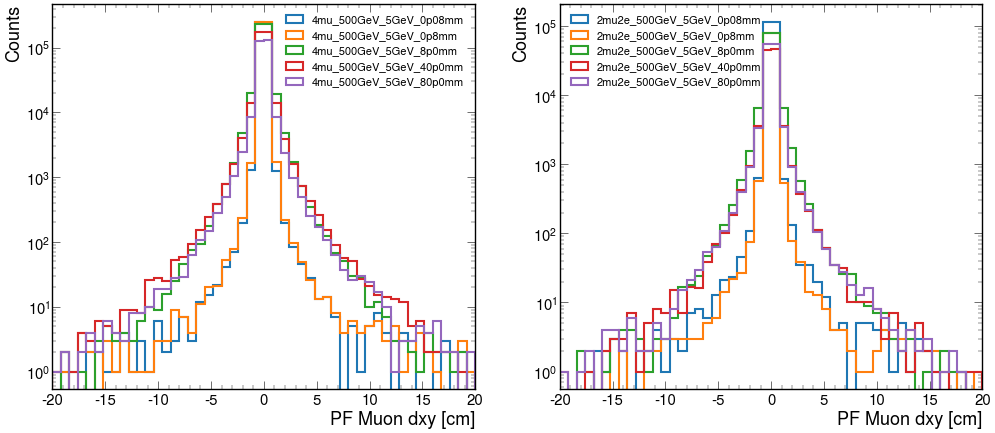

In [6]:
plt.style.use(hep.style.CMS)
fig, ax = plt.subplots(1, 2, figsize=(24,10))
for i_2mu, i_4mu in zip(samples_2mu2e,samples_4mu):
    structure("dxy", events_4mu[i_4mu].dxy, events_2mu2e[i_2mu].dxy)
    ax[0].hist(ak.flatten(events_4mu[i_4mu].dxy), range=(-20,20), alpha=1, bins=50, histtype='step', linewidth=3, label=i_4mu)
    ax[1].hist(ak.flatten(events_2mu2e[i_2mu].dxy), range=(-20,20), alpha=1, bins=50, histtype='step', linewidth=3, label=i_2mu)
    
ax[0].set_xlim(-20,20)
ax[1].set_xlim(-20,20)
ax[0].set_xlabel('PF Muon dxy [cm]')
ax[1].set_xlabel('PF Muon dxy [cm]')
ax[0].set_ylabel('Counts')
ax[1].set_ylabel('Counts')
ax[0].legend(fontsize=16)
ax[1].legend(fontsize=16, loc='upper left')
ax[0].set_yscale("log")
ax[1].set_yscale("log")
plt.savefig("../Plots/V2/PF_MUON/Displacement/dxy.png", bbox_inches="tight")

4mu dxy structure: [[-0.000496, 5.27e-05, 0.000965, 0.0075], ... [-0.00308, 0.00185, -0.00114, 0.00283]]
2mu2e dxy structure: [[0.00468, -0.0153], [-0.000268, 0.0246], ... [-0.00732, 0.0054], [-0.0172, 0.058]]
4mu dxy structure: [[-0.000659, -0.0109, -0.00488, 0.0128], ... [-0.013, -0.0102, 0.0118, 0.724]]
2mu2e dxy structure: [[0.03, -0.0351], [0.0282, -1.18], ... -0.000556, 0.0287], [0.0207, -0.0301]]
4mu dxy structure: [[-0.0321, 0.0205, 0.0764, -0.041, 0.0158, ... -0.0282, -0.201, 0.239, 0.213]]
2mu2e dxy structure: [[-0.052, 0.0621], [0.103, -0.131], [0.206, ... [-0.424, 0.48], [0.0907, -0.113]]
4mu dxy structure: [[-0.0369, 0.13, 0.00982, -0.904], ... -0.0128], [-0.0254, -0.00462, -0.00966]]
2mu2e dxy structure: [[-0.18, 0.395], [0.0264, -0.601], [1.02, ... [-0.0109, 0.0441], [0.286, -1.24]]
4mu dxy structure: [[-0.0719, -0.0023, 0.335], [], ... 0.0234, -5.61e-05, 0.00185], [0.194, 0.00681]]
2mu2e dxy structure: [[-0.00366, 0.957, 0.00099], [-0.00397], ... -0.00171], [0.14, -0.13

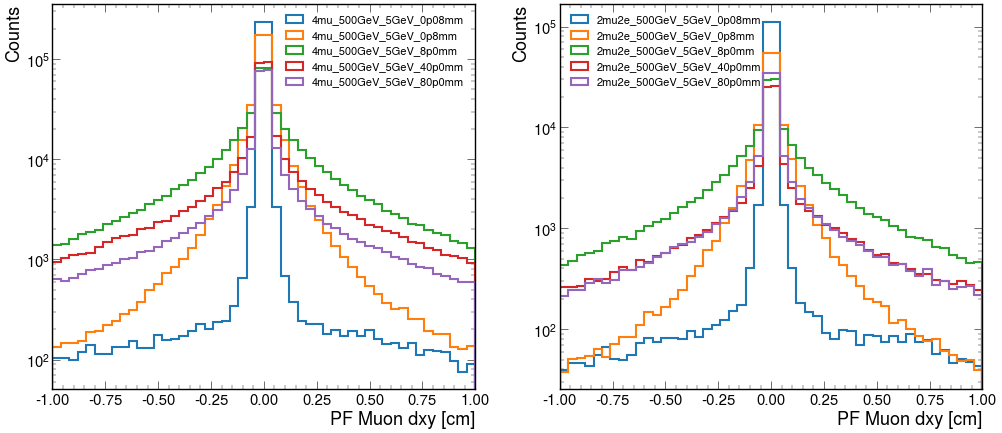

In [10]:
plt.style.use(hep.style.CMS)
fig, ax = plt.subplots(1, 2, figsize=(24,10))
for i_2mu, i_4mu in zip(samples_2mu2e,samples_4mu):
    structure("dxy", events_4mu[i_4mu].dxy, events_2mu2e[i_2mu].dxy)
    ax[0].hist(ak.flatten(events_4mu[i_4mu].dxy), range=(-1,1), alpha=1, bins=50, histtype='step', linewidth=3, label=i_4mu)
    ax[1].hist(ak.flatten(events_2mu2e[i_2mu].dxy), range=(-1,1), alpha=1, bins=50, histtype='step', linewidth=3, label=i_2mu)
    
ax[0].set_xlim(-1,1)
ax[1].set_xlim(-1,1)
ax[0].set_xlabel('PF Muon dxy [cm]')
ax[1].set_xlabel('PF Muon dxy [cm]')
ax[0].set_ylabel('Counts')
ax[1].set_ylabel('Counts')
ax[0].legend(fontsize=16)
ax[1].legend(fontsize=16, loc='upper left')
ax[0].set_yscale("log")
ax[1].set_yscale("log")
plt.savefig("../Plots/V2/PF_MUON/Displacement/dxy_low.png", bbox_inches="tight")

## dxyErr

4mu dxyErr structure: [[0.000778, 0.000992, 0.000885, 0.00104], ... [0.00111, 0.00117, 0.000832, 0.00113]]
2mu2e dxyErr structure: [[0.0013, 0.00156], [0.000946, 0.0022], ... [0.00143, 0.00154], [0.00102, 0.00133]]
4mu dxyErr structure: [[0.00124, 0.00229, 0.0104, 0.00101], ... [0.00299, 0.00259, 0.0025, 0.0131]]
2mu2e dxyErr structure: [[0.00177, 0.00177], [0.00143, 0.00757], ... 0.0015, 0.00302], [0.0047, 0.00476]]
4mu dxyErr structure: [[0.00162, 0.00253, 0.00145, 0.0996, 0.00336, ... 0.00201, 0.0232, 0.00488, 0.00357]]
2mu2e dxyErr structure: [[0.00157, 0.00142], [0.00739, 0.0151], ... [0.00751, 0.00507], [0.00232, 0.00229]]
4mu dxyErr structure: [[0.0977, 0.0025, 0.0996, 0.0148], [0.0996, ... 0.00235], [0.0996, 0.0996, 0.0996]]
2mu2e dxyErr structure: [[0.00665, 0.00388], [0.00223, 0.00317], ... [0.00146, 0.00156], [0.011, 0.0251]]
4mu dxyErr structure: [[0.0996, 0.0996, 0.0069], [], [0.083, ... 0.0996, 0.0996, 0.0996], [0.0957, 0.0996]]
2mu2e dxyErr structure: [[0.0986, 0.0337, 0

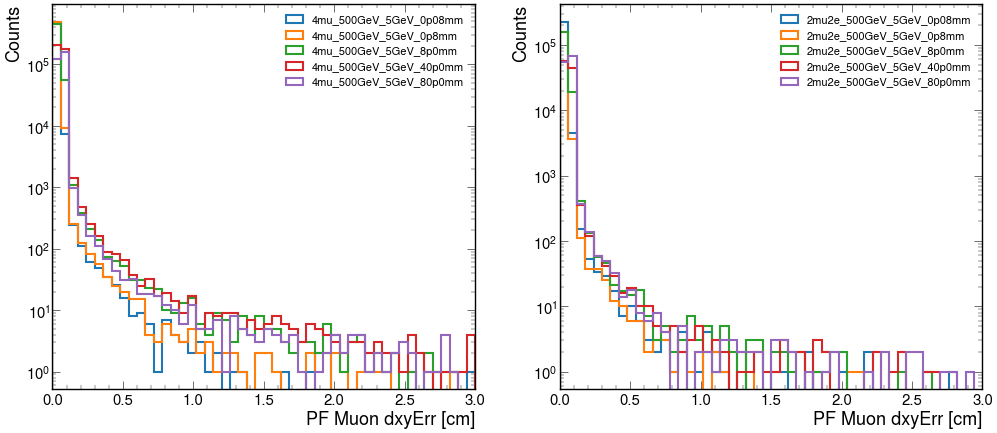

In [5]:
plt.style.use(hep.style.CMS)
fig, ax = plt.subplots(1, 2, figsize=(24,10))
for i_2mu, i_4mu in zip(samples_2mu2e,samples_4mu):
    structure("dxyErr", events_4mu[i_4mu].dxyErr, events_2mu2e[i_2mu].dxyErr)
    ax[0].hist(ak.flatten(events_4mu[i_4mu].dxyErr), range=(0,3), alpha=1, bins=50, histtype='step', linewidth=3, label=i_4mu)
    ax[1].hist(ak.flatten(events_2mu2e[i_2mu].dxyErr), range=(0,3), alpha=1, bins=50, histtype='step', linewidth=3, label=i_2mu)
    
ax[0].set_xlim(0,3)
ax[1].set_xlim(0,3)
ax[0].set_xlabel('PF Muon dxyErr [cm]')
ax[1].set_xlabel('PF Muon dxyErr [cm]')
ax[0].set_ylabel('Counts')
ax[1].set_ylabel('Counts')
ax[0].legend(fontsize=16)
ax[1].legend(fontsize=16)
ax[0].set_yscale("log")
ax[1].set_yscale("log")
plt.savefig("../Plots/V2/PF_MUON/Displacement/dxyErr.png", bbox_inches="tight")

4mu dxyErr structure: [[0.000778, 0.000992, 0.000885, 0.00104], ... [0.00111, 0.00117, 0.000832, 0.00113]]
2mu2e dxyErr structure: [[0.0013, 0.00156], [0.000946, 0.0022], ... [0.00143, 0.00154], [0.00102, 0.00133]]
4mu dxyErr structure: [[0.00124, 0.00229, 0.0104, 0.00101], ... [0.00299, 0.00259, 0.0025, 0.0131]]
2mu2e dxyErr structure: [[0.00177, 0.00177], [0.00143, 0.00757], ... 0.0015, 0.00302], [0.0047, 0.00476]]
4mu dxyErr structure: [[0.00162, 0.00253, 0.00145, 0.0996, 0.00336, ... 0.00201, 0.0232, 0.00488, 0.00357]]
2mu2e dxyErr structure: [[0.00157, 0.00142], [0.00739, 0.0151], ... [0.00751, 0.00507], [0.00232, 0.00229]]
4mu dxyErr structure: [[0.0977, 0.0025, 0.0996, 0.0148], [0.0996, ... 0.00235], [0.0996, 0.0996, 0.0996]]
2mu2e dxyErr structure: [[0.00665, 0.00388], [0.00223, 0.00317], ... [0.00146, 0.00156], [0.011, 0.0251]]
4mu dxyErr structure: [[0.0996, 0.0996, 0.0069], [], [0.083, ... 0.0996, 0.0996, 0.0996], [0.0957, 0.0996]]
2mu2e dxyErr structure: [[0.0986, 0.0337, 0

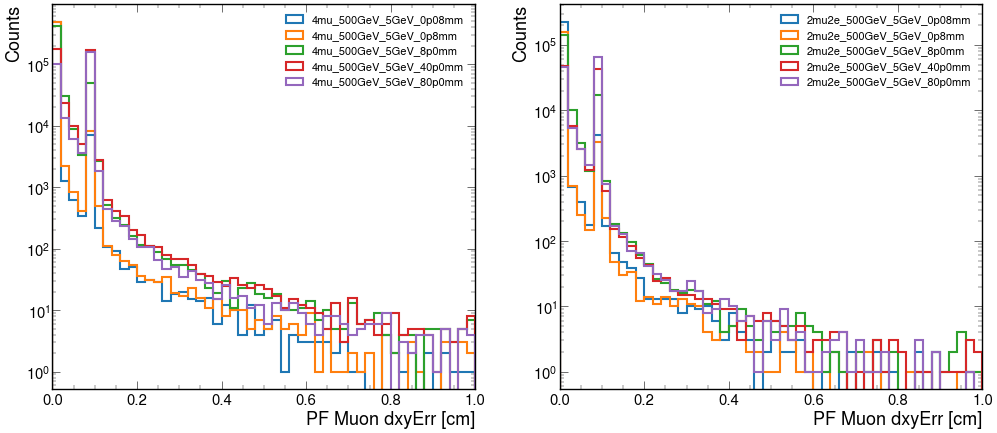

In [9]:
plt.style.use(hep.style.CMS)
fig, ax = plt.subplots(1, 2, figsize=(24,10))
for i_2mu, i_4mu in zip(samples_2mu2e,samples_4mu):
    structure("dxyErr", events_4mu[i_4mu].dxyErr, events_2mu2e[i_2mu].dxyErr)
    ax[0].hist(ak.flatten(events_4mu[i_4mu].dxyErr), range=(0,1), alpha=1, bins=50, histtype='step', linewidth=3, label=i_4mu)
    ax[1].hist(ak.flatten(events_2mu2e[i_2mu].dxyErr), range=(0,1), alpha=1, bins=50, histtype='step', linewidth=3, label=i_2mu)
    
ax[0].set_xlim(0,1)
ax[1].set_xlim(0,1)
ax[0].set_xlabel('PF Muon dxyErr [cm]')
ax[1].set_xlabel('PF Muon dxyErr [cm]')
ax[0].set_ylabel('Counts')
ax[1].set_ylabel('Counts')
ax[0].legend(fontsize=16)
ax[1].legend(fontsize=16)
ax[0].set_yscale("log")
ax[1].set_yscale("log")
plt.savefig("../Plots/V2/PF_MUON/Displacement/dxyErr_low.png", bbox_inches="tight")

4mu dxyErr structure: [[0.000778, 0.000992, 0.000885, 0.00104], ... [0.00111, 0.00117, 0.000832, 0.00113]]
2mu2e dxyErr structure: [[0.0013, 0.00156], [0.000946, 0.0022], ... [0.00143, 0.00154], [0.00102, 0.00133]]
4mu dxyErr structure: [[0.00124, 0.00229, 0.0104, 0.00101], ... [0.00299, 0.00259, 0.0025, 0.0131]]
2mu2e dxyErr structure: [[0.00177, 0.00177], [0.00143, 0.00757], ... 0.0015, 0.00302], [0.0047, 0.00476]]
4mu dxyErr structure: [[0.00162, 0.00253, 0.00145, 0.0996, 0.00336, ... 0.00201, 0.0232, 0.00488, 0.00357]]
2mu2e dxyErr structure: [[0.00157, 0.00142], [0.00739, 0.0151], ... [0.00751, 0.00507], [0.00232, 0.00229]]
4mu dxyErr structure: [[0.0977, 0.0025, 0.0996, 0.0148], [0.0996, ... 0.00235], [0.0996, 0.0996, 0.0996]]
2mu2e dxyErr structure: [[0.00665, 0.00388], [0.00223, 0.00317], ... [0.00146, 0.00156], [0.011, 0.0251]]
4mu dxyErr structure: [[0.0996, 0.0996, 0.0069], [], [0.083, ... 0.0996, 0.0996, 0.0996], [0.0957, 0.0996]]
2mu2e dxyErr structure: [[0.0986, 0.0337, 0

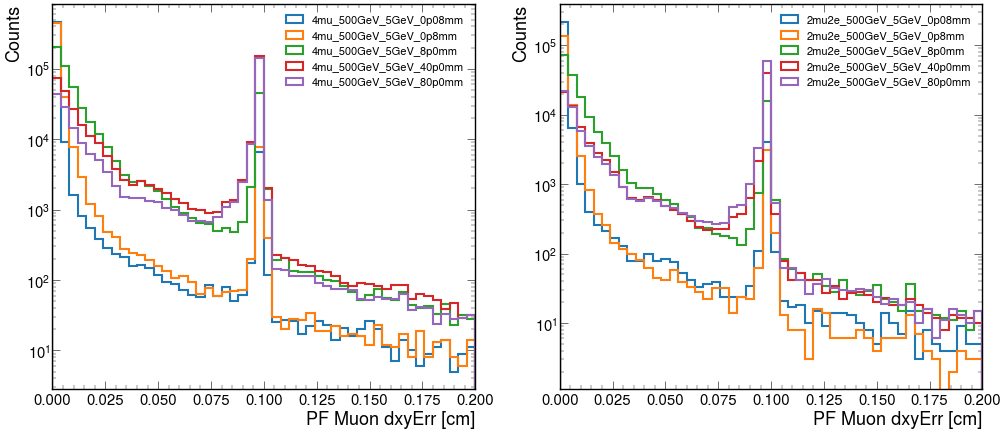

In [10]:
plt.style.use(hep.style.CMS)
fig, ax = plt.subplots(1, 2, figsize=(24,10))
for i_2mu, i_4mu in zip(samples_2mu2e,samples_4mu):
    structure("dxyErr", events_4mu[i_4mu].dxyErr, events_2mu2e[i_2mu].dxyErr)
    ax[0].hist(ak.flatten(events_4mu[i_4mu].dxyErr), range=(0,0.2), alpha=1, bins=50, histtype='step', linewidth=3, label=i_4mu)
    ax[1].hist(ak.flatten(events_2mu2e[i_2mu].dxyErr), range=(0,0.2), alpha=1, bins=50, histtype='step', linewidth=3, label=i_2mu)
    
ax[0].set_xlim(0,0.2)
ax[1].set_xlim(0,0.2)
ax[0].set_xlabel('PF Muon dxyErr [cm]')
ax[1].set_xlabel('PF Muon dxyErr [cm]')
ax[0].set_ylabel('Counts')
ax[1].set_ylabel('Counts')
ax[0].legend(fontsize=16)
ax[1].legend(fontsize=16)
ax[0].set_yscale("log")
ax[1].set_yscale("log")
plt.savefig("../Plots/V2/PF_MUON/Displacement/dxyErr_superlow.png", bbox_inches="tight")

## dxybs

4mu dxybs structure: [[0.000564, -0.001, 0.00201, 0.00645], ... [-0.00223, 0.000976, -0.00201, 0.00369]]
2mu2e dxybs structure: [[0.00551, -0.0146], [-0.000456, 0.0245], ... [-0.00705, 0.0056], [-0.0169, 0.0584]]
4mu dxybs structure: [[-0.00362, -0.00791, -0.00195, 0.00974], ... [-0.014, -0.00938, 0.0128, 0.722]]
2mu2e dxybs structure: [[0.0284, -0.0367], [0.0287, -1.18], ... -0.000247, 0.0292], [0.0145, -0.0362]]
4mu dxybs structure: [[-0.032, 0.0203, 0.0764, -0.0417, 0.0172], ... [-0.646, -0.0291, -0.2, 0.24, 0.212]]
2mu2e dxybs structure: [[-0.0524, 0.0617], [0.103, -0.132], [0.208, ... [-0.423, 0.48], [0.0903, -0.113]]
4mu dxybs structure: [[-0.0378, 0.131, 0.00891, -0.903], ... -0.0128], [-0.0249, -0.00506, -0.00927]]
2mu2e dxybs structure: [[-0.182, 0.393], [0.0268, -0.601], [1.02, ... [-0.00924, 0.0458], [0.29, -1.24]]
4mu dxybs structure: [[-0.0724, -0.00196, 0.336], [], ... 0.0208, 0.00294, 0.0048], [0.194, 0.00457]]
2mu2e dxybs structure: [[-0.00278, 0.958, 6.14e-06], [-0.004

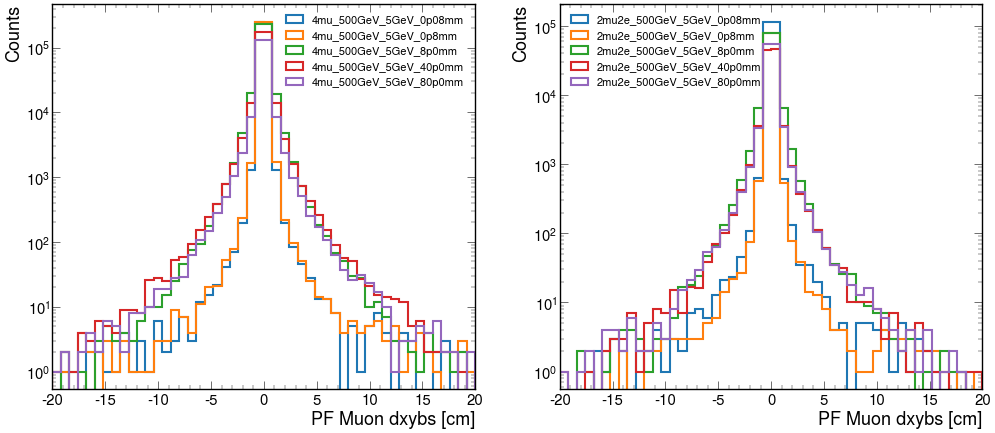

In [11]:
plt.style.use(hep.style.CMS)
fig, ax = plt.subplots(1, 2, figsize=(24,10))
for i_2mu, i_4mu in zip(samples_2mu2e,samples_4mu):
    structure("dxybs", events_4mu[i_4mu].dxybs, events_2mu2e[i_2mu].dxybs)
    ax[0].hist(ak.flatten(events_4mu[i_4mu].dxybs), range=(-20,20), alpha=1, bins=50, histtype='step', linewidth=3, label=i_4mu)
    ax[1].hist(ak.flatten(events_2mu2e[i_2mu].dxybs), range=(-20,20), alpha=1, bins=50, histtype='step', linewidth=3, label=i_2mu)
    
ax[0].set_xlim(-20,20)
ax[1].set_xlim(-20,20)
ax[0].set_xlabel('PF Muon dxybs [cm]')
ax[1].set_xlabel('PF Muon dxybs [cm]')
ax[0].set_ylabel('Counts')
ax[1].set_ylabel('Counts')
ax[0].legend(fontsize=16)
ax[1].legend(fontsize=16, loc='upper left')
ax[0].set_yscale("log")
ax[1].set_yscale("log")
plt.savefig("../Plots/V2/PF_MUON/Displacement/dxybs.png", bbox_inches="tight")

4mu dxybs structure: [[0.000564, -0.001, 0.00201, 0.00645], ... [-0.00223, 0.000976, -0.00201, 0.00369]]
2mu2e dxybs structure: [[0.00551, -0.0146], [-0.000456, 0.0245], ... [-0.00705, 0.0056], [-0.0169, 0.0584]]
4mu dxybs structure: [[-0.00362, -0.00791, -0.00195, 0.00974], ... [-0.014, -0.00938, 0.0128, 0.722]]
2mu2e dxybs structure: [[0.0284, -0.0367], [0.0287, -1.18], ... -0.000247, 0.0292], [0.0145, -0.0362]]
4mu dxybs structure: [[-0.032, 0.0203, 0.0764, -0.0417, 0.0172], ... [-0.646, -0.0291, -0.2, 0.24, 0.212]]
2mu2e dxybs structure: [[-0.0524, 0.0617], [0.103, -0.132], [0.208, ... [-0.423, 0.48], [0.0903, -0.113]]
4mu dxybs structure: [[-0.0378, 0.131, 0.00891, -0.903], ... -0.0128], [-0.0249, -0.00506, -0.00927]]
2mu2e dxybs structure: [[-0.182, 0.393], [0.0268, -0.601], [1.02, ... [-0.00924, 0.0458], [0.29, -1.24]]
4mu dxybs structure: [[-0.0724, -0.00196, 0.336], [], ... 0.0208, 0.00294, 0.0048], [0.194, 0.00457]]
2mu2e dxybs structure: [[-0.00278, 0.958, 6.14e-06], [-0.004

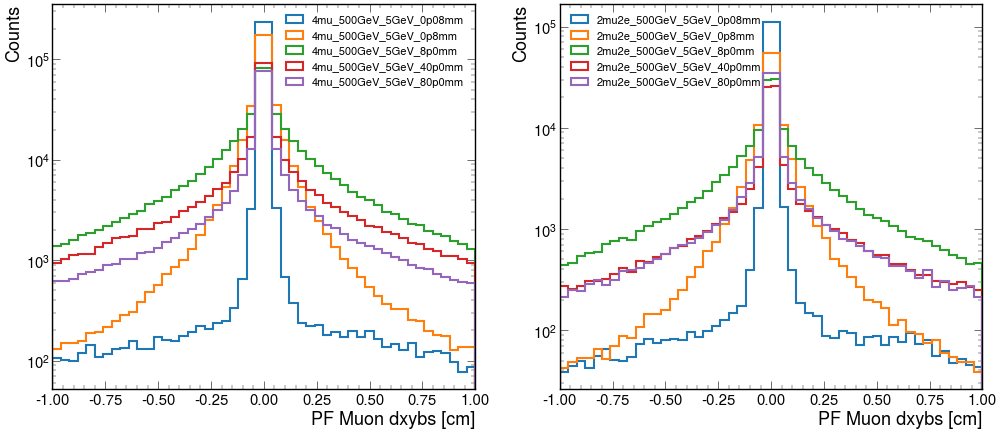

In [12]:
plt.style.use(hep.style.CMS)
fig, ax = plt.subplots(1, 2, figsize=(24,10))
for i_2mu, i_4mu in zip(samples_2mu2e,samples_4mu):
    structure("dxybs", events_4mu[i_4mu].dxybs, events_2mu2e[i_2mu].dxybs)
    ax[0].hist(ak.flatten(events_4mu[i_4mu].dxybs), range=(-1,1), alpha=1, bins=50, histtype='step', linewidth=3, label=i_4mu)
    ax[1].hist(ak.flatten(events_2mu2e[i_2mu].dxybs), range=(-1,1), alpha=1, bins=50, histtype='step', linewidth=3, label=i_2mu)
    
ax[0].set_xlim(-1,1)
ax[1].set_xlim(-1,1)
ax[0].set_xlabel('PF Muon dxybs [cm]')
ax[1].set_xlabel('PF Muon dxybs [cm]')
ax[0].set_ylabel('Counts')
ax[1].set_ylabel('Counts')
ax[0].legend(fontsize=16)
ax[1].legend(fontsize=16, loc='upper left')
ax[0].set_yscale("log")
ax[1].set_yscale("log")
plt.savefig("../Plots/V2/PF_MUON/Displacement/dxybs_low.png", bbox_inches="tight")

## dxy - dxybs

4mu dxy - dxybs structure: [[-0.00106, 0.00106, -0.00105, 0.00105, ... 0.000869, 0.000868, -0.000854]]
2mu2e dxy - dxybs structure: [[-0.000832, -0.00071], [0.000188, 0.000168, ... -0.000198], [-0.000275, -0.000427]]
4mu dxy - dxybs structure: [[0.00296, -0.00294, -0.00293, 0.00304], ... [0.00106, -0.000862, -0.00105, 0.00146]]
2mu2e dxy - dxybs structure: [[0.0016, 0.00165], [-0.000488, -0.000977, ... -0.000458], [0.00614, 0.0061]]
4mu dxy - dxybs structure: [[-9.16e-05, 0.000168, 0, 0.000671, ... 0.000946, -0.0011, -0.00122, 0.000854]]
2mu2e dxy - dxybs structure: [[0.000397, 0.000397], [0.000854, 0.000854, ... -0.000488], [0.000427, 0.000427]]
4mu dxy - dxybs structure: [[0.000885, -0.000977, 0.000908, -0.000977], ... [-0.000473, 0.000439, -0.000389]]
2mu2e dxy - dxybs structure: [[0.00208, 0.00195], [-0.000366, 0], ... [-0.00165, -0.00171], [-0.00342, -0.00391]]
4mu dxy - dxybs structure: [[0.000488, -0.000341, -0.00122], [], ... -0.003, -0.00296], [-0.000244, 0.00224]]
2mu2e dxy -

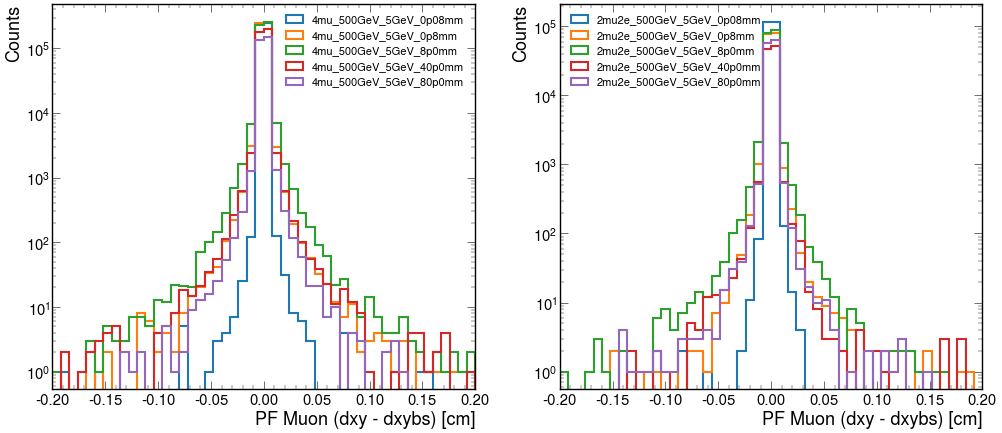

In [13]:
plt.style.use(hep.style.CMS)
fig, ax = plt.subplots(1, 2, figsize=(24,10))
for i_2mu, i_4mu in zip(samples_2mu2e,samples_4mu):
    structure("dxy - dxybs", events_4mu[i_4mu].dxy - events_4mu[i_4mu].dxybs, events_2mu2e[i_2mu].dxy - events_2mu2e[i_2mu].dxybs)
    ax[0].hist(ak.flatten(events_4mu[i_4mu].dxy - events_4mu[i_4mu].dxybs), range=(-0.2,0.2), alpha=1, bins=50, histtype='step', linewidth=3, label=i_4mu)
    ax[1].hist(ak.flatten(events_2mu2e[i_2mu].dxy - events_2mu2e[i_2mu].dxybs), range=(-0.2,0.2), alpha=1, bins=50, histtype='step', linewidth=3, label=i_2mu)
    
ax[0].set_xlim(-0.2,0.2)
ax[1].set_xlim(-0.2,0.2)
ax[0].set_xlabel('PF Muon (dxy - dxybs) [cm]')
ax[1].set_xlabel('PF Muon (dxy - dxybs) [cm]')
ax[0].set_ylabel('Counts')
ax[1].set_ylabel('Counts')
ax[0].legend(fontsize=16)
ax[1].legend(fontsize=16, loc='upper left')
ax[0].set_yscale("log")
ax[1].set_yscale("log")
plt.savefig("../Plots/V2/PF_MUON/Displacement/dxy-dxybs.png", bbox_inches="tight")

4mu dxy - dxybs structure: [[-0.00106, 0.00106, -0.00105, 0.00105, ... 0.000869, 0.000868, -0.000854]]
2mu2e dxy - dxybs structure: [[-0.000832, -0.00071], [0.000188, 0.000168, ... -0.000198], [-0.000275, -0.000427]]
4mu dxy - dxybs structure: [[0.00296, -0.00294, -0.00293, 0.00304], ... [0.00106, -0.000862, -0.00105, 0.00146]]
2mu2e dxy - dxybs structure: [[0.0016, 0.00165], [-0.000488, -0.000977, ... -0.000458], [0.00614, 0.0061]]
4mu dxy - dxybs structure: [[-9.16e-05, 0.000168, 0, 0.000671, ... 0.000946, -0.0011, -0.00122, 0.000854]]
2mu2e dxy - dxybs structure: [[0.000397, 0.000397], [0.000854, 0.000854, ... -0.000488], [0.000427, 0.000427]]
4mu dxy - dxybs structure: [[0.000885, -0.000977, 0.000908, -0.000977], ... [-0.000473, 0.000439, -0.000389]]
2mu2e dxy - dxybs structure: [[0.00208, 0.00195], [-0.000366, 0], ... [-0.00165, -0.00171], [-0.00342, -0.00391]]
4mu dxy - dxybs structure: [[0.000488, -0.000341, -0.00122], [], ... -0.003, -0.00296], [-0.000244, 0.00224]]
2mu2e dxy -

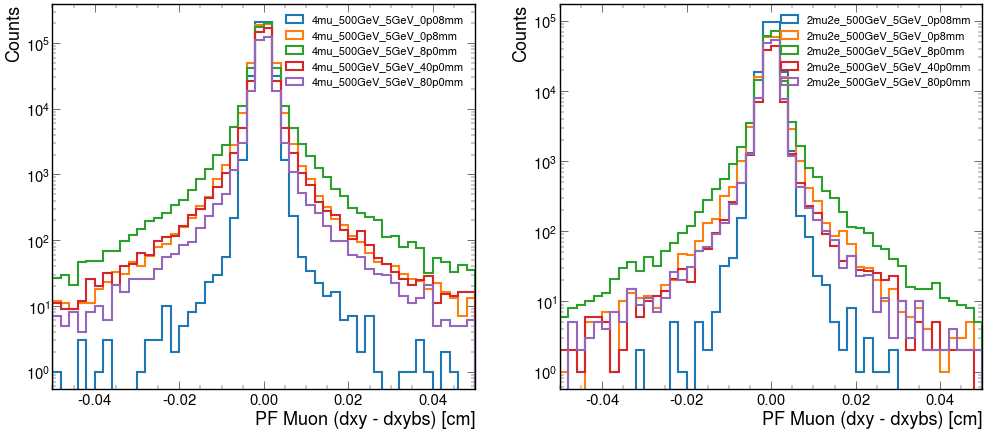

In [14]:
plt.style.use(hep.style.CMS)
fig, ax = plt.subplots(1, 2, figsize=(24,10))
for i_2mu, i_4mu in zip(samples_2mu2e,samples_4mu):
    structure("dxy - dxybs", events_4mu[i_4mu].dxy - events_4mu[i_4mu].dxybs, events_2mu2e[i_2mu].dxy - events_2mu2e[i_2mu].dxybs)
    ax[0].hist(ak.flatten(events_4mu[i_4mu].dxy - events_4mu[i_4mu].dxybs), range=(-0.05,0.05), alpha=1, bins=50, histtype='step', linewidth=3, label=i_4mu)
    ax[1].hist(ak.flatten(events_2mu2e[i_2mu].dxy - events_2mu2e[i_2mu].dxybs), range=(-0.05,0.05), alpha=1, bins=50, histtype='step', linewidth=3, label=i_2mu)
    
ax[0].set_xlim(-0.05,0.05)
ax[1].set_xlim(-0.05,0.05)
ax[0].set_xlabel('PF Muon (dxy - dxybs) [cm]')
ax[1].set_xlabel('PF Muon (dxy - dxybs) [cm]')
ax[0].set_ylabel('Counts')
ax[1].set_ylabel('Counts')
ax[0].legend(fontsize=16)
ax[1].legend(fontsize=16)
ax[0].set_yscale("log")
ax[1].set_yscale("log")
plt.savefig("../Plots/V2/PF_MUON/Displacement/dxy-dxybs_low.png", bbox_inches="tight")

## dxyPVTraj

4mu dxyPVTraj structure: [[0.000668, 0.000184, -0.000965, -0.0075], ... 0.00125, -0.00174, 0.00114, -0.00288]]
2mu2e dxyPVTraj structure: [[-0.00461, 0.0153], [0.000268, -0.0246], ... [0.00745, -0.00539], [0.0171, -0.0579]]
4mu dxyPVTraj structure: [[0.000315, 0.0104, 0.00139, -0.0128], ... [0.013, 0.0102, -0.0118, -0.471]]
2mu2e dxyPVTraj structure: [[-0.03, 0.0348], [-0.0269, 1.18], ... 0.000925, -0.0288], [-0.0205, 0.0301]]
4mu dxyPVTraj structure: [[0.0321, -0.0205, -0.0763, 0.0411, -0.0152, ... 0.028, 0.178, -0.00449, -0.213]]
2mu2e dxyPVTraj structure: [[0.0522, -0.0621], [-0.104, 0.121], ... [0.422, -0.48], [0.000439, 0.113]]
4mu dxyPVTraj structure: [[0.0369, -0.13, -0.00982, 0.92], [-0.0031, ... 0.0122], [0.0254, 0.00462, 0.00966]]
2mu2e dxyPVTraj structure: [[0.179, -0.395], [-0.0264, 0.601], [-0.984, ... [0.0109, -0.044], [-0.286, 1.3]]
4mu dxyPVTraj structure: [[0.0719, 0.0023, -0.335], [], ... 5.61e-05, -0.00185], [-0.194, -0.00681]]
2mu2e dxyPVTraj structure: [[0.00366, -

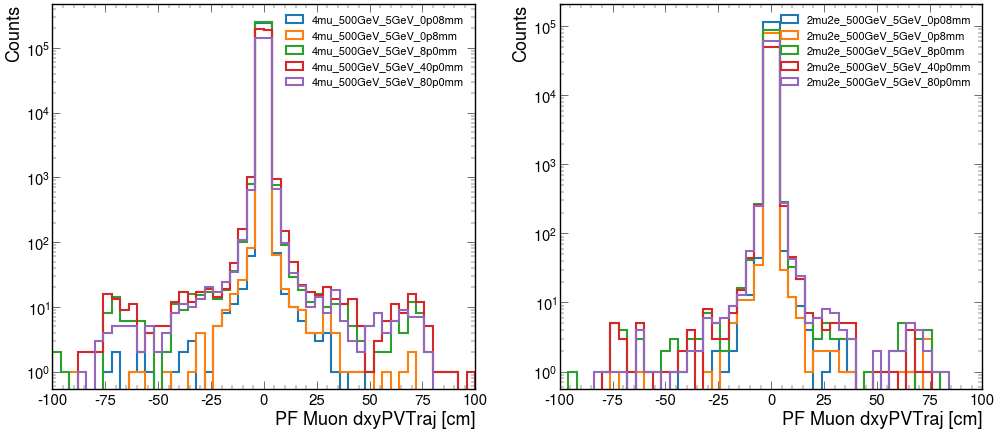

In [5]:
plt.style.use(hep.style.CMS)
fig, ax = plt.subplots(1, 2, figsize=(24,10))
for i_2mu, i_4mu in zip(samples_2mu2e,samples_4mu):
    structure("dxyPVTraj", events_4mu[i_4mu].dxyPVTraj, events_2mu2e[i_2mu].dxyPVTraj)
    ax[0].hist(ak.flatten(events_4mu[i_4mu].dxyPVTraj), range=(-100,100), alpha=1, bins=50, histtype='step', linewidth=3, label=i_4mu)
    ax[1].hist(ak.flatten(events_2mu2e[i_2mu].dxyPVTraj), range=(-100,100), alpha=1, bins=50, histtype='step', linewidth=3, label=i_2mu)
    
ax[0].set_xlim(-100,100)
ax[1].set_xlim(-100,100)
ax[0].set_xlabel('PF Muon dxyPVTraj [cm]')
ax[1].set_xlabel('PF Muon dxyPVTraj [cm]')
ax[0].set_ylabel('Counts')
ax[1].set_ylabel('Counts')
ax[0].legend(fontsize=16)
ax[1].legend(fontsize=16)
ax[0].set_yscale("log")
ax[1].set_yscale("log")
plt.savefig("../Plots/V2/PF_MUON/Displacement/dxyPVTraj.png", bbox_inches="tight")

4mu dxyPVTraj structure: [[0.000668, 0.000184, -0.000965, -0.0075], ... 0.00125, -0.00174, 0.00114, -0.00288]]
2mu2e dxyPVTraj structure: [[-0.00461, 0.0153], [0.000268, -0.0246], ... [0.00745, -0.00539], [0.0171, -0.0579]]
4mu dxyPVTraj structure: [[0.000315, 0.0104, 0.00139, -0.0128], ... [0.013, 0.0102, -0.0118, -0.471]]
2mu2e dxyPVTraj structure: [[-0.03, 0.0348], [-0.0269, 1.18], ... 0.000925, -0.0288], [-0.0205, 0.0301]]
4mu dxyPVTraj structure: [[0.0321, -0.0205, -0.0763, 0.0411, -0.0152, ... 0.028, 0.178, -0.00449, -0.213]]
2mu2e dxyPVTraj structure: [[0.0522, -0.0621], [-0.104, 0.121], ... [0.422, -0.48], [0.000439, 0.113]]
4mu dxyPVTraj structure: [[0.0369, -0.13, -0.00982, 0.92], [-0.0031, ... 0.0122], [0.0254, 0.00462, 0.00966]]
2mu2e dxyPVTraj structure: [[0.179, -0.395], [-0.0264, 0.601], [-0.984, ... [0.0109, -0.044], [-0.286, 1.3]]
4mu dxyPVTraj structure: [[0.0719, 0.0023, -0.335], [], ... 5.61e-05, -0.00185], [-0.194, -0.00681]]
2mu2e dxyPVTraj structure: [[0.00366, -

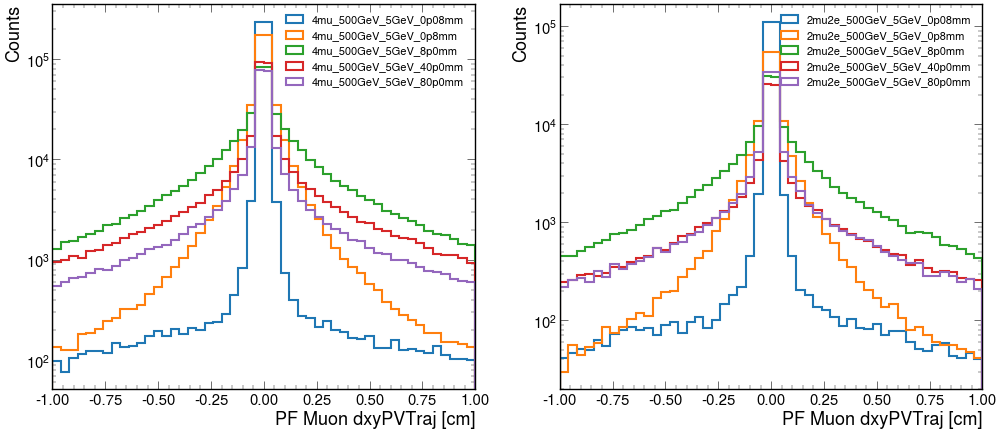

In [13]:
plt.style.use(hep.style.CMS)
fig, ax = plt.subplots(1, 2, figsize=(24,10))
for i_2mu, i_4mu in zip(samples_2mu2e,samples_4mu):
    structure("dxyPVTraj", events_4mu[i_4mu].dxyPVTraj, events_2mu2e[i_2mu].dxyPVTraj)
    ax[0].hist(ak.flatten(events_4mu[i_4mu].dxyPVTraj), range=(-1,1), alpha=1, bins=50, histtype='step', linewidth=3, label=i_4mu)
    ax[1].hist(ak.flatten(events_2mu2e[i_2mu].dxyPVTraj), range=(-1,1), alpha=1, bins=50, histtype='step', linewidth=3, label=i_2mu)
    
ax[0].set_xlim(-1,1)
ax[1].set_xlim(-1,1)
ax[0].set_xlabel('PF Muon dxyPVTraj [cm]')
ax[1].set_xlabel('PF Muon dxyPVTraj [cm]')
ax[0].set_ylabel('Counts')
ax[1].set_ylabel('Counts')
ax[0].legend(fontsize=16)
ax[1].legend(fontsize=16)
ax[0].set_yscale("log")
ax[1].set_yscale("log")
plt.savefig("../Plots/V2/PF_MUON/Displacement/dxyPVTraj_low.png", bbox_inches="tight")

## dxy - dxyPVTraj

4mu dxy - dxyPVTraj structure: [[-0.00116, -0.000131, 0.00193, 0.015], ... [-0.00432, 0.00358, -0.00228, 0.00572]]
2mu2e dxy - dxyPVTraj structure: [[0.00929, -0.0306], [-0.000536, 0.0492], ... [-0.0148, 0.0108], [-0.0343, 0.116]]
4mu dxy - dxyPVTraj structure: [[-0.000974, -0.0212, -0.00627, 0.0255], ... [-0.026, -0.0205, 0.0236, 1.19]]
2mu2e dxy - dxyPVTraj structure: [[0.0599, -0.0698], [0.0551, -2.36], ... -0.00148, 0.0575], [0.0412, -0.0601]]
4mu dxy - dxyPVTraj structure: [[-0.0642, 0.041, 0.153, -0.0821, 0.0309], ... [-1.29, -0.0562, -0.38, 0.244, 0.426]]
2mu2e dxy - dxyPVTraj structure: [[-0.104, 0.124], [0.207, -0.252], [0.409, ... [-0.846, 0.96], [0.0903, -0.225]]
4mu dxy - dxyPVTraj structure: [[-0.0738, 0.259, 0.0196, -1.82], ... -0.025], [-0.0508, -0.00925, -0.0193]]
2mu2e dxy - dxyPVTraj structure: [[-0.359, 0.79], [0.0528, -1.2], [2, ... -0.0135], [-0.0218, 0.0881], [0.573, -2.54]]
4mu dxy - dxyPVTraj structure: [[-0.144, -0.00459, 0.67], [], ... 0.0468, -0.000112, 0.003

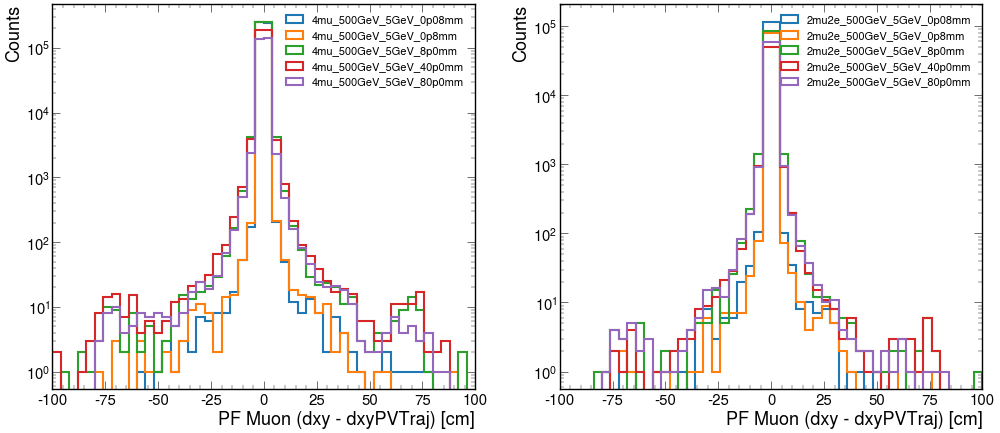

In [8]:
plt.style.use(hep.style.CMS)
fig, ax = plt.subplots(1, 2, figsize=(24,10))
for i_2mu, i_4mu in zip(samples_2mu2e,samples_4mu):
    structure("dxy - dxyPVTraj", events_4mu[i_4mu].dxy - events_4mu[i_4mu].dxyPVTraj, events_2mu2e[i_2mu].dxy - events_2mu2e[i_2mu].dxyPVTraj)
    ax[0].hist(ak.flatten(events_4mu[i_4mu].dxy - events_4mu[i_4mu].dxyPVTraj), range=(-100,100), alpha=1, bins=50, histtype='step', linewidth=3, label=i_4mu)
    ax[1].hist(ak.flatten(events_2mu2e[i_2mu].dxy - events_2mu2e[i_2mu].dxyPVTraj), range=(-100,100), alpha=1, bins=50, histtype='step', linewidth=3, label=i_2mu)
    
ax[0].set_xlim(-100,100)
ax[1].set_xlim(-100,100)
ax[0].set_xlabel('PF Muon (dxy - dxyPVTraj) [cm]')
ax[1].set_xlabel('PF Muon (dxy - dxyPVTraj) [cm]')
ax[0].set_ylabel('Counts')
ax[1].set_ylabel('Counts')
ax[0].legend(fontsize=16)
ax[1].legend(fontsize=16)
ax[0].set_yscale("log")
ax[1].set_yscale("log")
plt.savefig("../Plots/V2/PF_MUON/Displacement/dxy-dxyPVTraj.png", bbox_inches="tight")

4mu dxy - dxyPVTraj structure: [[-0.00116, -0.000131, 0.00193, 0.015], ... [-0.00432, 0.00358, -0.00228, 0.00572]]
2mu2e dxy - dxyPVTraj structure: [[0.00929, -0.0306], [-0.000536, 0.0492], ... [-0.0148, 0.0108], [-0.0343, 0.116]]
4mu dxy - dxyPVTraj structure: [[-0.000974, -0.0212, -0.00627, 0.0255], ... [-0.026, -0.0205, 0.0236, 1.19]]
2mu2e dxy - dxyPVTraj structure: [[0.0599, -0.0698], [0.0551, -2.36], ... -0.00148, 0.0575], [0.0412, -0.0601]]
4mu dxy - dxyPVTraj structure: [[-0.0642, 0.041, 0.153, -0.0821, 0.0309], ... [-1.29, -0.0562, -0.38, 0.244, 0.426]]
2mu2e dxy - dxyPVTraj structure: [[-0.104, 0.124], [0.207, -0.252], [0.409, ... [-0.846, 0.96], [0.0903, -0.225]]
4mu dxy - dxyPVTraj structure: [[-0.0738, 0.259, 0.0196, -1.82], ... -0.025], [-0.0508, -0.00925, -0.0193]]
2mu2e dxy - dxyPVTraj structure: [[-0.359, 0.79], [0.0528, -1.2], [2, ... -0.0135], [-0.0218, 0.0881], [0.573, -2.54]]
4mu dxy - dxyPVTraj structure: [[-0.144, -0.00459, 0.67], [], ... 0.0468, -0.000112, 0.003

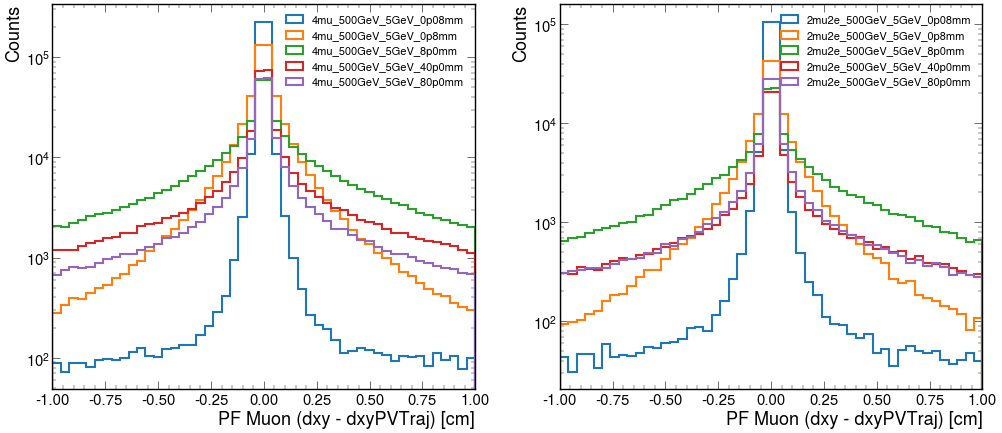

In [6]:
plt.style.use(hep.style.CMS)
fig, ax = plt.subplots(1, 2, figsize=(24,10))
for i_2mu, i_4mu in zip(samples_2mu2e,samples_4mu):
    structure("dxy - dxyPVTraj", events_4mu[i_4mu].dxy - events_4mu[i_4mu].dxyPVTraj, events_2mu2e[i_2mu].dxy - events_2mu2e[i_2mu].dxyPVTraj)
    ax[0].hist(ak.flatten(events_4mu[i_4mu].dxy - events_4mu[i_4mu].dxyPVTraj), range=(-1,1), alpha=1, bins=50, histtype='step', linewidth=3, label=i_4mu)
    ax[1].hist(ak.flatten(events_2mu2e[i_2mu].dxy - events_2mu2e[i_2mu].dxyPVTraj), range=(-1,1), alpha=1, bins=50, histtype='step', linewidth=3, label=i_2mu)
    
ax[0].set_xlim(-1,1)
ax[1].set_xlim(-1,1)
ax[0].set_xlabel('PF Muon (dxy - dxyPVTraj) [cm]')
ax[1].set_xlabel('PF Muon (dxy - dxyPVTraj) [cm]')
ax[0].set_ylabel('Counts')
ax[1].set_ylabel('Counts')
ax[0].legend(fontsize=16)
ax[1].legend(fontsize=16)
ax[0].set_yscale("log")
ax[1].set_yscale("log")
plt.savefig("../Plots/V2/PF_MUON/Displacement/dxy-dxyPVTraj_low.png", bbox_inches="tight")

## dxyPVSigned

4mu dxyPVSigned structure: [[0.000668, 0.000184, 0.000965, -0.0075], ... [0.00125, -0.00174, -0.00114, 0.00288]]
2mu2e dxyPVSigned structure: [[-0.00461, 0.0153], [0.000268, -0.0246], ... 0.00745, -0.00539], [-0.0171, -0.0579]]
4mu dxyPVSigned structure: [[-0.000315, -0.0104, -0.00139, -0.0128], ... [0.013, -0.0102, -0.0118, -0.471]]
2mu2e dxyPVSigned structure: [[-0.03, -0.0348], [-0.0269, 1.18], ... 0.000925, 0.0288], [-0.0205, -0.0301]]
4mu dxyPVSigned structure: [[0.0321, 0.0205, 0.0763, 0.0411, -0.0152, ... -0.028, -0.178, -0.00449, -0.213]]
2mu2e dxyPVSigned structure: [[0.0522, -0.0621], [-0.104, -0.121], ... [-0.422, 0.48], [-0.000439, -0.113]]
4mu dxyPVSigned structure: [[0.0369, 0.13, 0.00982, 0.92], [0.0031, ... -0.0122], [0.0254, -0.00462, -0.00966]]
2mu2e dxyPVSigned structure: [[-0.179, 0.395], [-0.0264, 0.601], [-0.984, ... [-0.0109, -0.044], [0.286, 1.3]]
4mu dxyPVSigned structure: [[0.0719, 0.0023, 0.335], [], ... 0.0234, 5.61e-05, 0.00185], [0.194, 0.00681]]
2mu2e dxy

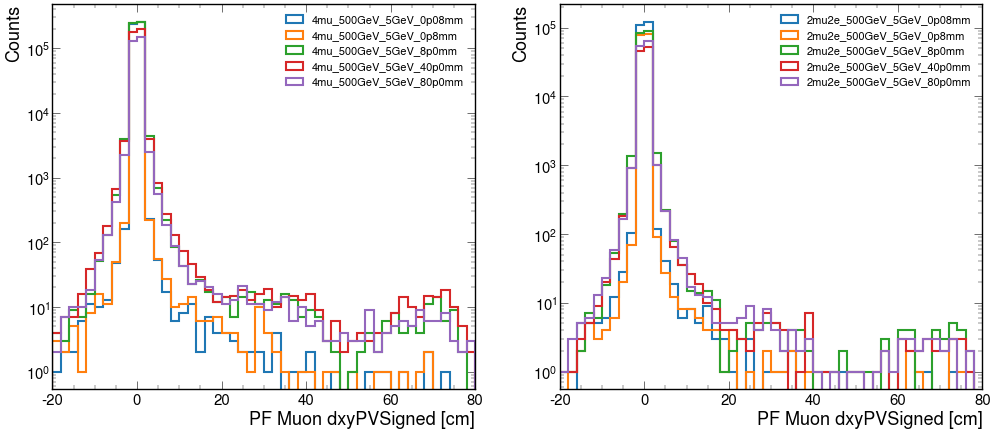

In [11]:
plt.style.use(hep.style.CMS)
fig, ax = plt.subplots(1, 2, figsize=(24,10))
for i_2mu, i_4mu in zip(samples_2mu2e,samples_4mu):
    structure("dxyPVSigned", events_4mu[i_4mu].dxyPVSigned, events_2mu2e[i_2mu].dxyPVSigned)
    ax[0].hist(ak.flatten(events_4mu[i_4mu].dxyPVSigned), range=(-20,80), alpha=1, bins=50, histtype='step', linewidth=3, label=i_4mu)
    ax[1].hist(ak.flatten(events_2mu2e[i_2mu].dxyPVSigned), range=(-20,80), alpha=1, bins=50, histtype='step', linewidth=3, label=i_2mu)
    
ax[0].set_xlim(-20,80)
ax[1].set_xlim(-20,80)
ax[0].set_xlabel('PF Muon dxyPVSigned [cm]')
ax[1].set_xlabel('PF Muon dxyPVSigned [cm]')
ax[0].set_ylabel('Counts')
ax[1].set_ylabel('Counts')
ax[0].legend(fontsize=16)
ax[1].legend(fontsize=16)
ax[0].set_yscale("log")
ax[1].set_yscale("log")
plt.savefig("../Plots/V2/PF_MUON/Displacement/dxyPVSigned.png", bbox_inches="tight")

4mu dxyPVSigned structure: [[0.000668, 0.000184, 0.000965, -0.0075], ... [0.00125, -0.00174, -0.00114, 0.00288]]
2mu2e dxyPVSigned structure: [[-0.00461, 0.0153], [0.000268, -0.0246], ... 0.00745, -0.00539], [-0.0171, -0.0579]]
4mu dxyPVSigned structure: [[-0.000315, -0.0104, -0.00139, -0.0128], ... [0.013, -0.0102, -0.0118, -0.471]]
2mu2e dxyPVSigned structure: [[-0.03, -0.0348], [-0.0269, 1.18], ... 0.000925, 0.0288], [-0.0205, -0.0301]]
4mu dxyPVSigned structure: [[0.0321, 0.0205, 0.0763, 0.0411, -0.0152, ... -0.028, -0.178, -0.00449, -0.213]]
2mu2e dxyPVSigned structure: [[0.0522, -0.0621], [-0.104, -0.121], ... [-0.422, 0.48], [-0.000439, -0.113]]
4mu dxyPVSigned structure: [[0.0369, 0.13, 0.00982, 0.92], [0.0031, ... -0.0122], [0.0254, -0.00462, -0.00966]]
2mu2e dxyPVSigned structure: [[-0.179, 0.395], [-0.0264, 0.601], [-0.984, ... [-0.0109, -0.044], [0.286, 1.3]]
4mu dxyPVSigned structure: [[0.0719, 0.0023, 0.335], [], ... 0.0234, 5.61e-05, 0.00185], [0.194, 0.00681]]
2mu2e dxy

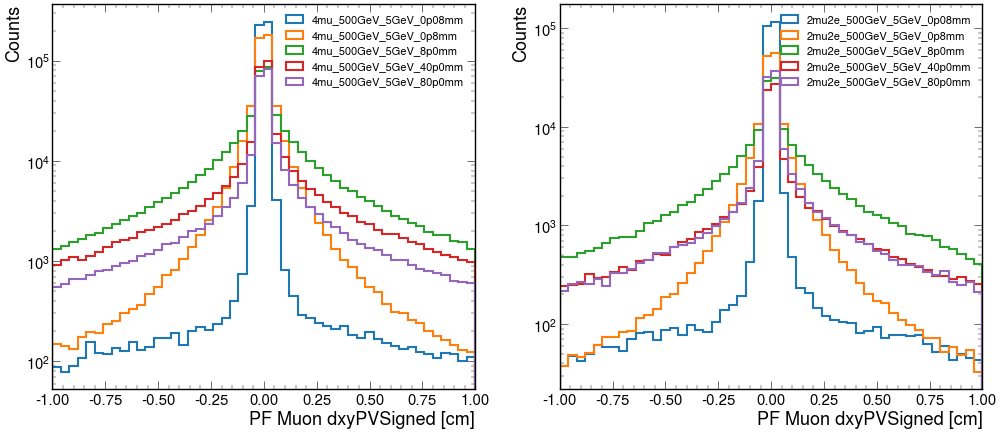

In [8]:
plt.style.use(hep.style.CMS)
fig, ax = plt.subplots(1, 2, figsize=(24,10))
for i_2mu, i_4mu in zip(samples_2mu2e,samples_4mu):
    structure("dxyPVSigned", events_4mu[i_4mu].dxyPVSigned, events_2mu2e[i_2mu].dxyPVSigned)
    ax[0].hist(ak.flatten(events_4mu[i_4mu].dxyPVSigned), range=(-1,1), alpha=1, bins=50, histtype='step', linewidth=3, label=i_4mu)
    ax[1].hist(ak.flatten(events_2mu2e[i_2mu].dxyPVSigned), range=(-1,1), alpha=1, bins=50, histtype='step', linewidth=3, label=i_2mu)
    
ax[0].set_xlim(-1,1)
ax[1].set_xlim(-1,1)
ax[0].set_xlabel('PF Muon dxyPVSigned [cm]')
ax[1].set_xlabel('PF Muon dxyPVSigned [cm]')
ax[0].set_ylabel('Counts')
ax[1].set_ylabel('Counts')
ax[0].legend(fontsize=16)
ax[1].legend(fontsize=16)
ax[0].set_yscale("log")
ax[1].set_yscale("log")
plt.savefig("../Plots/V2/PF_MUON/Displacement/dxyPVSigned_low.png", bbox_inches="tight")

## dxy - dxyPVSigned

4mu dxy - dxyPVSigned structure: [[-0.00116, -0.000131, -1.08e-07, 0.015, ... 0.00358, -2.01e-07, -5.05e-05]]
2mu2e dxy - dxyPVSigned structure: [[0.00929, -0.0306], [-0.000536, 0.0492], ... [-0.0148, 0.0108], [-0.000154, 0.116]]
4mu dxy - dxyPVSigned structure: [[-0.000344, -0.000504, -0.00349, 0.0255], ... [-0.026, -3.65e-05, 0.0236, 1.19]]
2mu2e dxy - dxyPVSigned structure: [[0.0599, -0.000294], [0.0551, -2.36], ... -0.00148, -0.000126], [0.0412, -2.7e-06]]
4mu dxy - dxyPVSigned structure: [[-0.0642, -3.44e-06, 6.15e-06, -0.0821, ... -0.000208, -0.0228, 0.244, 0.426]]
2mu2e dxy - dxyPVSigned structure: [[-0.104, 0.124], [0.207, -0.00994], ... [-0.00122, -4.21e-05], [0.0911, -6.03e-05]]
4mu dxy - dxyPVSigned structure: [[-0.0738, -5.78e-05, 3.12e-07, -1.82], ... [-0.0508, -4.47e-08, 3.22e-06]]
2mu2e dxy - dxyPVSigned structure: [[-0.00126, -0.000258], [0.0528, -1.2], ... [-1.1e-05, 0.0881], [-5.35e-05, -2.54]]
4mu dxy - dxyPVSigned structure: [[-0.144, -0.00459, -0.000406], [], ... -

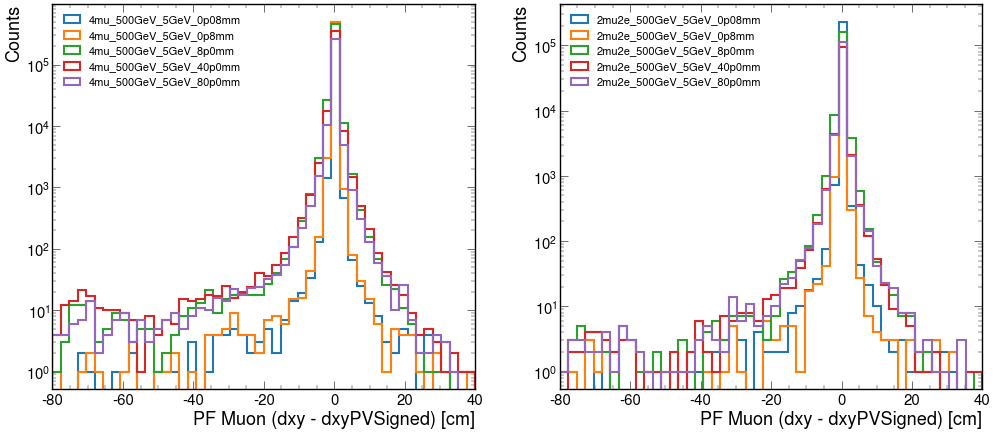

In [14]:
plt.style.use(hep.style.CMS)
fig, ax = plt.subplots(1, 2, figsize=(24,10))
for i_2mu, i_4mu in zip(samples_2mu2e,samples_4mu):
    structure("dxy - dxyPVSigned", events_4mu[i_4mu].dxy - events_4mu[i_4mu].dxyPVSigned, events_2mu2e[i_2mu].dxy - events_2mu2e[i_2mu].dxyPVSigned)
    ax[0].hist(ak.flatten(events_4mu[i_4mu].dxy - events_4mu[i_4mu].dxyPVSigned), range=(-80,40), alpha=1, bins=50, histtype='step', linewidth=3, label=i_4mu)
    ax[1].hist(ak.flatten(events_2mu2e[i_2mu].dxy - events_2mu2e[i_2mu].dxyPVSigned), range=(-80,40), alpha=1, bins=50, histtype='step', linewidth=3, label=i_2mu)
    
ax[0].set_xlim(-80,40)
ax[1].set_xlim(-80,40)
ax[0].set_xlabel('PF Muon (dxy - dxyPVSigned) [cm]')
ax[1].set_xlabel('PF Muon (dxy - dxyPVSigned) [cm]')
ax[0].set_ylabel('Counts')
ax[1].set_ylabel('Counts')
ax[0].legend(fontsize=16)
ax[1].legend(fontsize=16)
ax[0].set_yscale("log")
ax[1].set_yscale("log")
plt.savefig("../Plots/V2/PF_MUON/Displacement/dxy-dxyPVSigned.png", bbox_inches="tight")

4mu dxy - dxyPVSigned structure: [[-0.00116, -0.000131, -1.08e-07, 0.015, ... 0.00358, -2.01e-07, -5.05e-05]]
2mu2e dxy - dxyPVSigned structure: [[0.00929, -0.0306], [-0.000536, 0.0492], ... [-0.0148, 0.0108], [-0.000154, 0.116]]
4mu dxy - dxyPVSigned structure: [[-0.000344, -0.000504, -0.00349, 0.0255], ... [-0.026, -3.65e-05, 0.0236, 1.19]]
2mu2e dxy - dxyPVSigned structure: [[0.0599, -0.000294], [0.0551, -2.36], ... -0.00148, -0.000126], [0.0412, -2.7e-06]]
4mu dxy - dxyPVSigned structure: [[-0.0642, -3.44e-06, 6.15e-06, -0.0821, ... -0.000208, -0.0228, 0.244, 0.426]]
2mu2e dxy - dxyPVSigned structure: [[-0.104, 0.124], [0.207, -0.00994], ... [-0.00122, -4.21e-05], [0.0911, -6.03e-05]]
4mu dxy - dxyPVSigned structure: [[-0.0738, -5.78e-05, 3.12e-07, -1.82], ... [-0.0508, -4.47e-08, 3.22e-06]]
2mu2e dxy - dxyPVSigned structure: [[-0.00126, -0.000258], [0.0528, -1.2], ... [-1.1e-05, 0.0881], [-5.35e-05, -2.54]]
4mu dxy - dxyPVSigned structure: [[-0.144, -0.00459, -0.000406], [], ... -

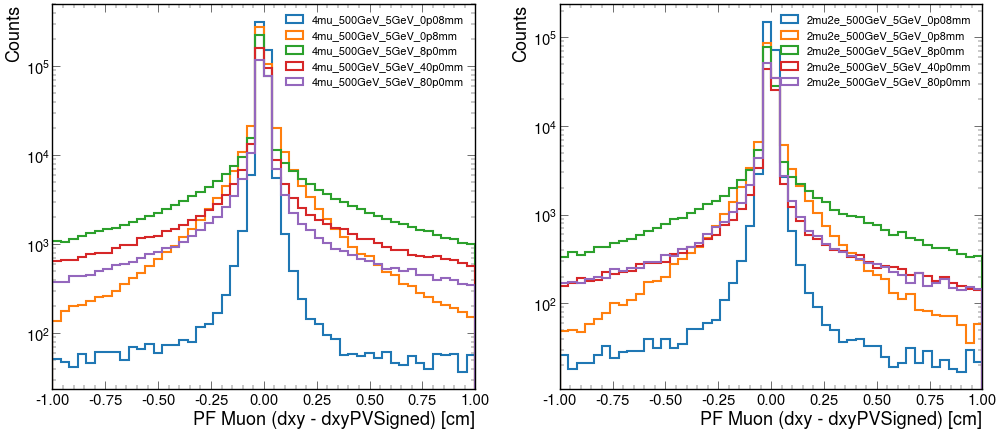

In [11]:
plt.style.use(hep.style.CMS)
fig, ax = plt.subplots(1, 2, figsize=(24,10))
for i_2mu, i_4mu in zip(samples_2mu2e,samples_4mu):
    structure("dxy - dxyPVSigned", events_4mu[i_4mu].dxy - events_4mu[i_4mu].dxyPVSigned, events_2mu2e[i_2mu].dxy - events_2mu2e[i_2mu].dxyPVSigned)
    ax[0].hist(ak.flatten(events_4mu[i_4mu].dxy - events_4mu[i_4mu].dxyPVSigned), range=(-1,1), alpha=1, bins=50, histtype='step', linewidth=3, label=i_4mu)
    ax[1].hist(ak.flatten(events_2mu2e[i_2mu].dxy - events_2mu2e[i_2mu].dxyPVSigned), range=(-1,1), alpha=1, bins=50, histtype='step', linewidth=3, label=i_2mu)
    
ax[0].set_xlim(-1,1)
ax[1].set_xlim(-1,1)
ax[0].set_xlabel('PF Muon (dxy - dxyPVSigned) [cm]')
ax[1].set_xlabel('PF Muon (dxy - dxyPVSigned) [cm]')
ax[0].set_ylabel('Counts')
ax[1].set_ylabel('Counts')
ax[0].legend(fontsize=16)
ax[1].legend(fontsize=16)
ax[0].set_yscale("log")
ax[1].set_yscale("log")
plt.savefig("../Plots/V2/PF_MUON/Displacement/dxy-dxyPVSigned_low.png", bbox_inches="tight")

## dxyBS

4mu dxyBS structure: [[0.000407, -0.00125, 0.00203, 0.00644], ... -0.000416, 0.000893, -0.00199, 0.00372]]
2mu2e dxyBS structure: [[0.00546, -0.0146], [-0.000459, 0.0244], ... [-0.00717, 0.0056], [-0.0168, 0.0584]]
4mu dxyBS structure: [[-0.00329, -0.00739, 0.00159, 0.00972], ... [-0.014, -0.00935, 0.0128, 0.469]]
2mu2e dxyBS structure: [[0.0284, -0.0364], [0.0274, -1.18], ... -0.000616, 0.0293], [0.0144, -0.0361]]
4mu dxyBS structure: [[-0.0321, 0.0204, 0.0763, -0.0417, 0.0166, ... -0.0289, -0.177, 0.00559, 0.212]]
2mu2e dxyBS structure: [[-0.0526, 0.0617], [0.103, -0.122], ... [-0.422, 0.481], [-0.000852, -0.113]]
4mu dxyBS structure: [[-0.0378, 0.131, 0.00891, -0.919], ... -0.0122], [-0.025, -0.00508, -0.0092]]
2mu2e dxyBS structure: [[-0.181, 0.393], [0.0267, -0.601], [0.988, ... [-0.00924, 0.0457], [0.29, -1.29]]
4mu dxyBS structure: [[-0.0724, -0.00194, 0.336], [], ... 0.0207, 0.00293, 0.00478], [0.194, 0.0046]]
2mu2e dxyBS structure: [[-0.00281, 0.962, 5.53e-06], [-0.00432], ...

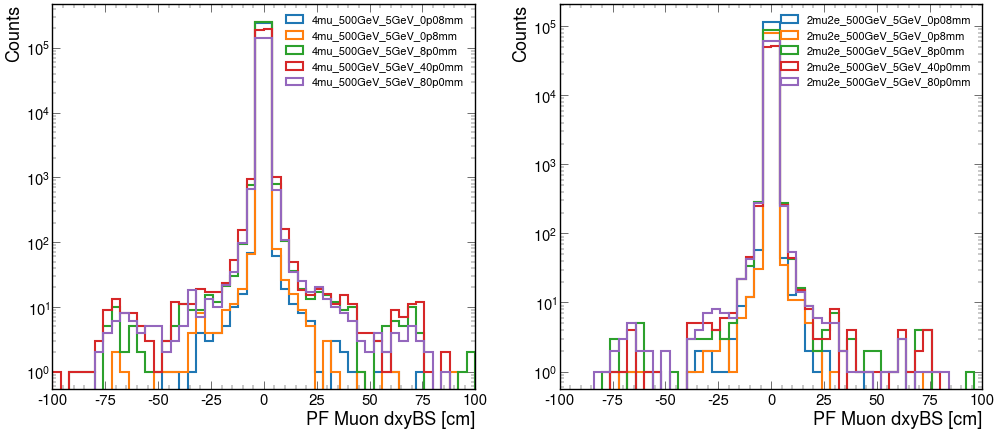

In [7]:
plt.style.use(hep.style.CMS)
fig, ax = plt.subplots(1, 2, figsize=(24,10))
for i_2mu, i_4mu in zip(samples_2mu2e,samples_4mu):
    structure("dxyBS", events_4mu[i_4mu].dxyBS, events_2mu2e[i_2mu].dxyBS)
    ax[0].hist(ak.flatten(events_4mu[i_4mu].dxyBS), alpha=1, range=(-100,100), bins=50, histtype='step', linewidth=3, label=i_4mu)
    ax[1].hist(ak.flatten(events_2mu2e[i_2mu].dxyBS), alpha=1, range=(-100,100), bins=50, histtype='step', linewidth=3, label=i_2mu)
    
ax[0].set_xlim(-100,100)
ax[1].set_xlim(-100,100)
ax[0].set_xlabel('PF Muon dxyBS [cm]')
ax[1].set_xlabel('PF Muon dxyBS [cm]')
ax[0].set_ylabel('Counts')
ax[1].set_ylabel('Counts')
ax[0].legend(fontsize=16)
ax[1].legend(fontsize=16)
ax[0].set_yscale("log")
ax[1].set_yscale("log")
plt.savefig("../Plots/V2/PF_MUON/Displacement/dxyBS.png", bbox_inches="tight")

4mu dxyBS structure: [[0.000407, -0.00125, 0.00203, 0.00644], ... -0.000416, 0.000893, -0.00199, 0.00372]]
2mu2e dxyBS structure: [[0.00546, -0.0146], [-0.000459, 0.0244], ... [-0.00717, 0.0056], [-0.0168, 0.0584]]
4mu dxyBS structure: [[-0.00329, -0.00739, 0.00159, 0.00972], ... [-0.014, -0.00935, 0.0128, 0.469]]
2mu2e dxyBS structure: [[0.0284, -0.0364], [0.0274, -1.18], ... -0.000616, 0.0293], [0.0144, -0.0361]]
4mu dxyBS structure: [[-0.0321, 0.0204, 0.0763, -0.0417, 0.0166, ... -0.0289, -0.177, 0.00559, 0.212]]
2mu2e dxyBS structure: [[-0.0526, 0.0617], [0.103, -0.122], ... [-0.422, 0.481], [-0.000852, -0.113]]
4mu dxyBS structure: [[-0.0378, 0.131, 0.00891, -0.919], ... -0.0122], [-0.025, -0.00508, -0.0092]]
2mu2e dxyBS structure: [[-0.181, 0.393], [0.0267, -0.601], [0.988, ... [-0.00924, 0.0457], [0.29, -1.29]]
4mu dxyBS structure: [[-0.0724, -0.00194, 0.336], [], ... 0.0207, 0.00293, 0.00478], [0.194, 0.0046]]
2mu2e dxyBS structure: [[-0.00281, 0.962, 5.53e-06], [-0.00432], ...

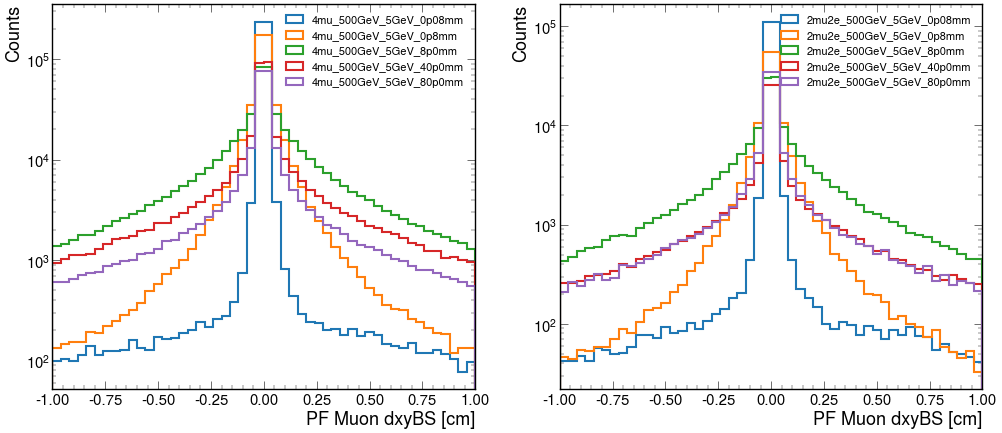

In [5]:
plt.style.use(hep.style.CMS)
fig, ax = plt.subplots(1, 2, figsize=(24,10))
for i_2mu, i_4mu in zip(samples_2mu2e,samples_4mu):
    structure("dxyBS", events_4mu[i_4mu].dxyBS, events_2mu2e[i_2mu].dxyBS)
    ax[0].hist(ak.flatten(events_4mu[i_4mu].dxyBS), alpha=1, range=(-1,1), bins=50, histtype='step', linewidth=3, label=i_4mu)
    ax[1].hist(ak.flatten(events_2mu2e[i_2mu].dxyBS), alpha=1, range=(-1,1), bins=50, histtype='step', linewidth=3, label=i_2mu)
    
ax[0].set_xlim(-1,1)
ax[1].set_xlim(-1,1)
ax[0].set_xlabel('PF Muon dxyBS [cm]')
ax[1].set_xlabel('PF Muon dxyBS [cm]')
ax[0].set_ylabel('Counts')
ax[1].set_ylabel('Counts')
ax[0].legend(fontsize=16)
ax[1].legend(fontsize=16)
ax[0].set_yscale("log")
ax[1].set_yscale("log")
plt.savefig("../Plots/V2/PF_MUON/Displacement/dxyBS_low.png", bbox_inches="tight")

## dxy - dxyBS

4mu dxy - dxyBS structure: [[-0.000904, 0.00131, -0.00106, 0.00106, ... 0.000952, 0.000845, -0.000887]]
2mu2e dxy - dxyBS structure: [[-0.00078, -0.000703], [0.000191, 0.000223, ... -0.000202], [-0.00043, -0.000418]]
4mu dxy - dxyBS structure: [[0.00263, -0.00347, -0.00647, 0.00306], ... [0.00106, -0.0009, -0.00105, 0.254]]
2mu2e dxy - dxyBS structure: [[0.00157, 0.00135], [0.000869, -0.000933, ... -0.000553], [0.0063, 0.00609]]
4mu dxy - dxyBS structure: [[-6.16e-06, 0.000129, 3.56e-05, 0.000677, ... 0.000738, -0.0239, 0.234, 0.000944]]
2mu2e dxy - dxyBS structure: [[0.000556, 0.000408], [0.000521, -0.00913, ... -0.000555], [0.0916, 0.000362]]
4mu dxy - dxyBS structure: [[0.000889, -0.00104, 0.000907, 0.0155], ... [-0.000464, 0.000461, -0.000457]]
2mu2e dxy - dxyBS structure: [[0.000828, 0.00182], [-0.000301, 4.24e-05, ... -0.00166], [-0.00352, 0.048]]
4mu dxy - dxyBS structure: [[0.000465, -0.000352, -0.00145], [], ... -0.00298, -0.00294], [-0.000165, 0.00222]]
2mu2e dxy - dxyBS stru

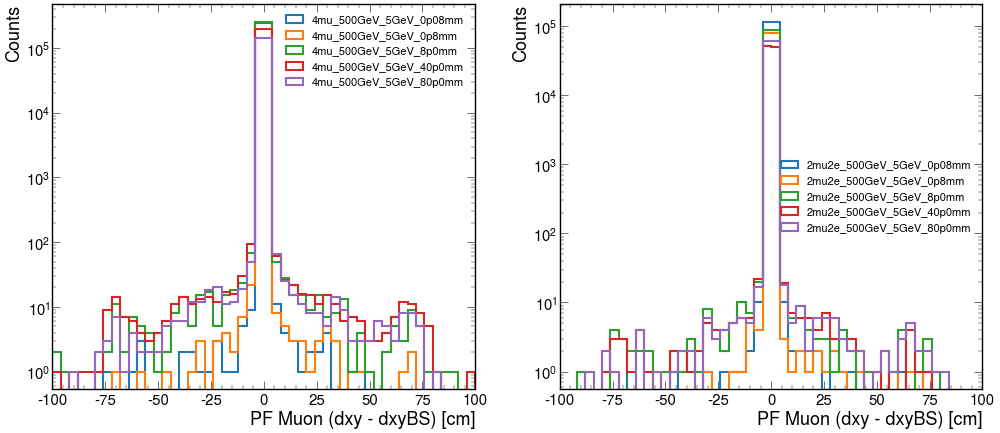

In [11]:
plt.style.use(hep.style.CMS)
fig, ax = plt.subplots(1, 2, figsize=(24,10))
for i_2mu, i_4mu in zip(samples_2mu2e,samples_4mu):
    structure("dxy - dxyBS", events_4mu[i_4mu].dxy - events_4mu[i_4mu].dxyBS, events_2mu2e[i_2mu].dxy - events_2mu2e[i_2mu].dxyBS)
    ax[0].hist(ak.flatten(events_4mu[i_4mu].dxy - events_4mu[i_4mu].dxyBS), range=(-100,100), alpha=1, bins=50, histtype='step', linewidth=3, label=i_4mu)
    ax[1].hist(ak.flatten(events_2mu2e[i_2mu].dxy - events_2mu2e[i_2mu].dxyBS), range=(-100,100), alpha=1, bins=50, histtype='step', linewidth=3, label=i_2mu)
    
ax[0].set_xlim(-100,100)
ax[1].set_xlim(-100,100)
ax[0].set_xlabel('PF Muon (dxy - dxyBS) [cm]')
ax[1].set_xlabel('PF Muon (dxy - dxyBS) [cm]')
ax[0].set_ylabel('Counts')
ax[1].set_ylabel('Counts')
ax[0].legend(fontsize=16)
ax[1].legend(fontsize=16)
ax[0].set_yscale("log")
ax[1].set_yscale("log")
plt.savefig("../Plots/V2/PF_MUON/Displacement/dxy-dxyBS.png", bbox_inches="tight")

4mu dxy - dxyBS structure: [[-0.000904, 0.00131, -0.00106, 0.00106, ... 0.000952, 0.000845, -0.000887]]
2mu2e dxy - dxyBS structure: [[-0.00078, -0.000703], [0.000191, 0.000223, ... -0.000202], [-0.00043, -0.000418]]
4mu dxy - dxyBS structure: [[0.00263, -0.00347, -0.00647, 0.00306], ... [0.00106, -0.0009, -0.00105, 0.254]]
2mu2e dxy - dxyBS structure: [[0.00157, 0.00135], [0.000869, -0.000933, ... -0.000553], [0.0063, 0.00609]]
4mu dxy - dxyBS structure: [[-6.16e-06, 0.000129, 3.56e-05, 0.000677, ... 0.000738, -0.0239, 0.234, 0.000944]]
2mu2e dxy - dxyBS structure: [[0.000556, 0.000408], [0.000521, -0.00913, ... -0.000555], [0.0916, 0.000362]]
4mu dxy - dxyBS structure: [[0.000889, -0.00104, 0.000907, 0.0155], ... [-0.000464, 0.000461, -0.000457]]
2mu2e dxy - dxyBS structure: [[0.000828, 0.00182], [-0.000301, 4.24e-05, ... -0.00166], [-0.00352, 0.048]]
4mu dxy - dxyBS structure: [[0.000465, -0.000352, -0.00145], [], ... -0.00298, -0.00294], [-0.000165, 0.00222]]
2mu2e dxy - dxyBS stru

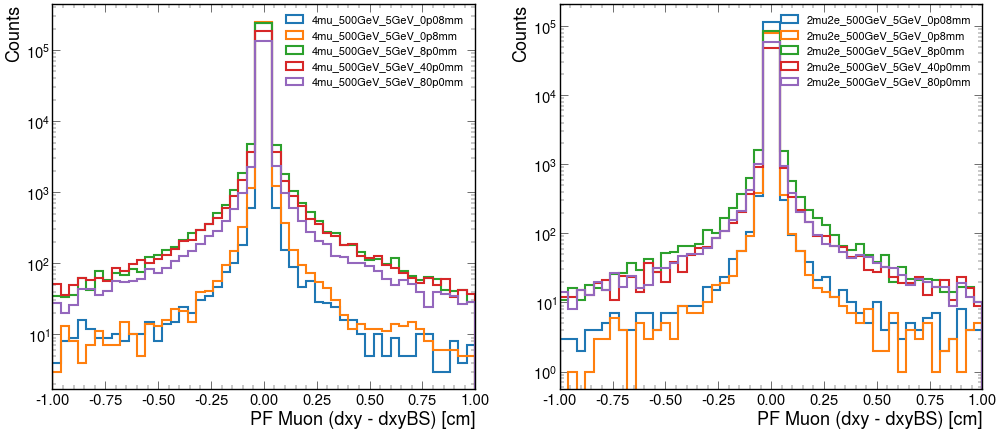

In [7]:
plt.style.use(hep.style.CMS)
fig, ax = plt.subplots(1, 2, figsize=(24,10))
for i_2mu, i_4mu in zip(samples_2mu2e,samples_4mu):
    structure("dxy - dxyBS", events_4mu[i_4mu].dxy - events_4mu[i_4mu].dxyBS, events_2mu2e[i_2mu].dxy - events_2mu2e[i_2mu].dxyBS)
    ax[0].hist(ak.flatten(events_4mu[i_4mu].dxy - events_4mu[i_4mu].dxyBS), range=(-1,1), alpha=1, bins=50, histtype='step', linewidth=3, label=i_4mu)
    ax[1].hist(ak.flatten(events_2mu2e[i_2mu].dxy - events_2mu2e[i_2mu].dxyBS), range=(-1,1), alpha=1, bins=50, histtype='step', linewidth=3, label=i_2mu)
    
ax[0].set_xlim(-1,1)
ax[1].set_xlim(-1,1)
ax[0].set_xlabel('PF Muon (dxy - dxyBS) [cm]')
ax[1].set_xlabel('PF Muon (dxy - dxyBS) [cm]')
ax[0].set_ylabel('Counts')
ax[1].set_ylabel('Counts')
ax[0].legend(fontsize=16)
ax[1].legend(fontsize=16)
ax[0].set_yscale("log")
ax[1].set_yscale("log")
plt.savefig("../Plots/V2/PF_MUON/Displacement/dxy-dxyBS_low.png", bbox_inches="tight")

## dxybs - dxyBS

4mu dxybs - dxyBS structure: [[0.000157, 0.000251, -1.27e-05, 1.49e-05, ... 8.26e-05, -2.28e-05, -3.25e-05]]
2mu2e dxybs - dxyBS structure: [[5.2e-05, 7e-06], [2.41e-06, 5.53e-05, ... -3.88e-06], [-0.000156, 9.38e-06]]
4mu dxybs - dxyBS structure: [[-0.000325, -0.000525, -0.00354, 1.91e-05, ... 2.5e-06, -3.82e-05, -3.8e-06, 0.253]]
2mu2e dxybs - dxyBS structure: [[-2.8e-05, -0.000302], [0.00136, 4.4e-05, ... -9.53e-05], [0.00016, -1.77e-05]]
4mu dxybs - dxyBS structure: [[8.54e-05, -3.88e-05, 3.56e-05, 6.03e-06, ... -0.000208, -0.0228, 0.235, 8.93e-05]]
2mu2e dxybs - dxyBS structure: [[0.000159, 1.16e-05], [-0.000333, -0.00999, ... -6.63e-05], [0.0911, -6.52e-05]]
4mu dxybs - dxyBS structure: [[4.4e-06, -6.19e-05, -6.06e-07, 0.0165], ... [9.48e-06, 2.24e-05, -6.84e-05]]
2mu2e dxybs - dxyBS structure: [[-0.00125, -0.000129], [6.48e-05, 4.24e-05, ... 4.73e-05], [-9.89e-05, 0.0519]]
4mu dxybs - dxyBS structure: [[-2.33e-05, -1.1e-05, -0.000227], [], ... 1.13e-05, 2.19e-05], [7.9e-05, -2.7

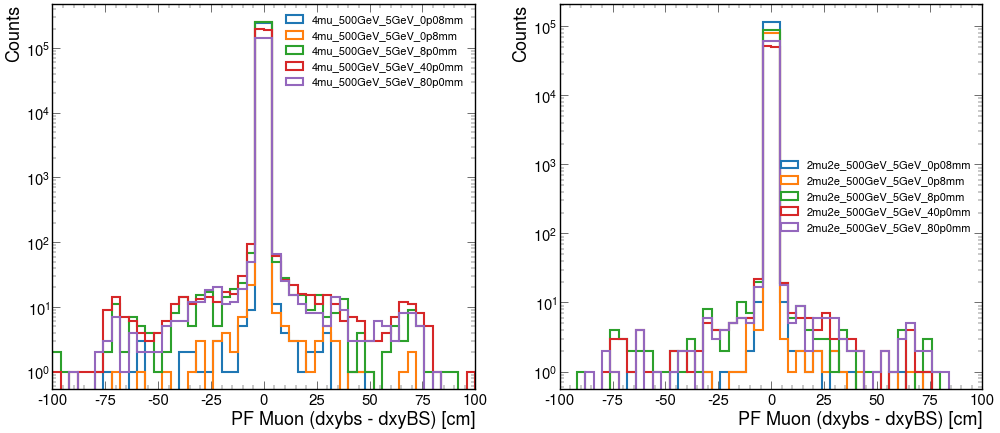

In [6]:
plt.style.use(hep.style.CMS)
fig, ax = plt.subplots(1, 2, figsize=(24,10))
for i_2mu, i_4mu in zip(samples_2mu2e,samples_4mu):
    structure("dxybs - dxyBS", events_4mu[i_4mu].dxybs - events_4mu[i_4mu].dxyBS, events_2mu2e[i_2mu].dxybs - events_2mu2e[i_2mu].dxyBS)
    ax[0].hist(ak.flatten(events_4mu[i_4mu].dxybs - events_4mu[i_4mu].dxyBS), range=(-100,100), alpha=1, bins=50, histtype='step', linewidth=3, label=i_4mu)
    ax[1].hist(ak.flatten(events_2mu2e[i_2mu].dxybs - events_2mu2e[i_2mu].dxyBS), range=(-100,100), alpha=1, bins=50, histtype='step', linewidth=3, label=i_2mu)
    
ax[0].set_xlim(-100,100)
ax[1].set_xlim(-100,100)
ax[0].set_xlabel('PF Muon (dxybs - dxyBS) [cm]')
ax[1].set_xlabel('PF Muon (dxybs - dxyBS) [cm]')
ax[0].set_ylabel('Counts')
ax[1].set_ylabel('Counts')
ax[0].legend(fontsize=16)
ax[1].legend(fontsize=16)
ax[0].set_yscale("log")
ax[1].set_yscale("log")
plt.savefig("../Plots/V2/PF_MUON/Displacement/dxybs-dxyBS.png", bbox_inches="tight")

4mu dxybs - dxyBS structure: [[0.000157, 0.000251, -1.27e-05, 1.49e-05, ... 8.26e-05, -2.28e-05, -3.25e-05]]
2mu2e dxybs - dxyBS structure: [[5.2e-05, 7e-06], [2.41e-06, 5.53e-05, ... -3.88e-06], [-0.000156, 9.38e-06]]
4mu dxybs - dxyBS structure: [[-0.000325, -0.000525, -0.00354, 1.91e-05, ... 2.5e-06, -3.82e-05, -3.8e-06, 0.253]]
2mu2e dxybs - dxyBS structure: [[-2.8e-05, -0.000302], [0.00136, 4.4e-05, ... -9.53e-05], [0.00016, -1.77e-05]]
4mu dxybs - dxyBS structure: [[8.54e-05, -3.88e-05, 3.56e-05, 6.03e-06, ... -0.000208, -0.0228, 0.235, 8.93e-05]]
2mu2e dxybs - dxyBS structure: [[0.000159, 1.16e-05], [-0.000333, -0.00999, ... -6.63e-05], [0.0911, -6.52e-05]]
4mu dxybs - dxyBS structure: [[4.4e-06, -6.19e-05, -6.06e-07, 0.0165], ... [9.48e-06, 2.24e-05, -6.84e-05]]
2mu2e dxybs - dxyBS structure: [[-0.00125, -0.000129], [6.48e-05, 4.24e-05, ... 4.73e-05], [-9.89e-05, 0.0519]]
4mu dxybs - dxyBS structure: [[-2.33e-05, -1.1e-05, -0.000227], [], ... 1.13e-05, 2.19e-05], [7.9e-05, -2.7

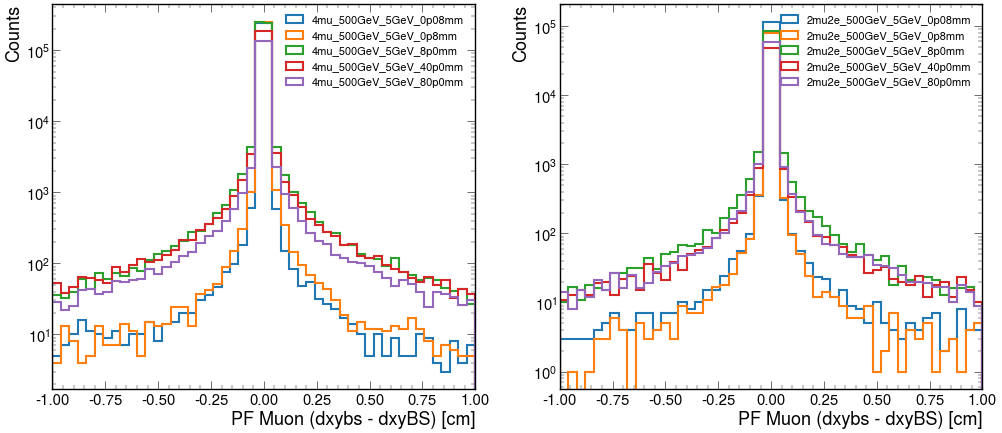

In [9]:
plt.style.use(hep.style.CMS)
fig, ax = plt.subplots(1, 2, figsize=(24,10))
for i_2mu, i_4mu in zip(samples_2mu2e,samples_4mu):
    structure("dxybs - dxyBS", events_4mu[i_4mu].dxybs - events_4mu[i_4mu].dxyBS, events_2mu2e[i_2mu].dxybs - events_2mu2e[i_2mu].dxyBS)
    ax[0].hist(ak.flatten(events_4mu[i_4mu].dxybs - events_4mu[i_4mu].dxyBS), range=(-1,1), alpha=1, bins=50, histtype='step', linewidth=3, label=i_4mu)
    ax[1].hist(ak.flatten(events_2mu2e[i_2mu].dxybs - events_2mu2e[i_2mu].dxyBS), range=(-1,1), alpha=1, bins=50, histtype='step', linewidth=3, label=i_2mu)
    
ax[0].set_xlim(-1,1)
ax[1].set_xlim(-1,1)
ax[0].set_xlabel('PF Muon (dxybs - dxyBS) [cm]')
ax[1].set_xlabel('PF Muon (dxybs - dxyBS) [cm]')
ax[0].set_ylabel('Counts')
ax[1].set_ylabel('Counts')
ax[0].legend(fontsize=16)
ax[1].legend(fontsize=16)
ax[0].set_yscale("log")
ax[1].set_yscale("log")
plt.savefig("../Plots/V2/PF_MUON/Displacement/dxybs-dxyBS_low.png", bbox_inches="tight")

## dxyBSTraj

4mu dxyBSTraj structure: [[0.0394, 0.0406, 0.0417, 0.0333], ... [0.0316, 0.0256, 0.0295, 0.0349]]
2mu2e dxyBSTraj structure: [[0.026, 0.0488], [0.0428, 0.0185], ... [0.0146, 0.000852], [0.00384, 0.0686]]
4mu dxyBSTraj structure: [[0.0356, 0.0247, 0.0339, 0.024], [0.00856, ... [0.0286, 0.0523, 0.0299, 0.512]]
2mu2e dxyBSTraj structure: [[0.0307, 0.0364], [0.0666, 1.14], ... [0.0409, 0.0424, 0.0394], [0.0246, 0.0759]]
4mu dxyBSTraj structure: [[0.00647, 0.0187, 0.114, 0.0844, 0.00531], ... 0.689, 0.0721, 0.149, 0.0348, 0.169]]
2mu2e dxyBSTraj structure: [[0.0443, 0.0685], [0.091, 0.134], [0.167, ... [0.435, 0.471], [0.037, 0.149]]
4mu dxyBSTraj structure: [[0.00428, 0.0918, 0.0508, 0.96], [0.00682, ... 0.00612], [0.00224, 0.0268, 0.0137]]
2mu2e dxyBSTraj structure: [[0.156, 0.419], [0.0378, 0.584], [0.945, ... [0.0524, 0.00272], [0.264, 1.32]]
4mu dxyBSTraj structure: [[0.0374, 0.038, 0.312], [], [0.34, ... [0.0303, 0.0217, 0.0158], [0.156, 0.0338]]
2mu2e dxyBSTraj structure: [[0.0157, 0

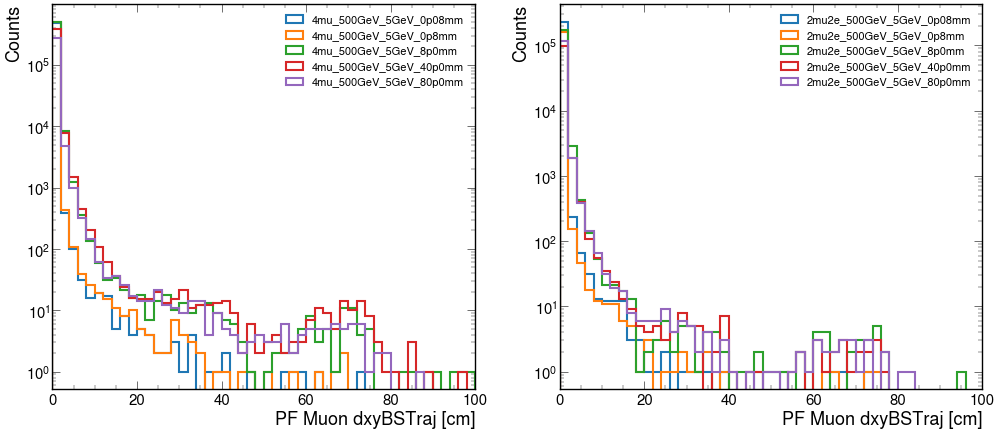

In [5]:
plt.style.use(hep.style.CMS)
fig, ax = plt.subplots(1, 2, figsize=(24,10))
for i_2mu, i_4mu in zip(samples_2mu2e,samples_4mu):
    structure("dxyBSTraj", events_4mu[i_4mu].dxyBSTraj, events_2mu2e[i_2mu].dxyBSTraj)
    ax[0].hist(ak.flatten(events_4mu[i_4mu].dxyBSTraj), range=(0,100), alpha=1, bins=50, histtype='step', linewidth=3, label=i_4mu)
    ax[1].hist(ak.flatten(events_2mu2e[i_2mu].dxyBSTraj), range=(0,100), alpha=1, bins=50, histtype='step', linewidth=3, label=i_2mu)
    
ax[0].set_xlim(0,100)
ax[1].set_xlim(0,100)
ax[0].set_xlabel('PF Muon dxyBSTraj [cm]')
ax[1].set_xlabel('PF Muon dxyBSTraj [cm]')
ax[0].set_ylabel('Counts')
ax[1].set_ylabel('Counts')
ax[0].legend(fontsize=16)
ax[1].legend(fontsize=16)
ax[0].set_yscale("log")
ax[1].set_yscale("log")
plt.savefig("../Plots/V2/PF_MUON/Displacement/dxyBSTraj.png", bbox_inches="tight")

4mu dxyBSTraj structure: [[0.0394, 0.0406, 0.0417, 0.0333], ... [0.0316, 0.0256, 0.0295, 0.0349]]
2mu2e dxyBSTraj structure: [[0.026, 0.0488], [0.0428, 0.0185], ... [0.0146, 0.000852], [0.00384, 0.0686]]
4mu dxyBSTraj structure: [[0.0356, 0.0247, 0.0339, 0.024], [0.00856, ... [0.0286, 0.0523, 0.0299, 0.512]]
2mu2e dxyBSTraj structure: [[0.0307, 0.0364], [0.0666, 1.14], ... [0.0409, 0.0424, 0.0394], [0.0246, 0.0759]]
4mu dxyBSTraj structure: [[0.00647, 0.0187, 0.114, 0.0844, 0.00531], ... 0.689, 0.0721, 0.149, 0.0348, 0.169]]
2mu2e dxyBSTraj structure: [[0.0443, 0.0685], [0.091, 0.134], [0.167, ... [0.435, 0.471], [0.037, 0.149]]
4mu dxyBSTraj structure: [[0.00428, 0.0918, 0.0508, 0.96], [0.00682, ... 0.00612], [0.00224, 0.0268, 0.0137]]
2mu2e dxyBSTraj structure: [[0.156, 0.419], [0.0378, 0.584], [0.945, ... [0.0524, 0.00272], [0.264, 1.32]]
4mu dxyBSTraj structure: [[0.0374, 0.038, 0.312], [], [0.34, ... [0.0303, 0.0217, 0.0158], [0.156, 0.0338]]
2mu2e dxyBSTraj structure: [[0.0157, 0

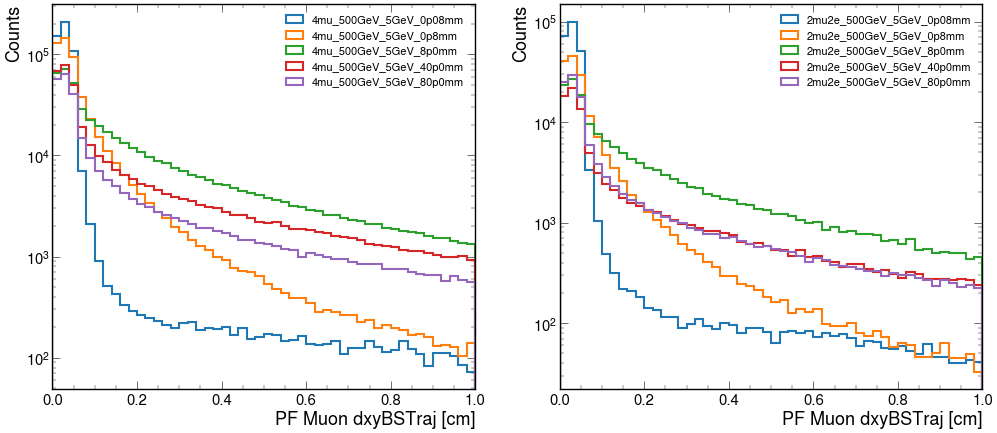

In [7]:
plt.style.use(hep.style.CMS)
fig, ax = plt.subplots(1, 2, figsize=(24,10))
for i_2mu, i_4mu in zip(samples_2mu2e,samples_4mu):
    structure("dxyBSTraj", events_4mu[i_4mu].dxyBSTraj, events_2mu2e[i_2mu].dxyBSTraj)
    ax[0].hist(ak.flatten(events_4mu[i_4mu].dxyBSTraj), range=(0,1), alpha=1, bins=50, histtype='step', linewidth=3, label=i_4mu)
    ax[1].hist(ak.flatten(events_2mu2e[i_2mu].dxyBSTraj), range=(0,1), alpha=1, bins=50, histtype='step', linewidth=3, label=i_2mu)
    
ax[0].set_xlim(0,1)
ax[1].set_xlim(0,1)
ax[0].set_xlabel('PF Muon dxyBSTraj [cm]')
ax[1].set_xlabel('PF Muon dxyBSTraj [cm]')
ax[0].set_ylabel('Counts')
ax[1].set_ylabel('Counts')
ax[0].legend(fontsize=16)
ax[1].legend(fontsize=16)
ax[0].set_yscale("log")
ax[1].set_yscale("log")
plt.savefig("../Plots/V2/PF_MUON/Displacement/dxyBSTraj_low.png", bbox_inches="tight")

4mu dxyBSTraj structure: [[0.0394, 0.0406, 0.0417, 0.0333], ... [0.0316, 0.0256, 0.0295, 0.0349]]
2mu2e dxyBSTraj structure: [[0.026, 0.0488], [0.0428, 0.0185], ... [0.0146, 0.000852], [0.00384, 0.0686]]
4mu dxyBSTraj structure: [[0.0356, 0.0247, 0.0339, 0.024], [0.00856, ... [0.0286, 0.0523, 0.0299, 0.512]]
2mu2e dxyBSTraj structure: [[0.0307, 0.0364], [0.0666, 1.14], ... [0.0409, 0.0424, 0.0394], [0.0246, 0.0759]]
4mu dxyBSTraj structure: [[0.00647, 0.0187, 0.114, 0.0844, 0.00531], ... 0.689, 0.0721, 0.149, 0.0348, 0.169]]
2mu2e dxyBSTraj structure: [[0.0443, 0.0685], [0.091, 0.134], [0.167, ... [0.435, 0.471], [0.037, 0.149]]
4mu dxyBSTraj structure: [[0.00428, 0.0918, 0.0508, 0.96], [0.00682, ... 0.00612], [0.00224, 0.0268, 0.0137]]
2mu2e dxyBSTraj structure: [[0.156, 0.419], [0.0378, 0.584], [0.945, ... [0.0524, 0.00272], [0.264, 1.32]]
4mu dxyBSTraj structure: [[0.0374, 0.038, 0.312], [], [0.34, ... [0.0303, 0.0217, 0.0158], [0.156, 0.0338]]
2mu2e dxyBSTraj structure: [[0.0157, 0

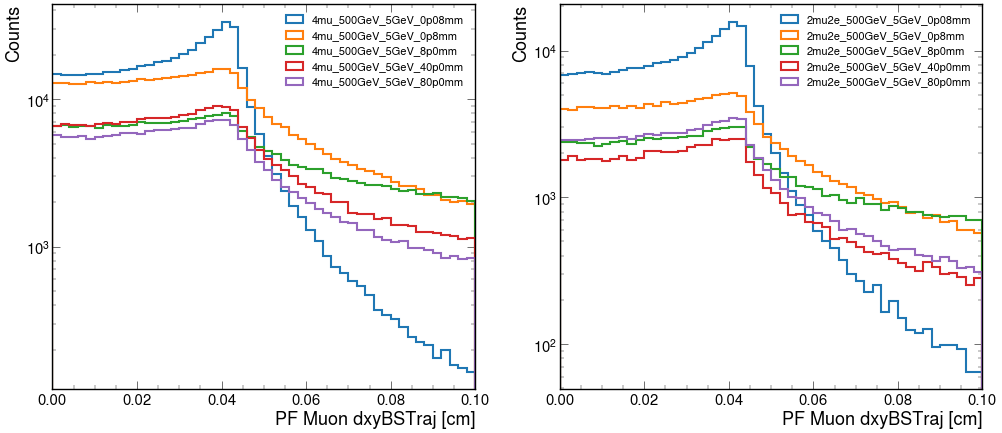

In [12]:
plt.style.use(hep.style.CMS)
fig, ax = plt.subplots(1, 2, figsize=(24,10))
for i_2mu, i_4mu in zip(samples_2mu2e,samples_4mu):
    structure("dxyBSTraj", events_4mu[i_4mu].dxyBSTraj, events_2mu2e[i_2mu].dxyBSTraj)
    ax[0].hist(ak.flatten(events_4mu[i_4mu].dxyBSTraj), range=(0,0.1), alpha=1, bins=50, histtype='step', linewidth=3, label=i_4mu)
    ax[1].hist(ak.flatten(events_2mu2e[i_2mu].dxyBSTraj), range=(0,0.1), alpha=1, bins=50, histtype='step', linewidth=3, label=i_2mu)
    
ax[0].set_xlim(0,0.1)
ax[1].set_xlim(0,0.1)
ax[0].set_xlabel('PF Muon dxyBSTraj [cm]')
ax[1].set_xlabel('PF Muon dxyBSTraj [cm]')
ax[0].set_ylabel('Counts')
ax[1].set_ylabel('Counts')
ax[0].legend(fontsize=16)
ax[1].legend(fontsize=16)
ax[0].set_yscale("log")
ax[1].set_yscale("log")
plt.savefig("../Plots/V2/PF_MUON/Displacement/dxyBSTraj_superlow.png", bbox_inches="tight")

## dxyBSSigned

4mu dxyBSSigned structure: [[-0.000407, 0.00125, 0.00203, -0.00644], ... 0.000416, -0.000893, 0.00199, 0.00372]]
2mu2e dxyBSSigned structure: [[-0.00546, 0.0146], [0.000458, -0.0244], ... [0.00717, -0.0056], [-0.0168, -0.0584]]
4mu dxyBSSigned structure: [[-0.00329, -0.00739, 0.00159, -0.00972], ... [-0.014, -0.00935, 0.0128, -0.469]]
2mu2e dxyBSSigned structure: [[0.0284, -0.0364], [-0.0274, 1.18], ... 0.000616, 0.0293], [-0.0144, -0.0361]]
4mu dxyBSSigned structure: [[0.0321, 0.0204, 0.0763, 0.0417, -0.0166, ... -0.0289, -0.177, -0.00559, -0.212]]
2mu2e dxyBSSigned structure: [[0.0526, -0.0617], [-0.103, -0.122], ... [-0.422, 0.481], [-0.000852, -0.113]]
4mu dxyBSSigned structure: [[-0.0378, 0.131, 0.00891, 0.919], ... -0.0122], [0.025, -0.00508, -0.0092]]
2mu2e dxyBSSigned structure: [[-0.181, 0.393], [-0.0267, 0.601], ... [-0.00924, -0.0457], [0.29, 1.29]]
4mu dxyBSSigned structure: [[0.0724, 0.00194, 0.336], [], ... -0.0207, 0.00293, 0.00478], [0.194, 0.0046]]
2mu2e dxyBSSigned st

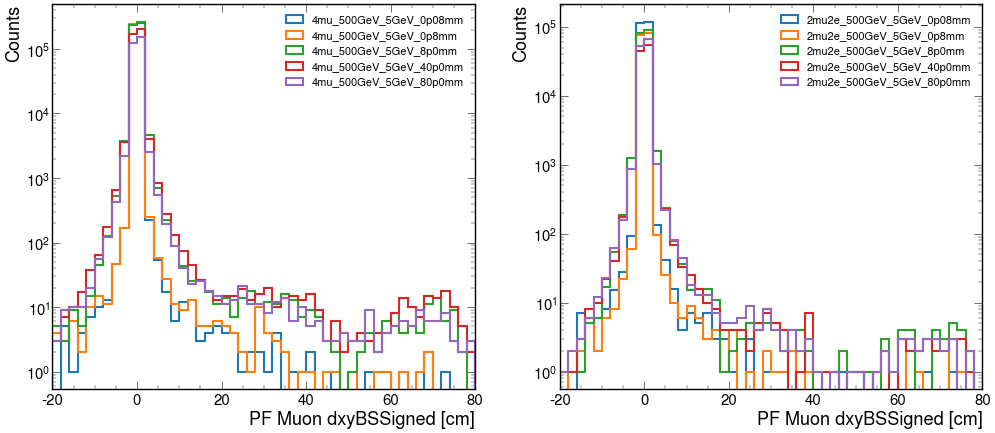

In [13]:
plt.style.use(hep.style.CMS)
fig, ax = plt.subplots(1, 2, figsize=(24,10))
for i_2mu, i_4mu in zip(samples_2mu2e,samples_4mu):
    structure("dxyBSSigned", events_4mu[i_4mu].dxyBSSigned, events_2mu2e[i_2mu].dxyBSSigned)
    ax[0].hist(ak.flatten(events_4mu[i_4mu].dxyBSSigned), range=(-20,80), alpha=1, bins=50, histtype='step', linewidth=3, label=i_4mu)
    ax[1].hist(ak.flatten(events_2mu2e[i_2mu].dxyBSSigned), range=(-20,80), alpha=1, bins=50, histtype='step', linewidth=3, label=i_2mu)
    
ax[0].set_xlim(-20,80)
ax[1].set_xlim(-20,80)
ax[0].set_xlabel('PF Muon dxyBSSigned [cm]')
ax[1].set_xlabel('PF Muon dxyBSSigned [cm]')
ax[0].set_ylabel('Counts')
ax[1].set_ylabel('Counts')
ax[0].legend(fontsize=16)
ax[1].legend(fontsize=16)
ax[0].set_yscale("log")
ax[1].set_yscale("log")
plt.savefig("../Plots/V2/PF_MUON/Displacement/dxyBSSigned.png", bbox_inches="tight")

4mu dxyBSSigned structure: [[-0.000407, 0.00125, 0.00203, -0.00644], ... 0.000416, -0.000893, 0.00199, 0.00372]]
2mu2e dxyBSSigned structure: [[-0.00546, 0.0146], [0.000458, -0.0244], ... [0.00717, -0.0056], [-0.0168, -0.0584]]
4mu dxyBSSigned structure: [[-0.00329, -0.00739, 0.00159, -0.00972], ... [-0.014, -0.00935, 0.0128, -0.469]]
2mu2e dxyBSSigned structure: [[0.0284, -0.0364], [-0.0274, 1.18], ... 0.000616, 0.0293], [-0.0144, -0.0361]]
4mu dxyBSSigned structure: [[0.0321, 0.0204, 0.0763, 0.0417, -0.0166, ... -0.0289, -0.177, -0.00559, -0.212]]
2mu2e dxyBSSigned structure: [[0.0526, -0.0617], [-0.103, -0.122], ... [-0.422, 0.481], [-0.000852, -0.113]]
4mu dxyBSSigned structure: [[-0.0378, 0.131, 0.00891, 0.919], ... -0.0122], [0.025, -0.00508, -0.0092]]
2mu2e dxyBSSigned structure: [[-0.181, 0.393], [-0.0267, 0.601], ... [-0.00924, -0.0457], [0.29, 1.29]]
4mu dxyBSSigned structure: [[0.0724, 0.00194, 0.336], [], ... -0.0207, 0.00293, 0.00478], [0.194, 0.0046]]
2mu2e dxyBSSigned st

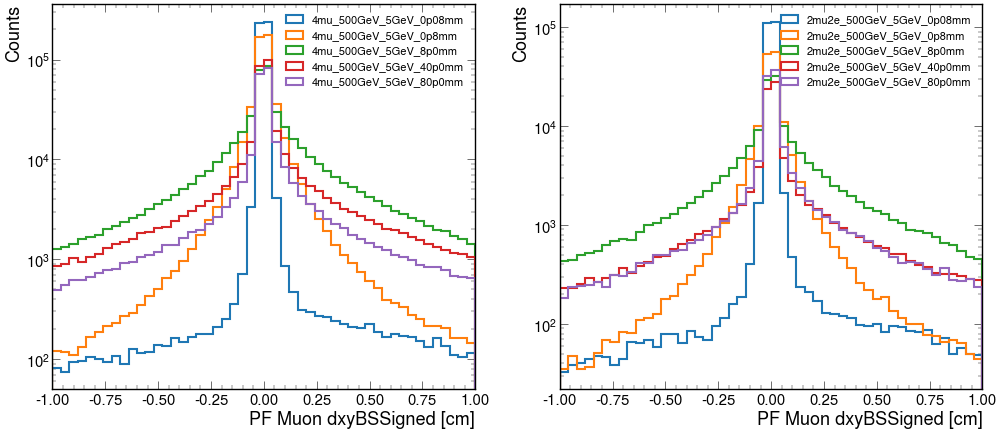

In [14]:
plt.style.use(hep.style.CMS)
fig, ax = plt.subplots(1, 2, figsize=(24,10))
for i_2mu, i_4mu in zip(samples_2mu2e,samples_4mu):
    structure("dxyBSSigned", events_4mu[i_4mu].dxyBSSigned, events_2mu2e[i_2mu].dxyBSSigned)
    ax[0].hist(ak.flatten(events_4mu[i_4mu].dxyBSSigned), range=(-1,1), alpha=1, bins=50, histtype='step', linewidth=3, label=i_4mu)
    ax[1].hist(ak.flatten(events_2mu2e[i_2mu].dxyBSSigned), range=(-1,1), alpha=1, bins=50, histtype='step', linewidth=3, label=i_2mu)
    
ax[0].set_xlim(-1,1)
ax[1].set_xlim(-1,1)
ax[0].set_xlabel('PF Muon dxyBSSigned [cm]')
ax[1].set_xlabel('PF Muon dxyBSSigned [cm]')
ax[0].set_ylabel('Counts')
ax[1].set_ylabel('Counts')
ax[0].legend(fontsize=16)
ax[1].legend(fontsize=16)
ax[0].set_yscale("log")
ax[1].set_yscale("log")
plt.savefig("../Plots/V2/PF_MUON/Displacement/dxyBSSigned_low.png", bbox_inches="tight")

## dxy - dxyBSSigned

4mu dxy - dxyBSSigned structure: [[-8.92e-05, -0.0012, -0.00106, 0.0139], ... -0.00349, 0.00274, -0.00313, -0.000887]]
2mu2e dxy - dxyBSSigned structure: [[0.0101, -0.0299], [-0.000726, 0.049], ... [-0.0145, 0.011], [-0.00043, 0.116]]
4mu dxy - dxyBSSigned structure: [[0.00263, -0.00347, -0.00647, 0.0225], ... [0.00106, -0.0009, -0.00105, 1.19]]
2mu2e dxy - dxyBSSigned structure: [[0.00157, 0.00135], [0.0556, -2.35], ... -0.00117, -0.000553], [0.035, 0.00609]]
4mu dxy - dxyBSSigned structure: [[-0.0641, 0.000129, 3.56e-05, -0.0828, 0.0323, ... 0.000738, -0.0239, 0.245, 0.425]]
2mu2e dxy - dxyBSSigned structure: [[-0.105, 0.124], [0.206, -0.00913], ... [-0.00159, -0.000555], [0.0916, 0.000362]]
4mu dxy - dxyBSSigned structure: [[0.000889, -0.00104, 0.000907, -1.82], ... [-0.0504, 0.000461, -0.000457]]
2mu2e dxy - dxyBSSigned structure: [[0.000828, 0.00182], [0.0532, -1.2], ... [-0.00165, 0.0898], [-0.00352, -2.54]]
4mu dxy - dxyBSSigned structure: [[-0.144, -0.00424, -0.00145], [], ... 

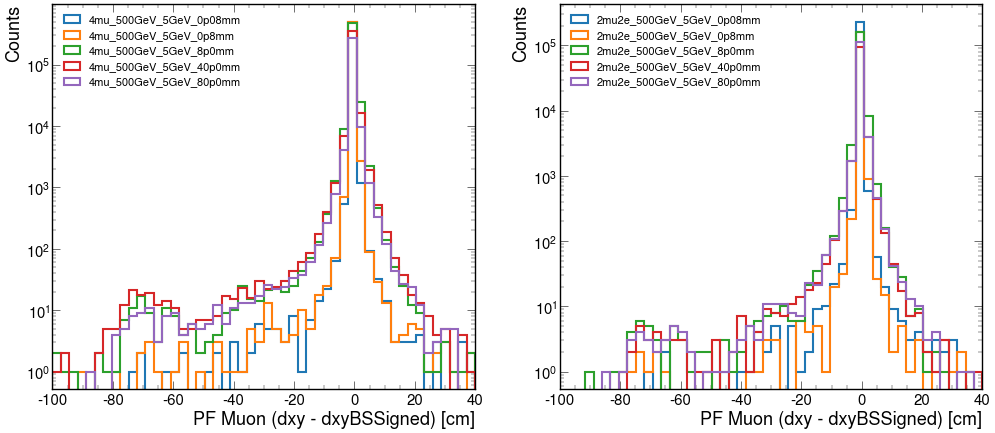

In [9]:
plt.style.use(hep.style.CMS)
fig, ax = plt.subplots(1, 2, figsize=(24,10))
for i_2mu, i_4mu in zip(samples_2mu2e,samples_4mu):
    structure("dxy - dxyBSSigned", events_4mu[i_4mu].dxy - events_4mu[i_4mu].dxyBSSigned, events_2mu2e[i_2mu].dxy - events_2mu2e[i_2mu].dxyBSSigned)
    ax[0].hist(ak.flatten(events_4mu[i_4mu].dxy - events_4mu[i_4mu].dxyBSSigned), range=(-100,40), alpha=1, bins=50, histtype='step', linewidth=3, label=i_4mu)
    ax[1].hist(ak.flatten(events_2mu2e[i_2mu].dxy - events_2mu2e[i_2mu].dxyBSSigned), range=(-100,40), alpha=1, bins=50, histtype='step', linewidth=3, label=i_2mu)
    
ax[0].set_xlim(-100,40)
ax[1].set_xlim(-100,40)
ax[0].set_xlabel('PF Muon (dxy - dxyBSSigned) [cm]')
ax[1].set_xlabel('PF Muon (dxy - dxyBSSigned) [cm]')
ax[0].set_ylabel('Counts')
ax[1].set_ylabel('Counts')
ax[0].legend(fontsize=16)
ax[1].legend(fontsize=16)
ax[0].set_yscale("log")
ax[1].set_yscale("log")
plt.savefig("../Plots/V2/PF_MUON/Displacement/dxy-dxyBSSigned.png", bbox_inches="tight")

4mu dxy - dxyBSSigned structure: [[-8.92e-05, -0.0012, -0.00106, 0.0139], ... -0.00349, 0.00274, -0.00313, -0.000887]]
2mu2e dxy - dxyBSSigned structure: [[0.0101, -0.0299], [-0.000726, 0.049], ... [-0.0145, 0.011], [-0.00043, 0.116]]
4mu dxy - dxyBSSigned structure: [[0.00263, -0.00347, -0.00647, 0.0225], ... [0.00106, -0.0009, -0.00105, 1.19]]
2mu2e dxy - dxyBSSigned structure: [[0.00157, 0.00135], [0.0556, -2.35], ... -0.00117, -0.000553], [0.035, 0.00609]]
4mu dxy - dxyBSSigned structure: [[-0.0641, 0.000129, 3.56e-05, -0.0828, 0.0323, ... 0.000738, -0.0239, 0.245, 0.425]]
2mu2e dxy - dxyBSSigned structure: [[-0.105, 0.124], [0.206, -0.00913], ... [-0.00159, -0.000555], [0.0916, 0.000362]]
4mu dxy - dxyBSSigned structure: [[0.000889, -0.00104, 0.000907, -1.82], ... [-0.0504, 0.000461, -0.000457]]
2mu2e dxy - dxyBSSigned structure: [[0.000828, 0.00182], [0.0532, -1.2], ... [-0.00165, 0.0898], [-0.00352, -2.54]]
4mu dxy - dxyBSSigned structure: [[-0.144, -0.00424, -0.00145], [], ... 

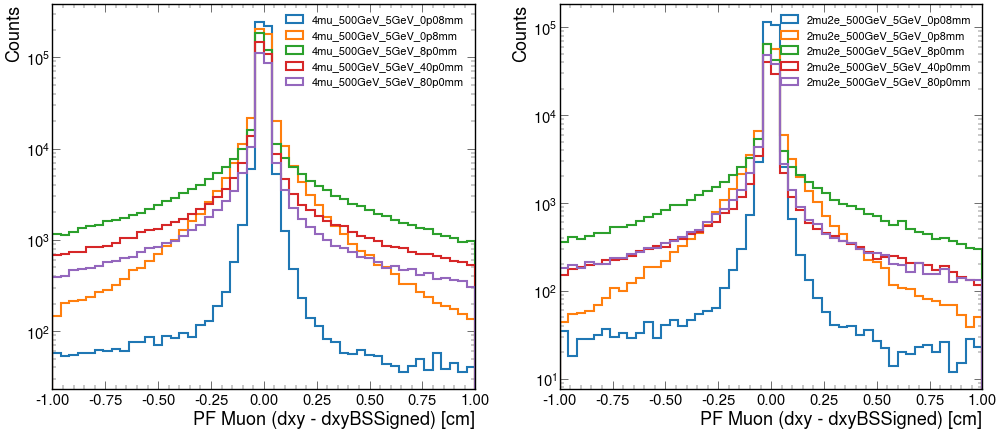

In [6]:
plt.style.use(hep.style.CMS)
fig, ax = plt.subplots(1, 2, figsize=(24,10))
for i_2mu, i_4mu in zip(samples_2mu2e,samples_4mu):
    structure("dxy - dxyBSSigned", events_4mu[i_4mu].dxy - events_4mu[i_4mu].dxyBSSigned, events_2mu2e[i_2mu].dxy - events_2mu2e[i_2mu].dxyBSSigned)
    ax[0].hist(ak.flatten(events_4mu[i_4mu].dxy - events_4mu[i_4mu].dxyBSSigned), range=(-1,1), alpha=1, bins=50, histtype='step', linewidth=3, label=i_4mu)
    ax[1].hist(ak.flatten(events_2mu2e[i_2mu].dxy - events_2mu2e[i_2mu].dxyBSSigned), range=(-1,1), alpha=1, bins=50, histtype='step', linewidth=3, label=i_2mu)
    
ax[0].set_xlim(-1,1)
ax[1].set_xlim(-1,1)
ax[0].set_xlabel('PF Muon (dxy - dxyBSSigned) [cm]')
ax[1].set_xlabel('PF Muon (dxy - dxyBSSigned) [cm]')
ax[0].set_ylabel('Counts')
ax[1].set_ylabel('Counts')
ax[0].legend(fontsize=16)
ax[1].legend(fontsize=16)
ax[0].set_yscale("log")
ax[1].set_yscale("log")
plt.savefig("../Plots/V2/PF_MUON/Displacement/dxy-dxyBSSigned_low.png", bbox_inches="tight")

## dxybs - dxyBSSigned

4mu dxybs - dxyBSSigned structure: [[0.000971, -0.00226, -1.27e-05, 0.0129], ... [-0.00264, 0.00187, -0.004, -3.25e-05]]
2mu2e dxybs - dxyBSSigned structure: [[0.011, -0.0292], [-0.000915, 0.0489], ... [-0.0142, 0.0112], [-0.000156, 0.117]]
4mu dxybs - dxyBSSigned structure: [[-0.000325, -0.000525, -0.00354, 0.0195], ... [2.5e-06, -3.82e-05, -3.8e-06, 1.19]]
2mu2e dxybs - dxyBSSigned structure: [[-2.8e-05, -0.000302], [0.0561, -2.35, ... -9.53e-05], [0.0289, -1.77e-05]]
4mu dxybs - dxyBSSigned structure: [[-0.0641, -3.88e-05, 3.56e-05, -0.0834, ... -0.000208, -0.0228, 0.246, 0.424]]
2mu2e dxybs - dxyBSSigned structure: [[-0.105, 0.123], [0.205, -0.00999], ... [-0.00135, -6.63e-05], [0.0911, -6.52e-05]]
4mu dxybs - dxyBSSigned structure: [[4.4e-06, -6.19e-05, -6.03e-07, -1.82], ... [-0.0499, 2.24e-05, -6.83e-05]]
2mu2e dxybs - dxyBSSigned structure: [[-0.00125, -0.000129], [0.0535, -1.2], ... [-2.73e-06, 0.0915], [-9.89e-05, -2.53]]
4mu dxybs - dxyBSSigned structure: [[-0.145, -0.0039, 

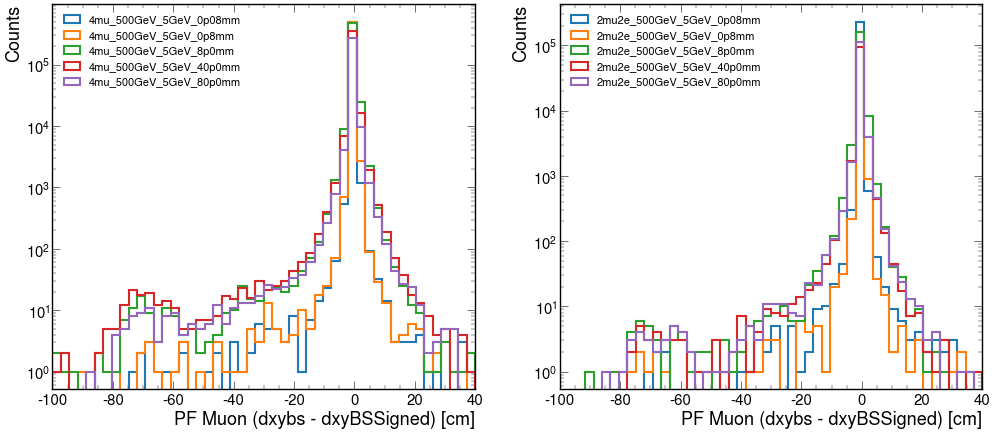

In [13]:
plt.style.use(hep.style.CMS)
fig, ax = plt.subplots(1, 2, figsize=(24,10))
for i_2mu, i_4mu in zip(samples_2mu2e,samples_4mu):
    structure("dxybs - dxyBSSigned", events_4mu[i_4mu].dxybs - events_4mu[i_4mu].dxyBSSigned, events_2mu2e[i_2mu].dxybs - events_2mu2e[i_2mu].dxyBSSigned)
    ax[0].hist(ak.flatten(events_4mu[i_4mu].dxybs - events_4mu[i_4mu].dxyBSSigned), range=(-100,40), alpha=1, bins=50, histtype='step', linewidth=3, label=i_4mu)
    ax[1].hist(ak.flatten(events_2mu2e[i_2mu].dxybs - events_2mu2e[i_2mu].dxyBSSigned), range=(-100,40), alpha=1, bins=50, histtype='step', linewidth=3, label=i_2mu)
    
ax[0].set_xlim(-100,40)
ax[1].set_xlim(-100,40)
ax[0].set_xlabel('PF Muon (dxybs - dxyBSSigned) [cm]')
ax[1].set_xlabel('PF Muon (dxybs - dxyBSSigned) [cm]')
ax[0].set_ylabel('Counts')
ax[1].set_ylabel('Counts')
ax[0].legend(fontsize=16)
ax[1].legend(fontsize=16)
ax[0].set_yscale("log")
ax[1].set_yscale("log")
plt.savefig("../Plots/V2/PF_MUON/Displacement/dxybs-dxyBSSigned.png", bbox_inches="tight")

4mu dxybs - dxyBSSigned structure: [[0.000971, -0.00226, -1.27e-05, 0.0129], ... [-0.00264, 0.00187, -0.004, -3.25e-05]]
2mu2e dxybs - dxyBSSigned structure: [[0.011, -0.0292], [-0.000915, 0.0489], ... [-0.0142, 0.0112], [-0.000156, 0.117]]
4mu dxybs - dxyBSSigned structure: [[-0.000325, -0.000525, -0.00354, 0.0195], ... [2.5e-06, -3.82e-05, -3.8e-06, 1.19]]
2mu2e dxybs - dxyBSSigned structure: [[-2.8e-05, -0.000302], [0.0561, -2.35, ... -9.53e-05], [0.0289, -1.77e-05]]
4mu dxybs - dxyBSSigned structure: [[-0.0641, -3.88e-05, 3.56e-05, -0.0834, ... -0.000208, -0.0228, 0.246, 0.424]]
2mu2e dxybs - dxyBSSigned structure: [[-0.105, 0.123], [0.205, -0.00999], ... [-0.00135, -6.63e-05], [0.0911, -6.52e-05]]
4mu dxybs - dxyBSSigned structure: [[4.4e-06, -6.19e-05, -6.03e-07, -1.82], ... [-0.0499, 2.24e-05, -6.83e-05]]
2mu2e dxybs - dxyBSSigned structure: [[-0.00125, -0.000129], [0.0535, -1.2], ... [-2.73e-06, 0.0915], [-9.89e-05, -2.53]]
4mu dxybs - dxyBSSigned structure: [[-0.145, -0.0039, 

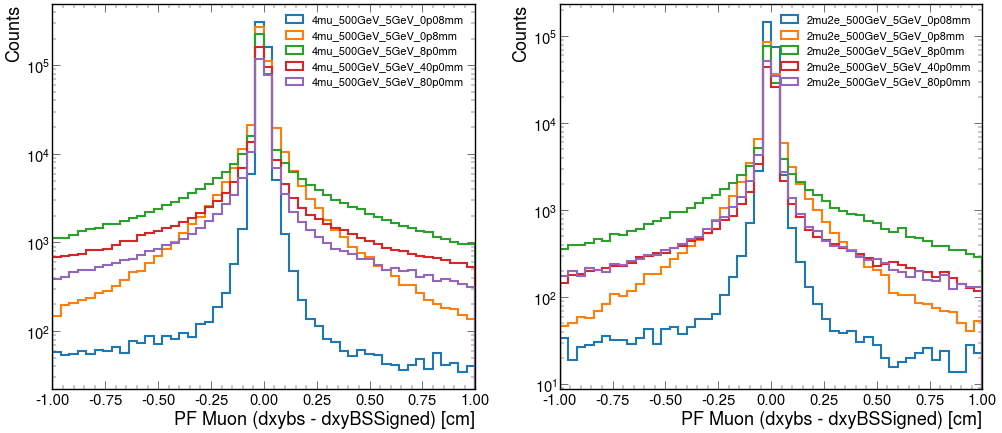

In [8]:
plt.style.use(hep.style.CMS)
fig, ax = plt.subplots(1, 2, figsize=(24,10))
for i_2mu, i_4mu in zip(samples_2mu2e,samples_4mu):
    structure("dxybs - dxyBSSigned", events_4mu[i_4mu].dxybs - events_4mu[i_4mu].dxyBSSigned, events_2mu2e[i_2mu].dxybs - events_2mu2e[i_2mu].dxyBSSigned)
    ax[0].hist(ak.flatten(events_4mu[i_4mu].dxybs - events_4mu[i_4mu].dxyBSSigned), range=(-1,1), alpha=1, bins=50, histtype='step', linewidth=3, label=i_4mu)
    ax[1].hist(ak.flatten(events_2mu2e[i_2mu].dxybs - events_2mu2e[i_2mu].dxyBSSigned), range=(-1,1), alpha=1, bins=50, histtype='step', linewidth=3, label=i_2mu)
    
ax[0].set_xlim(-1,1)
ax[1].set_xlim(-1,1)
ax[0].set_xlabel('PF Muon (dxybs - dxyBSSigned) [cm]')
ax[1].set_xlabel('PF Muon (dxybs - dxyBSSigned) [cm]')
ax[0].set_ylabel('Counts')
ax[1].set_ylabel('Counts')
ax[0].legend(fontsize=16)
ax[1].legend(fontsize=16)
ax[0].set_yscale("log")
ax[1].set_yscale("log")
plt.savefig("../Plots/V2/PF_MUON/Displacement/dxybs-dxyBSSigned_low.png", bbox_inches="tight")

## dxyBS - dxyBSSigned

4mu dxyBS - dxyBSSigned structure: [[0.000814, -0.00251, 6.98e-10, 0.0129], ... -0.000832, 0.00179, -0.00398, 6.98e-10]]
2mu2e dxyBS - dxyBSSigned structure: [[0.0109, -0.0292], [-0.000917, 0.0488], ... [-0.0143, 0.0112], [-1.86e-09, 0.117]]
4mu dxyBS - dxyBSSigned structure: [[-2.56e-09, 0, 0, 0.0194], ... [9.31e-10, -2.79e-09, -9.31e-10, 0.939]]
2mu2e dxyBS - dxyBSSigned structure: [[1.86e-09, 0], [0.0548, -2.35], ... [-0.00414, -0.00123, 1.86e-09], [0.0287, 0]]
4mu dxyBS - dxyBSSigned structure: [[-0.0641, 0, 7.45e-09, -0.0834, 0.0331], ... [-1.29, -3.73e-09, 0, 0.0112, 0.424]]
2mu2e dxyBS - dxyBSSigned structure: [[-0.105, 0.123], [0.206, 7.45e-09], ... [2.98e-08, 2.98e-08], [-1.4e-09, 0]]
4mu dxyBS - dxyBSSigned structure: [[3.73e-09, 0, 2.79e-09, -1.84], ... 1.86e-09], [-0.0499, 9.31e-10, 3.07e-08]]
2mu2e dxyBS - dxyBSSigned structure: [[0, 0], [0.0535, -1.2], [1.98], ... [-0.0123], [-2.79e-09, 0.0915], [0, -2.58]]
4mu dxyBS - dxyBSSigned structure: [[-0.145, -0.00389, 0], [], [-

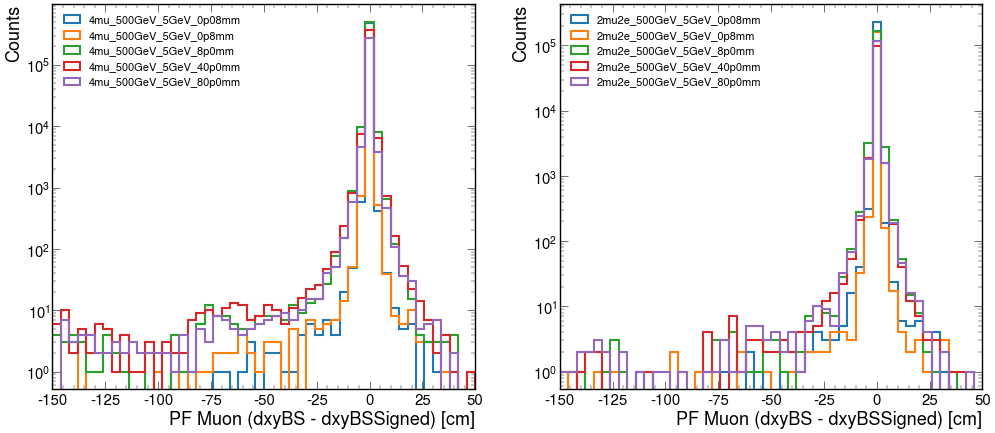

In [7]:
plt.style.use(hep.style.CMS)
fig, ax = plt.subplots(1, 2, figsize=(24,10))
for i_2mu, i_4mu in zip(samples_2mu2e,samples_4mu):
    structure("dxyBS - dxyBSSigned", events_4mu[i_4mu].dxyBS - events_4mu[i_4mu].dxyBSSigned, events_2mu2e[i_2mu].dxyBS - events_2mu2e[i_2mu].dxyBSSigned)
    ax[0].hist(ak.flatten(events_4mu[i_4mu].dxyBS - events_4mu[i_4mu].dxyBSSigned), range=(-150,50), alpha=1, bins=50, histtype='step', linewidth=3, label=i_4mu)
    ax[1].hist(ak.flatten(events_2mu2e[i_2mu].dxyBS - events_2mu2e[i_2mu].dxyBSSigned), range=(-150,50), alpha=1, bins=50, histtype='step', linewidth=3, label=i_2mu)
    
ax[0].set_xlim(-150,50)
ax[1].set_xlim(-150,50)
ax[0].set_xlabel('PF Muon (dxyBS - dxyBSSigned) [cm]')
ax[1].set_xlabel('PF Muon (dxyBS - dxyBSSigned) [cm]')
ax[0].set_ylabel('Counts')
ax[1].set_ylabel('Counts')
ax[0].legend(fontsize=16)
ax[1].legend(fontsize=16)
ax[0].set_yscale("log")
ax[1].set_yscale("log")
plt.savefig("../Plots/V2/PF_MUON/Displacement/dxyBS-dxyBSSigned.png", bbox_inches="tight")

4mu dxyBS - dxyBSSigned structure: [[0.000814, -0.00251, 6.98e-10, 0.0129], ... -0.000832, 0.00179, -0.00398, 6.98e-10]]
2mu2e dxyBS - dxyBSSigned structure: [[0.0109, -0.0292], [-0.000917, 0.0488], ... [-0.0143, 0.0112], [-1.86e-09, 0.117]]
4mu dxyBS - dxyBSSigned structure: [[-2.56e-09, 0, 0, 0.0194], ... [9.31e-10, -2.79e-09, -9.31e-10, 0.939]]
2mu2e dxyBS - dxyBSSigned structure: [[1.86e-09, 0], [0.0548, -2.35], ... [-0.00414, -0.00123, 1.86e-09], [0.0287, 0]]
4mu dxyBS - dxyBSSigned structure: [[-0.0641, 0, 7.45e-09, -0.0834, 0.0331], ... [-1.29, -3.73e-09, 0, 0.0112, 0.424]]
2mu2e dxyBS - dxyBSSigned structure: [[-0.105, 0.123], [0.206, 7.45e-09], ... [2.98e-08, 2.98e-08], [-1.4e-09, 0]]
4mu dxyBS - dxyBSSigned structure: [[3.73e-09, 0, 2.79e-09, -1.84], ... 1.86e-09], [-0.0499, 9.31e-10, 3.07e-08]]
2mu2e dxyBS - dxyBSSigned structure: [[0, 0], [0.0535, -1.2], [1.98], ... [-0.0123], [-2.79e-09, 0.0915], [0, -2.58]]
4mu dxyBS - dxyBSSigned structure: [[-0.145, -0.00389, 0], [], [-

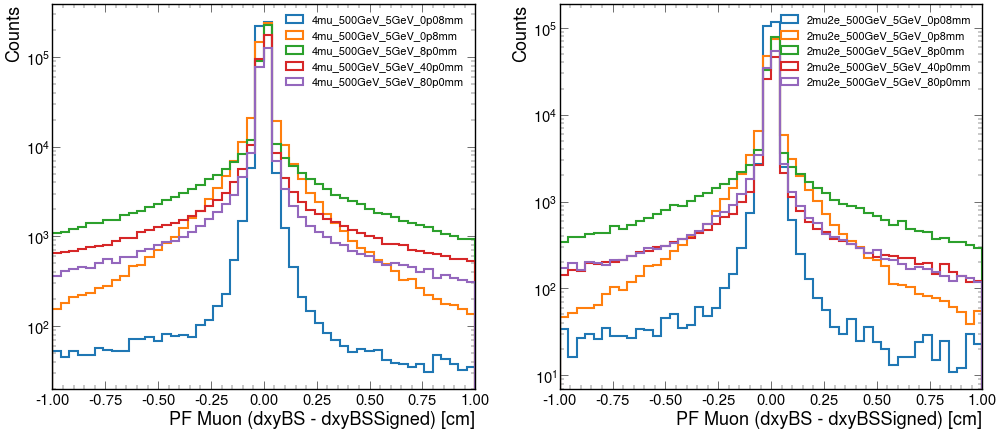

In [5]:
plt.style.use(hep.style.CMS)
fig, ax = plt.subplots(1, 2, figsize=(24,10))
for i_2mu, i_4mu in zip(samples_2mu2e,samples_4mu):
    structure("dxyBS - dxyBSSigned", events_4mu[i_4mu].dxyBS - events_4mu[i_4mu].dxyBSSigned, events_2mu2e[i_2mu].dxyBS - events_2mu2e[i_2mu].dxyBSSigned)
    ax[0].hist(ak.flatten(events_4mu[i_4mu].dxyBS - events_4mu[i_4mu].dxyBSSigned), range=(-1,1), alpha=1, bins=50, histtype='step', linewidth=3, label=i_4mu)
    ax[1].hist(ak.flatten(events_2mu2e[i_2mu].dxyBS - events_2mu2e[i_2mu].dxyBSSigned), range=(-1,1), alpha=1, bins=50, histtype='step', linewidth=3, label=i_2mu)
    
ax[0].set_xlim(-1,1)
ax[1].set_xlim(-1,1)
ax[0].set_xlabel('PF Muon (dxyBS - dxyBSSigned) [cm]')
ax[1].set_xlabel('PF Muon (dxyBS - dxyBSSigned) [cm]')
ax[0].set_ylabel('Counts')
ax[1].set_ylabel('Counts')
ax[0].legend(fontsize=16)
ax[1].legend(fontsize=16)
ax[0].set_yscale("log")
ax[1].set_yscale("log")
plt.savefig("../Plots/V2/PF_MUON/Displacement/dxyBS-dxyBSSigned_low.png", bbox_inches="tight")

## dz

4mu dz structure: [[0.00124, -0.00228, -0.00288, 0.0148], ... [-0.00185, 0.00179, -0.00236, -0.00816]]
2mu2e dz structure: [[0.00723, -0.00673], [-0.000697, -0.0307, ... -0.00912], [-0.000112, -0.0192]]
4mu dz structure: [[-0.00115, 0.0801, 3.9, 0.0142], ... [-0.0518, -0.00167, -0.00824, 2.33]]
2mu2e dz structure: [[-0.00287, 0.00767], [-0.0046, 0.311], ... 0.00249, -1.53], [-0.0168, 0.029]]
4mu dz structure: [[-0.0778, 12.3, 0.204, 3.61, -0.542], ... [13.1, 0.0079, 5.21, -12.9, -1.54]]
2mu2e dz structure: [[5.51, 5.61], [0.561, -0.562], [6.69, ... 0.812], [-6.64, -4.46], [0.281, -0.312]]
4mu dz structure: [[-2.09, -0.14, -5.46, 1.34], [-2.87, ... -7.28, 0.00222], [-6.16, -2.74, 2.84]]
2mu2e dz structure: [[0.6, -0.0145], [0.0174, -0.255], [1.49, ... [-0.717, -0.562], [0.445, 8.59]]
4mu dz structure: [[0.291, 5.13, -6.42], [], [3.98, 7.81, ... [-3.28, -7.32, -8.47], [-1.71, -3.15]]
2mu2e dz structure: [[-0.0928, -2.4, -2.7], [-1.58], [4.27, ... -5.49, -0.0014], [-4.23, -5.14], []]


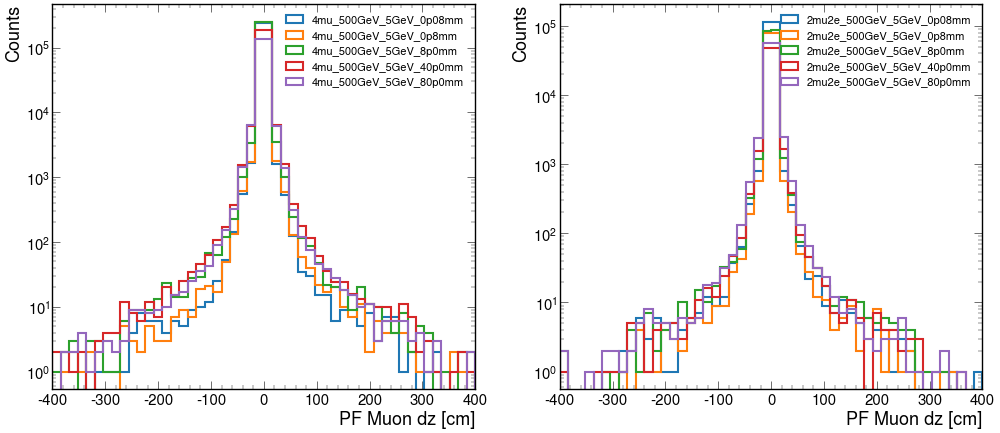

In [12]:
plt.style.use(hep.style.CMS)
fig, ax = plt.subplots(1, 2, figsize=(24,10))
for i_2mu, i_4mu in zip(samples_2mu2e,samples_4mu):
    structure("dz", events_4mu[i_4mu].dz, events_2mu2e[i_2mu].dz)
    ax[0].hist(ak.flatten(events_4mu[i_4mu].dz), range=(-400,400), alpha=1, bins=50, histtype='step', linewidth=3, label=i_4mu)
    ax[1].hist(ak.flatten(events_2mu2e[i_2mu].dz), range=(-400,400), alpha=1, bins=50, histtype='step', linewidth=3, label=i_2mu)
    
ax[0].set_xlim(-400,400)
ax[1].set_xlim(-400,400)
ax[0].set_xlabel('PF Muon dz [cm]')
ax[1].set_xlabel('PF Muon dz [cm]')
ax[0].set_ylabel('Counts')
ax[1].set_ylabel('Counts')
ax[0].legend(fontsize=16)
ax[1].legend(fontsize=16)
ax[0].set_yscale("log")
ax[1].set_yscale("log")
plt.savefig("../Plots/V2/PF_MUON/Displacement/dz.png", bbox_inches="tight")

4mu dz structure: [[0.00124, -0.00228, -0.00288, 0.0148], ... [-0.00185, 0.00179, -0.00236, -0.00816]]
2mu2e dz structure: [[0.00723, -0.00673], [-0.000697, -0.0307, ... -0.00912], [-0.000112, -0.0192]]
4mu dz structure: [[-0.00115, 0.0801, 3.9, 0.0142], ... [-0.0518, -0.00167, -0.00824, 2.33]]
2mu2e dz structure: [[-0.00287, 0.00767], [-0.0046, 0.311], ... 0.00249, -1.53], [-0.0168, 0.029]]
4mu dz structure: [[-0.0778, 12.3, 0.204, 3.61, -0.542], ... [13.1, 0.0079, 5.21, -12.9, -1.54]]
2mu2e dz structure: [[5.51, 5.61], [0.561, -0.562], [6.69, ... 0.812], [-6.64, -4.46], [0.281, -0.312]]
4mu dz structure: [[-2.09, -0.14, -5.46, 1.34], [-2.87, ... -7.28, 0.00222], [-6.16, -2.74, 2.84]]
2mu2e dz structure: [[0.6, -0.0145], [0.0174, -0.255], [1.49, ... [-0.717, -0.562], [0.445, 8.59]]
4mu dz structure: [[0.291, 5.13, -6.42], [], [3.98, 7.81, ... [-3.28, -7.32, -8.47], [-1.71, -3.15]]
2mu2e dz structure: [[-0.0928, -2.4, -2.7], [-1.58], [4.27, ... -5.49, -0.0014], [-4.23, -5.14], []]


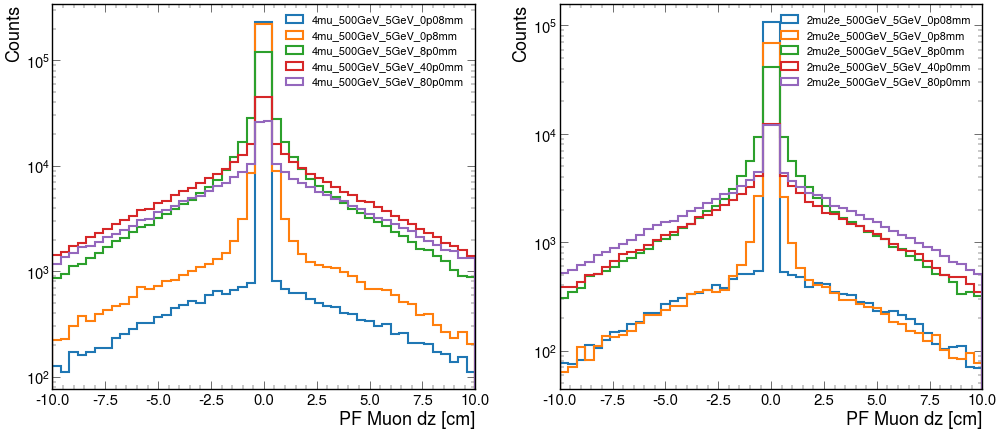

In [7]:
plt.style.use(hep.style.CMS)
fig, ax = plt.subplots(1, 2, figsize=(24,10))
for i_2mu, i_4mu in zip(samples_2mu2e,samples_4mu):
    structure("dz", events_4mu[i_4mu].dz, events_2mu2e[i_2mu].dz)
    ax[0].hist(ak.flatten(events_4mu[i_4mu].dz), range=(-10,10), alpha=1, bins=50, histtype='step', linewidth=3, label=i_4mu)
    ax[1].hist(ak.flatten(events_2mu2e[i_2mu].dz), range=(-10,10), alpha=1, bins=50, histtype='step', linewidth=3, label=i_2mu)
    
ax[0].set_xlim(-10,10)
ax[1].set_xlim(-10,10)
ax[0].set_xlabel('PF Muon dz [cm]')
ax[1].set_xlabel('PF Muon dz [cm]')
ax[0].set_ylabel('Counts')
ax[1].set_ylabel('Counts')
ax[0].legend(fontsize=16)
ax[1].legend(fontsize=16)
ax[0].set_yscale("log")
ax[1].set_yscale("log")
plt.savefig("../Plots/V2/PF_MUON/Displacement/dz_low.png", bbox_inches="tight")

## dzErr

4mu dzErr structure: [[0.00253, 0.00256, 0.0025, 0.00235], ... [0.00388, 0.00336, 0.00366, 0.00244]]
2mu2e dzErr structure: [[0.00629, 0.00854], [0.00244, 0.00296], ... [0.00327, 0.0032], [0.0036, 0.00391]]
4mu dzErr structure: [[0.00302, 0.00403, 0.469, 0.00327], ... [0.00739, 0.00452, 0.00464, 0.0193]]
2mu2e dzErr structure: [[0.00397, 0.00381], [0.00439, 0.0072], ... 0.00336, 0.00952], [0.00763, 0.00879]]
4mu dzErr structure: [[0.00427, 0.0117, 0.0061, 3.59, 0.0116], ... [0.461, 0.02, 5.88, 0.0425, 0.02]]
2mu2e dzErr structure: [[0.00323, 0.00385], [0.0771, 0.0781], ... [0.189, 0.0237], [0.0105, 0.0101]]
4mu dzErr structure: [[0.852, 0.0312, 0.984, 0.176], [4.12, 0.41, ... 3, 0.00336], [4.12, 4.25, 4.06]]
2mu2e dzErr structure: [[0.0508, 0.00903], [0.00519, 0.00623], ... [0.00378, 0.00415], [0.0488, 0.531]]
4mu dzErr structure: [[1.05, 4.56, 0.0131], [], [2.53, 0.5, 0.523, ... [4.19, 3.41, 4.5], [1.91, 3.03]]
2mu2e dzErr structure: [[0.898, 0.516, 4.56], [2.47], [0.24, ... 0.27, 0.0

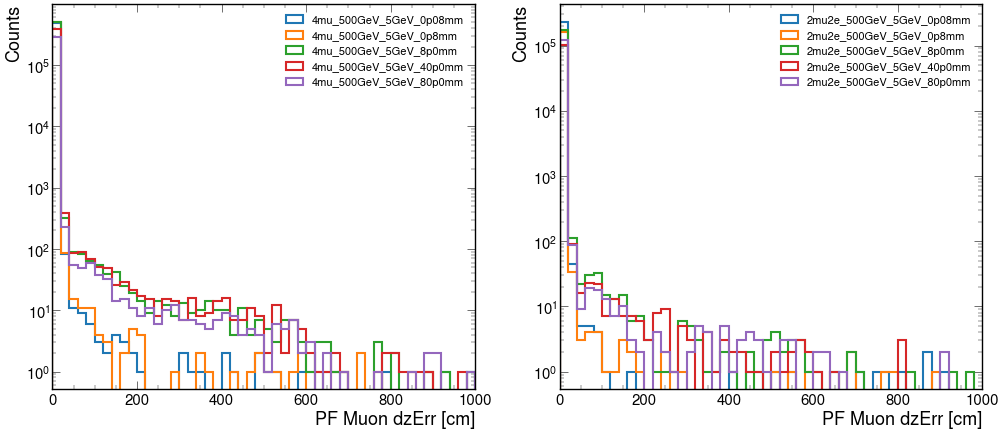

In [8]:
plt.style.use(hep.style.CMS)
fig, ax = plt.subplots(1, 2, figsize=(24,10))
for i_2mu, i_4mu in zip(samples_2mu2e,samples_4mu):
    structure("dzErr", events_4mu[i_4mu].dzErr, events_2mu2e[i_2mu].dzErr)
    ax[0].hist(ak.flatten(events_4mu[i_4mu].dzErr), range=(0,1000), alpha=1, bins=50, histtype='step', linewidth=3, label=i_4mu)
    ax[1].hist(ak.flatten(events_2mu2e[i_2mu].dzErr), range=(0,1000), alpha=1, bins=50, histtype='step', linewidth=3, label=i_2mu)
    
ax[0].set_xlim(0,1000)
ax[1].set_xlim(0,1000)
ax[0].set_xlabel('PF Muon dzErr [cm]')
ax[1].set_xlabel('PF Muon dzErr [cm]')
ax[0].set_ylabel('Counts')
ax[1].set_ylabel('Counts')
ax[0].legend(fontsize=16)
ax[1].legend(fontsize=16)
ax[0].set_yscale("log")
ax[1].set_yscale("log")
plt.savefig("../Plots/V2/PF_MUON/Displacement/dzErr.png", bbox_inches="tight")

4mu dzErr structure: [[0.00253, 0.00256, 0.0025, 0.00235], ... [0.00388, 0.00336, 0.00366, 0.00244]]
2mu2e dzErr structure: [[0.00629, 0.00854], [0.00244, 0.00296], ... [0.00327, 0.0032], [0.0036, 0.00391]]
4mu dzErr structure: [[0.00302, 0.00403, 0.469, 0.00327], ... [0.00739, 0.00452, 0.00464, 0.0193]]
2mu2e dzErr structure: [[0.00397, 0.00381], [0.00439, 0.0072], ... 0.00336, 0.00952], [0.00763, 0.00879]]
4mu dzErr structure: [[0.00427, 0.0117, 0.0061, 3.59, 0.0116], ... [0.461, 0.02, 5.88, 0.0425, 0.02]]
2mu2e dzErr structure: [[0.00323, 0.00385], [0.0771, 0.0781], ... [0.189, 0.0237], [0.0105, 0.0101]]
4mu dzErr structure: [[0.852, 0.0312, 0.984, 0.176], [4.12, 0.41, ... 3, 0.00336], [4.12, 4.25, 4.06]]
2mu2e dzErr structure: [[0.0508, 0.00903], [0.00519, 0.00623], ... [0.00378, 0.00415], [0.0488, 0.531]]
4mu dzErr structure: [[1.05, 4.56, 0.0131], [], [2.53, 0.5, 0.523, ... [4.19, 3.41, 4.5], [1.91, 3.03]]
2mu2e dzErr structure: [[0.898, 0.516, 4.56], [2.47], [0.24, ... 0.27, 0.0

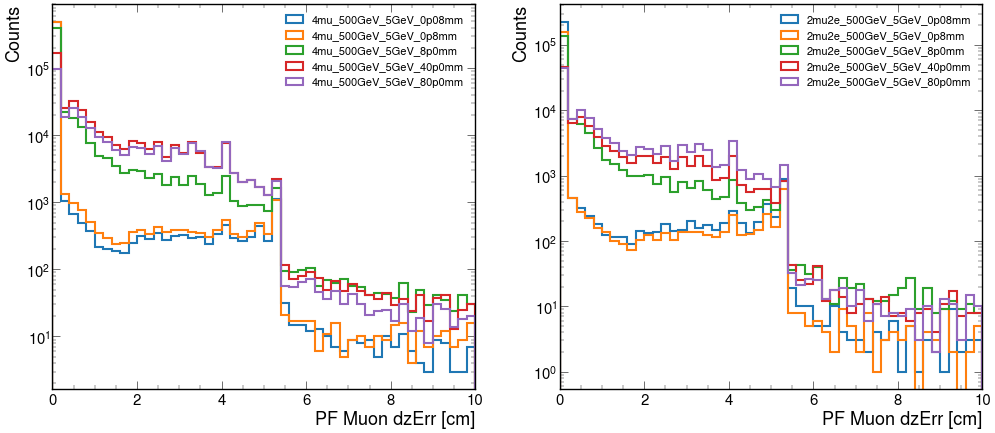

In [6]:
plt.style.use(hep.style.CMS)
fig, ax = plt.subplots(1, 2, figsize=(24,10))
for i_2mu, i_4mu in zip(samples_2mu2e,samples_4mu):
    structure("dzErr", events_4mu[i_4mu].dzErr, events_2mu2e[i_2mu].dzErr)
    ax[0].hist(ak.flatten(events_4mu[i_4mu].dzErr), range=(0,10), alpha=1, bins=50, histtype='step', linewidth=3, label=i_4mu)
    ax[1].hist(ak.flatten(events_2mu2e[i_2mu].dzErr), range=(0,10), alpha=1, bins=50, histtype='step', linewidth=3, label=i_2mu)
    
ax[0].set_xlim(0,10)
ax[1].set_xlim(0,10)
ax[0].set_xlabel('PF Muon dzErr [cm]')
ax[1].set_xlabel('PF Muon dzErr [cm]')
ax[0].set_ylabel('Counts')
ax[1].set_ylabel('Counts')
ax[0].legend(fontsize=16)
ax[1].legend(fontsize=16)
ax[0].set_yscale("log")
ax[1].set_yscale("log")
plt.savefig("../Plots/V2/PF_MUON/Displacement/dzErr_low.png", bbox_inches="tight")

4mu dzErr structure: [[0.00253, 0.00256, 0.0025, 0.00235], ... [0.00388, 0.00336, 0.00366, 0.00244]]
2mu2e dzErr structure: [[0.00629, 0.00854], [0.00244, 0.00296], ... [0.00327, 0.0032], [0.0036, 0.00391]]
4mu dzErr structure: [[0.00302, 0.00403, 0.469, 0.00327], ... [0.00739, 0.00452, 0.00464, 0.0193]]
2mu2e dzErr structure: [[0.00397, 0.00381], [0.00439, 0.0072], ... 0.00336, 0.00952], [0.00763, 0.00879]]
4mu dzErr structure: [[0.00427, 0.0117, 0.0061, 3.59, 0.0116], ... [0.461, 0.02, 5.88, 0.0425, 0.02]]
2mu2e dzErr structure: [[0.00323, 0.00385], [0.0771, 0.0781], ... [0.189, 0.0237], [0.0105, 0.0101]]
4mu dzErr structure: [[0.852, 0.0312, 0.984, 0.176], [4.12, 0.41, ... 3, 0.00336], [4.12, 4.25, 4.06]]
2mu2e dzErr structure: [[0.0508, 0.00903], [0.00519, 0.00623], ... [0.00378, 0.00415], [0.0488, 0.531]]
4mu dzErr structure: [[1.05, 4.56, 0.0131], [], [2.53, 0.5, 0.523, ... [4.19, 3.41, 4.5], [1.91, 3.03]]
2mu2e dzErr structure: [[0.898, 0.516, 4.56], [2.47], [0.24, ... 0.27, 0.0

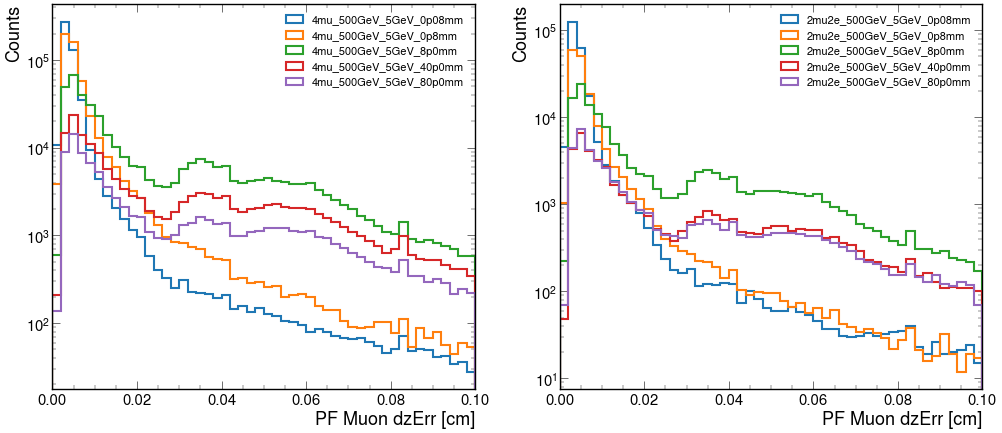

In [9]:
plt.style.use(hep.style.CMS)
fig, ax = plt.subplots(1, 2, figsize=(24,10))
for i_2mu, i_4mu in zip(samples_2mu2e,samples_4mu):
    structure("dzErr", events_4mu[i_4mu].dzErr, events_2mu2e[i_2mu].dzErr)
    ax[0].hist(ak.flatten(events_4mu[i_4mu].dzErr), range=(0,0.1), alpha=1, bins=50, histtype='step', linewidth=3, label=i_4mu)
    ax[1].hist(ak.flatten(events_2mu2e[i_2mu].dzErr), range=(0,0.1), alpha=1, bins=50, histtype='step', linewidth=3, label=i_2mu)
    
ax[0].set_xlim(0,0.1)
ax[1].set_xlim(0,0.1)
ax[0].set_xlabel('PF Muon dzErr [cm]')
ax[1].set_xlabel('PF Muon dzErr [cm]')
ax[0].set_ylabel('Counts')
ax[1].set_ylabel('Counts')
ax[0].legend(fontsize=16)
ax[1].legend(fontsize=16)
ax[0].set_yscale("log")
ax[1].set_yscale("log")
plt.savefig("../Plots/V2/PF_MUON/Displacement/dzErr_superlow.png", bbox_inches="tight")

## dzPV

4mu dzPV structure: [[0.00208, -0.00207, -0.00288, 0.0148], ... [2.49, 0.00144, -0.00235, -0.00821]]
2mu2e dzPV structure: [[0.00669, -0.0069], [-0.000697, -0.0307, ... -0.00937], [-0.00067, -0.0192]]
4mu dzPV structure: [[-0.000751, 0.0798, 1.88, 0.0142], ... [-0.0518, -0.00198, -0.00824, 2.38]]
2mu2e dzPV structure: [[-0.00287, 0.00718], [0.0571, 0.311], ... 0.00189, -1.53], [-0.0159, 0.0284]]
4mu dzPV structure: [[-0.0779, 12.3, 0.204, 3.61, -0.542], ... [13.1, 0.00727, 0.76, -7.96, -1.53]]
2mu2e dzPV structure: [[5.51, 5.61], [0.534, -0.517], [6.59, ... 0.753], [-6.67, -4.46], [0.0961, -0.305]]
4mu dzPV structure: [[-2.09, -0.14, -5.46, 1.36], [-2.87, ... -7.28, 0.00238], [-6.16, -2.74, 2.84]]
2mu2e dzPV structure: [[0.582, -0.0133], [0.0161, -0.255], ... [-0.717, -0.561], [0.445, -0.311]]
4mu dzPV structure: [[0.291, 5.13, -6.42], [], [3.98, 7.81, ... [-3.28, -7.32, -8.47], [-1.71, -3.15]]
2mu2e dzPV structure: [[-0.0928, -1.94, -2.7], [-1.58], [4.27, ... -5.49, -0.00149], [-3.96,

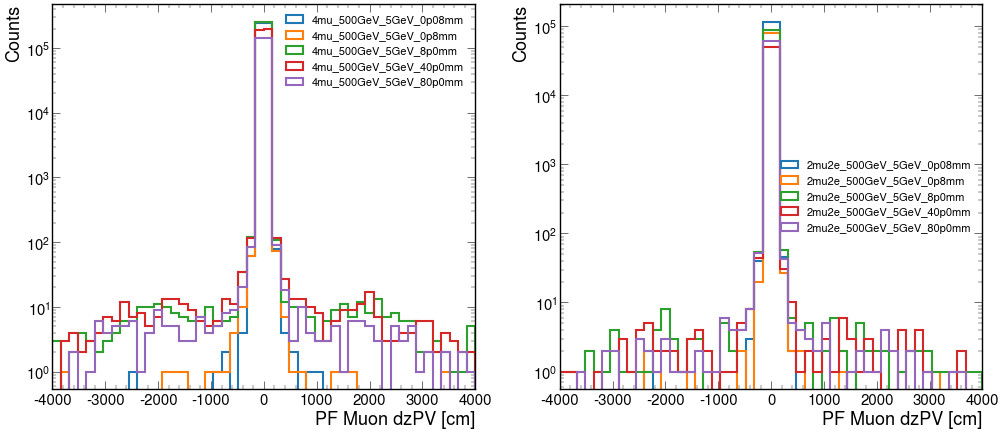

In [10]:
plt.style.use(hep.style.CMS)
fig, ax = plt.subplots(1, 2, figsize=(24,10))
for i_2mu, i_4mu in zip(samples_2mu2e,samples_4mu):
    structure("dzPV", events_4mu[i_4mu].dzPV, events_2mu2e[i_2mu].dzPV)
    ax[0].hist(ak.flatten(events_4mu[i_4mu].dzPV), range=(-4000,4000), alpha=1, bins=50, histtype='step', linewidth=3, label=i_4mu)
    ax[1].hist(ak.flatten(events_2mu2e[i_2mu].dzPV), range=(-4000,4000), alpha=1, bins=50, histtype='step', linewidth=3, label=i_2mu)
    
ax[0].set_xlim(-4000,4000)
ax[1].set_xlim(-4000,4000)
ax[0].set_xlabel('PF Muon dzPV [cm]')
ax[1].set_xlabel('PF Muon dzPV [cm]')
ax[0].set_ylabel('Counts')
ax[1].set_ylabel('Counts')
ax[0].legend(fontsize=16)
ax[1].legend(fontsize=16)
ax[0].set_yscale("log")
ax[1].set_yscale("log")
plt.savefig("../Plots/V2/PF_MUON/Displacement/dzPV.png", bbox_inches="tight")

4mu dzPV structure: [[0.00208, -0.00207, -0.00288, 0.0148], ... [2.49, 0.00144, -0.00235, -0.00821]]
2mu2e dzPV structure: [[0.00669, -0.0069], [-0.000697, -0.0307, ... -0.00937], [-0.00067, -0.0192]]
4mu dzPV structure: [[-0.000751, 0.0798, 1.88, 0.0142], ... [-0.0518, -0.00198, -0.00824, 2.38]]
2mu2e dzPV structure: [[-0.00287, 0.00718], [0.0571, 0.311], ... 0.00189, -1.53], [-0.0159, 0.0284]]
4mu dzPV structure: [[-0.0779, 12.3, 0.204, 3.61, -0.542], ... [13.1, 0.00727, 0.76, -7.96, -1.53]]
2mu2e dzPV structure: [[5.51, 5.61], [0.534, -0.517], [6.59, ... 0.753], [-6.67, -4.46], [0.0961, -0.305]]
4mu dzPV structure: [[-2.09, -0.14, -5.46, 1.36], [-2.87, ... -7.28, 0.00238], [-6.16, -2.74, 2.84]]
2mu2e dzPV structure: [[0.582, -0.0133], [0.0161, -0.255], ... [-0.717, -0.561], [0.445, -0.311]]
4mu dzPV structure: [[0.291, 5.13, -6.42], [], [3.98, 7.81, ... [-3.28, -7.32, -8.47], [-1.71, -3.15]]
2mu2e dzPV structure: [[-0.0928, -1.94, -2.7], [-1.58], [4.27, ... -5.49, -0.00149], [-3.96,

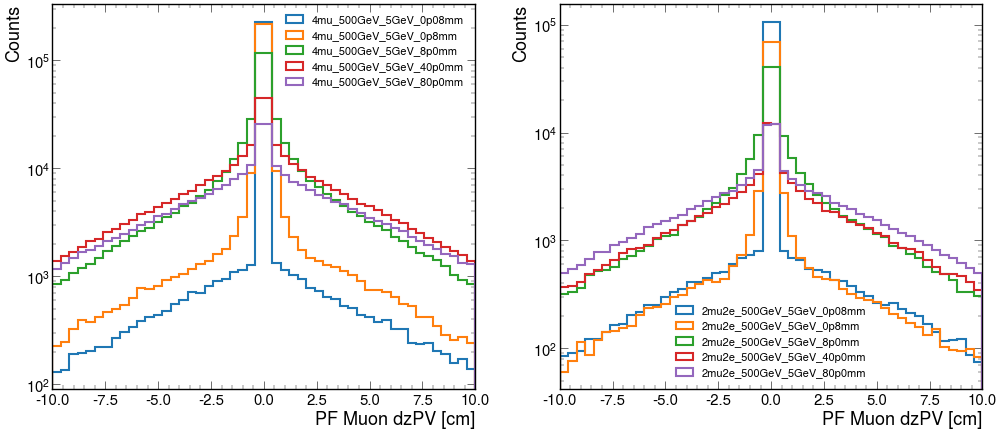

In [12]:
plt.style.use(hep.style.CMS)
fig, ax = plt.subplots(1, 2, figsize=(24,10))
for i_2mu, i_4mu in zip(samples_2mu2e,samples_4mu):
    structure("dzPV", events_4mu[i_4mu].dzPV, events_2mu2e[i_2mu].dzPV)
    ax[0].hist(ak.flatten(events_4mu[i_4mu].dzPV), range=(-10,10), alpha=1, bins=50, histtype='step', linewidth=3, label=i_4mu)
    ax[1].hist(ak.flatten(events_2mu2e[i_2mu].dzPV), range=(-10,10), alpha=1, bins=50, histtype='step', linewidth=3, label=i_2mu)
    
ax[0].set_xlim(-10,10)
ax[1].set_xlim(-10,10)
ax[0].set_xlabel('PF Muon dzPV [cm]')
ax[1].set_xlabel('PF Muon dzPV [cm]')
ax[0].set_ylabel('Counts')
ax[1].set_ylabel('Counts')
ax[0].legend(fontsize=16)
ax[1].legend(fontsize=16)
ax[0].set_yscale("log")
ax[1].set_yscale("log")
plt.savefig("../Plots/V2/PF_MUON/Displacement/dzPV_low.png", bbox_inches="tight")

## dz - dzPV

4mu dz - dzPV structure: [[-0.000837, -0.000215, -1.27e-07, -2.12e-06, ... 0.000352, -7.33e-07, 5.72e-05]]
2mu2e dz - dzPV structure: [[0.000532, 0.000172], [6.86e-07, -3.98e-06, ... 0.000253], [0.000558, -2.34e-05]]
4mu dz - dzPV structure: [[-0.000399, 0.000318, 2.02, 2.28e-06], ... [6.56e-06, 0.000309, -2.51e-06, -0.0525]]
2mu2e dz - dzPV structure: [[-6.05e-07, 0.000489], [-0.0617, -0.000107, ... 0.000248], [-0.000886, 0.00063]]
4mu dz - dzPV structure: [[6.21e-05, -0.00148, -2.39e-05, 2.24e-05, ... 0.000629, 4.45, -4.89, -0.00376]]
2mu2e dz - dzPV structure: [[-0.00257, -0.00186], [0.0268, -0.0449], ... [0.0361, -0.00445], [0.185, -0.00668]]
4mu dz - dzPV structure: [[-0.000495, 2.45e-05, -0.00194, -0.0211], ... [-0.000812, -0.000438, -0.00095]]
2mu2e dz - dzPV structure: [[0.0174, -0.00123], [0.00129, 5.68e-05, ... -0.000189, -7.89e-05], [5.01e-06, 8.91]]
4mu dz - dzPV structure: [[-2.74e-05, 0.000828, 0.000379], [], ... -0.000804, 0.000376], [0.00015, -0.000839]]
2mu2e dz - dzPV

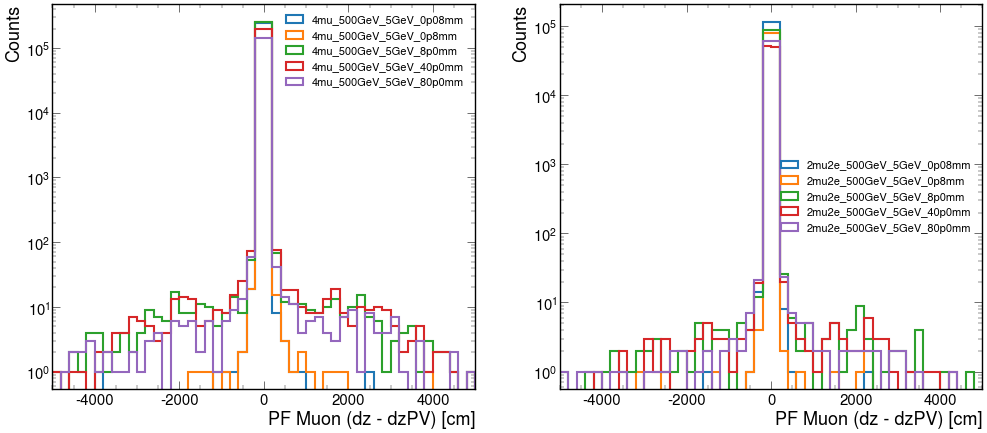

In [6]:
plt.style.use(hep.style.CMS)
fig, ax = plt.subplots(1, 2, figsize=(24,10))
for i_2mu, i_4mu in zip(samples_2mu2e,samples_4mu):
    structure("dz - dzPV", events_4mu[i_4mu].dz - events_4mu[i_4mu].dzPV, events_2mu2e[i_2mu].dz - events_2mu2e[i_2mu].dzPV)
    ax[0].hist(ak.flatten(events_4mu[i_4mu].dz - events_4mu[i_4mu].dzPV), range=(-5000,5000), alpha=1, bins=50, histtype='step', linewidth=3, label=i_4mu)
    ax[1].hist(ak.flatten(events_2mu2e[i_2mu].dz - events_2mu2e[i_2mu].dzPV), range=(-5000,5000), alpha=1, bins=50, histtype='step', linewidth=3, label=i_2mu)
    
ax[0].set_xlim(-5000,5000)
ax[1].set_xlim(-5000,5000)
ax[0].set_xlabel('PF Muon (dz - dzPV) [cm]')
ax[1].set_xlabel('PF Muon (dz - dzPV) [cm]')
ax[0].set_ylabel('Counts')
ax[1].set_ylabel('Counts')
ax[0].legend(fontsize=16)
ax[1].legend(fontsize=16)
ax[0].set_yscale("log")
ax[1].set_yscale("log")
plt.savefig("../Plots/V2/PF_MUON/Displacement/dz-dzPV.png", bbox_inches="tight")

4mu dz - dzPV structure: [[-0.000837, -0.000215, -1.27e-07, -2.12e-06, ... 0.000352, -7.33e-07, 5.72e-05]]
2mu2e dz - dzPV structure: [[0.000532, 0.000172], [6.86e-07, -3.98e-06, ... 0.000253], [0.000558, -2.34e-05]]
4mu dz - dzPV structure: [[-0.000399, 0.000318, 2.02, 2.28e-06], ... [6.56e-06, 0.000309, -2.51e-06, -0.0525]]
2mu2e dz - dzPV structure: [[-6.05e-07, 0.000489], [-0.0617, -0.000107, ... 0.000248], [-0.000886, 0.00063]]
4mu dz - dzPV structure: [[6.21e-05, -0.00148, -2.39e-05, 2.24e-05, ... 0.000629, 4.45, -4.89, -0.00376]]
2mu2e dz - dzPV structure: [[-0.00257, -0.00186], [0.0268, -0.0449], ... [0.0361, -0.00445], [0.185, -0.00668]]
4mu dz - dzPV structure: [[-0.000495, 2.45e-05, -0.00194, -0.0211], ... [-0.000812, -0.000438, -0.00095]]
2mu2e dz - dzPV structure: [[0.0174, -0.00123], [0.00129, 5.68e-05, ... -0.000189, -7.89e-05], [5.01e-06, 8.91]]
4mu dz - dzPV structure: [[-2.74e-05, 0.000828, 0.000379], [], ... -0.000804, 0.000376], [0.00015, -0.000839]]
2mu2e dz - dzPV

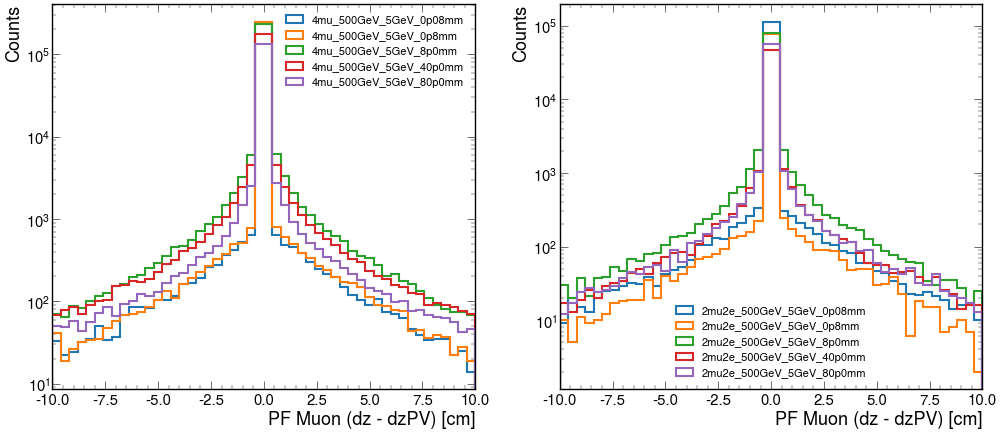

In [7]:
plt.style.use(hep.style.CMS)
fig, ax = plt.subplots(1, 2, figsize=(24,10))
for i_2mu, i_4mu in zip(samples_2mu2e,samples_4mu):
    structure("dz - dzPV", events_4mu[i_4mu].dz - events_4mu[i_4mu].dzPV, events_2mu2e[i_2mu].dz - events_2mu2e[i_2mu].dzPV)
    ax[0].hist(ak.flatten(events_4mu[i_4mu].dz - events_4mu[i_4mu].dzPV), range=(-10,10), alpha=1, bins=50, histtype='step', linewidth=3, label=i_4mu)
    ax[1].hist(ak.flatten(events_2mu2e[i_2mu].dz - events_2mu2e[i_2mu].dzPV), range=(-10,10), alpha=1, bins=50, histtype='step', linewidth=3, label=i_2mu)
    
ax[0].set_xlim(-10,10)
ax[1].set_xlim(-10,10)
ax[0].set_xlabel('PF Muon (dz - dzPV) [cm]')
ax[1].set_xlabel('PF Muon (dz - dzPV) [cm]')
ax[0].set_ylabel('Counts')
ax[1].set_ylabel('Counts')
ax[0].legend(fontsize=16)
ax[1].legend(fontsize=16)
ax[0].set_yscale("log")
ax[1].set_yscale("log")
plt.savefig("../Plots/V2/PF_MUON/Displacement/dz-dzPV_low.png", bbox_inches="tight")

## dzBS

4mu dzBS structure: [[2.63, 2.63, 2.63, 2.65], [0.656, 0.666, ... 4.45, 4.47], [6.26, 3.77, 3.77, 3.76]]
2mu2e dzBS structure: [[2.63, 2.62], [0.655, 0.625], [3.18, ... -0.912], [1.93, 1.93], [-0.623, -0.642]]
4mu dzBS structure: [[2.63, 2.71, 4.51, 2.64], [0.659, 0.643, ... 0.125], [-8.57, -8.52, -8.52, -6.14]]
2mu2e dzBS structure: [[2.63, 2.64], [0.717, 0.971], [3.16, ... [-0.394, -0.386, -1.92], [6.75, 6.79]]
4mu dzBS structure: [[2.55, 15, 2.83, 6.24, 2.09], [0.756, ... -2.71], [17.5, 4.42, 5.18, -3.54, 2.88]]
2mu2e dzBS structure: [[2.59, 2.69], [1.19, 0.141], [3.31, 2.01, ... -2.47], [1.31, 3.53], [-1.48, -1.88]]
4mu dzBS structure: [[0.542, 2.49, -2.83, 3.99], [-3.57, -0.0318, ... -2.3, 4.98], [-1.04, 2.38, 7.96]]
2mu2e dzBS structure: [[2.8, 2.2], [0.673, 0.401], [3.46], ... [-0.0227], [5.66, 5.82], [0.488, -0.268]]
4mu dzBS structure: [[-1.93, 2.91, -8.64], [], [0.951, 4.78, ... [2.41, -1.63, -2.78], [4.93, 3.49]]
2mu2e dzBS structure: [[2.54, 0.689, -0.0672], [0.841], [6.37,

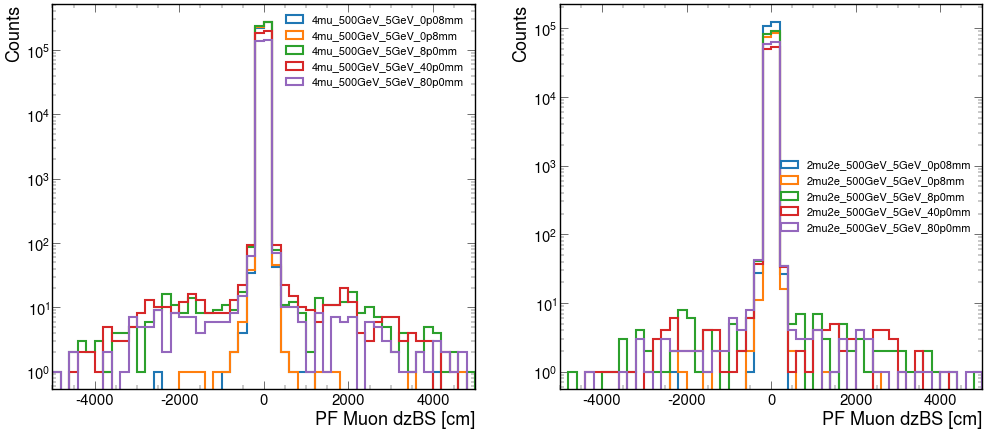

In [13]:
plt.style.use(hep.style.CMS)
fig, ax = plt.subplots(1, 2, figsize=(24,10))
for i_2mu, i_4mu in zip(samples_2mu2e,samples_4mu):
    structure("dzBS", events_4mu[i_4mu].dzBS, events_2mu2e[i_2mu].dzBS)
    ax[0].hist(ak.flatten(events_4mu[i_4mu].dzBS), range=(-5000,5000), alpha=1, bins=50, histtype='step', linewidth=3, label=i_4mu)
    ax[1].hist(ak.flatten(events_2mu2e[i_2mu].dzBS), range=(-5000,5000), alpha=1, bins=50, histtype='step', linewidth=3, label=i_2mu)
    
ax[0].set_xlim(-5000,5000)
ax[1].set_xlim(-5000,5000)
ax[0].set_xlabel('PF Muon dzBS [cm]')
ax[1].set_xlabel('PF Muon dzBS [cm]')
ax[0].set_ylabel('Counts')
ax[1].set_ylabel('Counts')
ax[0].legend(fontsize=16)
ax[1].legend(fontsize=16)
ax[0].set_yscale("log")
ax[1].set_yscale("log")
plt.savefig("../Plots/V2/PF_MUON/Displacement/dzBS.png", bbox_inches="tight")

4mu dzBS structure: [[2.63, 2.63, 2.63, 2.65], [0.656, 0.666, ... 4.45, 4.47], [6.26, 3.77, 3.77, 3.76]]
2mu2e dzBS structure: [[2.63, 2.62], [0.655, 0.625], [3.18, ... -0.912], [1.93, 1.93], [-0.623, -0.642]]
4mu dzBS structure: [[2.63, 2.71, 4.51, 2.64], [0.659, 0.643, ... 0.125], [-8.57, -8.52, -8.52, -6.14]]
2mu2e dzBS structure: [[2.63, 2.64], [0.717, 0.971], [3.16, ... [-0.394, -0.386, -1.92], [6.75, 6.79]]
4mu dzBS structure: [[2.55, 15, 2.83, 6.24, 2.09], [0.756, ... -2.71], [17.5, 4.42, 5.18, -3.54, 2.88]]
2mu2e dzBS structure: [[2.59, 2.69], [1.19, 0.141], [3.31, 2.01, ... -2.47], [1.31, 3.53], [-1.48, -1.88]]
4mu dzBS structure: [[0.542, 2.49, -2.83, 3.99], [-3.57, -0.0318, ... -2.3, 4.98], [-1.04, 2.38, 7.96]]
2mu2e dzBS structure: [[2.8, 2.2], [0.673, 0.401], [3.46], ... [-0.0227], [5.66, 5.82], [0.488, -0.268]]
4mu dzBS structure: [[-1.93, 2.91, -8.64], [], [0.951, 4.78, ... [2.41, -1.63, -2.78], [4.93, 3.49]]
2mu2e dzBS structure: [[2.54, 0.689, -0.0672], [0.841], [6.37,

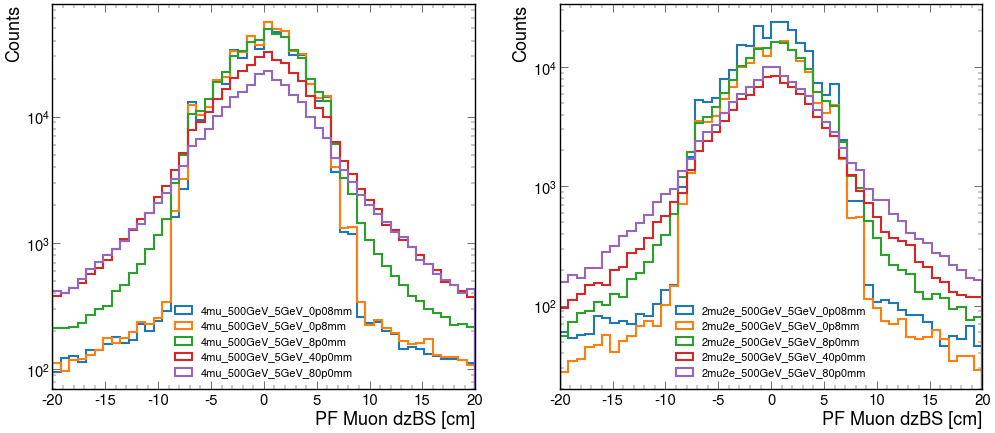

In [8]:
plt.style.use(hep.style.CMS)
fig, ax = plt.subplots(1, 2, figsize=(24,10))
for i_2mu, i_4mu in zip(samples_2mu2e,samples_4mu):
    structure("dzBS", events_4mu[i_4mu].dzBS, events_2mu2e[i_2mu].dzBS)
    ax[0].hist(ak.flatten(events_4mu[i_4mu].dzBS), range=(-20,20), alpha=1, bins=50, histtype='step', linewidth=3, label=i_4mu)
    ax[1].hist(ak.flatten(events_2mu2e[i_2mu].dzBS), range=(-20,20), alpha=1, bins=50, histtype='step', linewidth=3, label=i_2mu)
    
ax[0].set_xlim(-20,20)
ax[1].set_xlim(-20,20)
ax[0].set_xlabel('PF Muon dzBS [cm]')
ax[1].set_xlabel('PF Muon dzBS [cm]')
ax[0].set_ylabel('Counts')
ax[1].set_ylabel('Counts')
ax[0].legend(fontsize=16)
ax[1].legend(fontsize=16)
ax[0].set_yscale("log")
ax[1].set_yscale("log")
plt.savefig("../Plots/V2/PF_MUON/Displacement/dzBS_low.png", bbox_inches="tight")

4mu dzBS structure: [[2.63, 2.63, 2.63, 2.65], [0.656, 0.666, ... 4.45, 4.47], [6.26, 3.77, 3.77, 3.76]]
2mu2e dzBS structure: [[2.63, 2.62], [0.655, 0.625], [3.18, ... -0.912], [1.93, 1.93], [-0.623, -0.642]]
4mu dzBS structure: [[2.63, 2.71, 4.51, 2.64], [0.659, 0.643, ... 0.125], [-8.57, -8.52, -8.52, -6.14]]
2mu2e dzBS structure: [[2.63, 2.64], [0.717, 0.971], [3.16, ... [-0.394, -0.386, -1.92], [6.75, 6.79]]
4mu dzBS structure: [[2.55, 15, 2.83, 6.24, 2.09], [0.756, ... -2.71], [17.5, 4.42, 5.18, -3.54, 2.88]]
2mu2e dzBS structure: [[2.59, 2.69], [1.19, 0.141], [3.31, 2.01, ... -2.47], [1.31, 3.53], [-1.48, -1.88]]
4mu dzBS structure: [[0.542, 2.49, -2.83, 3.99], [-3.57, -0.0318, ... -2.3, 4.98], [-1.04, 2.38, 7.96]]
2mu2e dzBS structure: [[2.8, 2.2], [0.673, 0.401], [3.46], ... [-0.0227], [5.66, 5.82], [0.488, -0.268]]
4mu dzBS structure: [[-1.93, 2.91, -8.64], [], [0.951, 4.78, ... [2.41, -1.63, -2.78], [4.93, 3.49]]
2mu2e dzBS structure: [[2.54, 0.689, -0.0672], [0.841], [6.37,

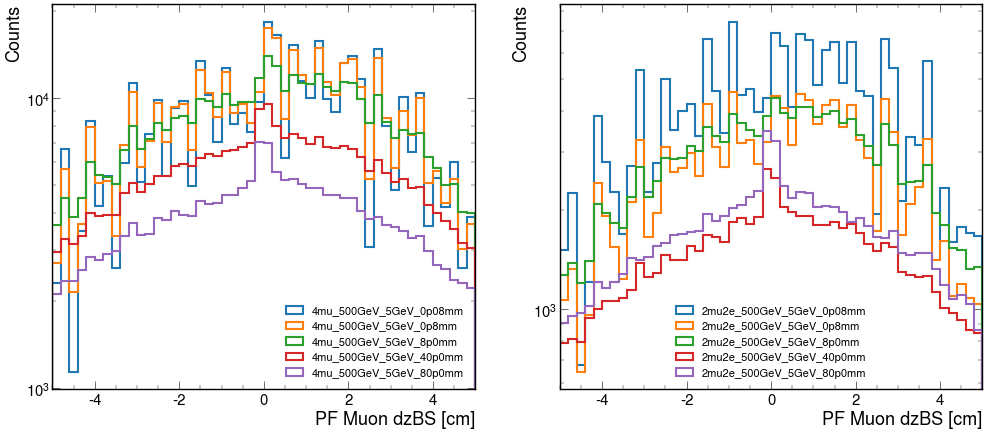

In [9]:
plt.style.use(hep.style.CMS)
fig, ax = plt.subplots(1, 2, figsize=(24,10))
for i_2mu, i_4mu in zip(samples_2mu2e,samples_4mu):
    structure("dzBS", events_4mu[i_4mu].dzBS, events_2mu2e[i_2mu].dzBS)
    ax[0].hist(ak.flatten(events_4mu[i_4mu].dzBS), range=(-5,5), alpha=1, bins=50, histtype='step', linewidth=3, label=i_4mu)
    ax[1].hist(ak.flatten(events_2mu2e[i_2mu].dzBS), range=(-5,5), alpha=1, bins=50, histtype='step', linewidth=3, label=i_2mu)
    
ax[0].set_xlim(-5,5)
ax[1].set_xlim(-5,5)
ax[0].set_xlabel('PF Muon dzBS [cm]')
ax[1].set_xlabel('PF Muon dzBS [cm]')
ax[0].set_ylabel('Counts')
ax[1].set_ylabel('Counts')
ax[0].legend(fontsize=16)
ax[1].legend(fontsize=16)
ax[0].set_yscale("log")
ax[1].set_yscale("log")
plt.savefig("../Plots/V2/PF_MUON/Displacement/dzBS_superlow.png", bbox_inches="tight")

## dz - dzBS

4mu dz - dzBS structure: [[-2.63, -2.63, -2.63, -2.63], [-0.65, ... -4.43], [-6.26, -3.77, -3.77, -3.77]]
2mu2e dz - dzBS structure: [[-2.63, -2.63], [-0.656, -0.656], [-3.18, ... [-1.94, -1.94], [0.623, 0.623]]
4mu dz - dzBS structure: [[-2.63, -2.63, -0.612, -2.63], [-0.658, ... -4.82], [8.52, 8.52, 8.52, 8.47]]
2mu2e dz - dzBS structure: [[-2.63, -2.63], [-0.722, -0.66], [-3.18, ... [0.386, 0.388, 0.387], [-6.77, -6.76]]
4mu dz - dzBS structure: [[-2.63, -2.63, -2.63, -2.63, -2.64], ... [-4.41, -4.42, 0.0319, -9.31, -4.42]]
2mu2e dz - dzBS structure: [[2.92, 2.92], [-0.631, -0.703], [3.39, ... 3.28], [-7.95, -7.99], [1.76, 1.57]]
4mu dz - dzBS structure: [[-2.63, -2.63, -2.63, -2.65], [0.704, ... -4.98, -4.98], [-5.12, -5.12, -5.12]]
2mu2e dz - dzBS structure: [[-2.2, -2.22], [-0.656, -0.657], [-1.97, ... [-6.38, -6.38], [-0.0432, 8.86]]
4mu dz - dzBS structure: [[2.22, 2.22, 2.22], [], [3.03, 3.03, ... [-5.69, -5.69, -5.69], [-6.64, -6.65]]
2mu2e dz - dzBS structure: [[-2.63, -3.09

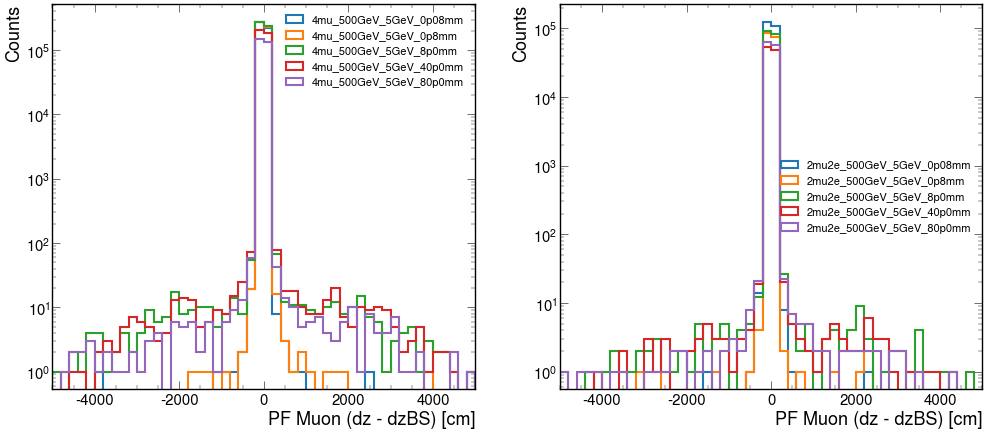

In [13]:
plt.style.use(hep.style.CMS)
fig, ax = plt.subplots(1, 2, figsize=(24,10))
for i_2mu, i_4mu in zip(samples_2mu2e,samples_4mu):
    structure("dz - dzBS", events_4mu[i_4mu].dz - events_4mu[i_4mu].dzBS, events_2mu2e[i_2mu].dz - events_2mu2e[i_2mu].dzBS)
    ax[0].hist(ak.flatten(events_4mu[i_4mu].dz - events_4mu[i_4mu].dzBS), range=(-5000,5000), alpha=1, bins=50, histtype='step', linewidth=3, label=i_4mu)
    ax[1].hist(ak.flatten(events_2mu2e[i_2mu].dz - events_2mu2e[i_2mu].dzBS), range=(-5000,5000), alpha=1, bins=50, histtype='step', linewidth=3, label=i_2mu)
    
ax[0].set_xlim(-5000,5000)
ax[1].set_xlim(-5000,5000)
ax[0].set_xlabel('PF Muon (dz - dzBS) [cm]')
ax[1].set_xlabel('PF Muon (dz - dzBS) [cm]')
ax[0].set_ylabel('Counts')
ax[1].set_ylabel('Counts')
ax[0].legend(fontsize=16)
ax[1].legend(fontsize=16)
ax[0].set_yscale("log")
ax[1].set_yscale("log")
plt.savefig("../Plots/V2/PF_MUON/Displacement/dz-dzBS.png", bbox_inches="tight")

4mu dz - dzBS structure: [[-2.63, -2.63, -2.63, -2.63], [-0.65, ... -4.43], [-6.26, -3.77, -3.77, -3.77]]
2mu2e dz - dzBS structure: [[-2.63, -2.63], [-0.656, -0.656], [-3.18, ... [-1.94, -1.94], [0.623, 0.623]]
4mu dz - dzBS structure: [[-2.63, -2.63, -0.612, -2.63], [-0.658, ... -4.82], [8.52, 8.52, 8.52, 8.47]]
2mu2e dz - dzBS structure: [[-2.63, -2.63], [-0.722, -0.66], [-3.18, ... [0.386, 0.388, 0.387], [-6.77, -6.76]]
4mu dz - dzBS structure: [[-2.63, -2.63, -2.63, -2.63, -2.64], ... [-4.41, -4.42, 0.0319, -9.31, -4.42]]
2mu2e dz - dzBS structure: [[2.92, 2.92], [-0.631, -0.703], [3.39, ... 3.28], [-7.95, -7.99], [1.76, 1.57]]
4mu dz - dzBS structure: [[-2.63, -2.63, -2.63, -2.65], [0.704, ... -4.98, -4.98], [-5.12, -5.12, -5.12]]
2mu2e dz - dzBS structure: [[-2.2, -2.22], [-0.656, -0.657], [-1.97, ... [-6.38, -6.38], [-0.0432, 8.86]]
4mu dz - dzBS structure: [[2.22, 2.22, 2.22], [], [3.03, 3.03, ... [-5.69, -5.69, -5.69], [-6.64, -6.65]]
2mu2e dz - dzBS structure: [[-2.63, -3.09

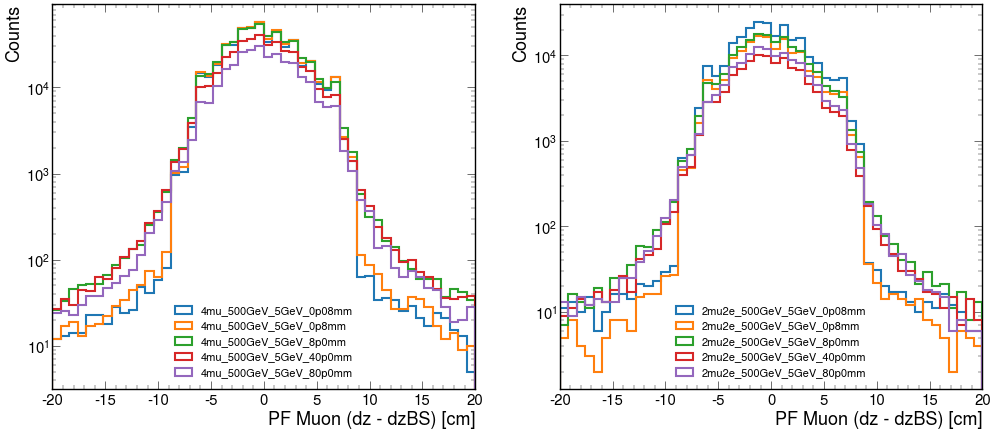

In [10]:
plt.style.use(hep.style.CMS)
fig, ax = plt.subplots(1, 2, figsize=(24,10))
for i_2mu, i_4mu in zip(samples_2mu2e,samples_4mu):
    structure("dz - dzBS", events_4mu[i_4mu].dz - events_4mu[i_4mu].dzBS, events_2mu2e[i_2mu].dz - events_2mu2e[i_2mu].dzBS)
    ax[0].hist(ak.flatten(events_4mu[i_4mu].dz - events_4mu[i_4mu].dzBS), range=(-20,20), alpha=1, bins=50, histtype='step', linewidth=3, label=i_4mu)
    ax[1].hist(ak.flatten(events_2mu2e[i_2mu].dz - events_2mu2e[i_2mu].dzBS), range=(-20,20), alpha=1, bins=50, histtype='step', linewidth=3, label=i_2mu)
    
ax[0].set_xlim(-20,20)
ax[1].set_xlim(-20,20)
ax[0].set_xlabel('PF Muon (dz - dzBS) [cm]')
ax[1].set_xlabel('PF Muon (dz - dzBS) [cm]')
ax[0].set_ylabel('Counts')
ax[1].set_ylabel('Counts')
ax[0].legend(fontsize=16)
ax[1].legend(fontsize=16)
ax[0].set_yscale("log")
ax[1].set_yscale("log")
plt.savefig("../Plots/V2/PF_MUON/Displacement/dz-dzBS_low.png", bbox_inches="tight")

4mu dz - dzBS structure: [[-2.63, -2.63, -2.63, -2.63], [-0.65, ... -4.43], [-6.26, -3.77, -3.77, -3.77]]
2mu2e dz - dzBS structure: [[-2.63, -2.63], [-0.656, -0.656], [-3.18, ... [-1.94, -1.94], [0.623, 0.623]]
4mu dz - dzBS structure: [[-2.63, -2.63, -0.612, -2.63], [-0.658, ... -4.82], [8.52, 8.52, 8.52, 8.47]]
2mu2e dz - dzBS structure: [[-2.63, -2.63], [-0.722, -0.66], [-3.18, ... [0.386, 0.388, 0.387], [-6.77, -6.76]]
4mu dz - dzBS structure: [[-2.63, -2.63, -2.63, -2.63, -2.64], ... [-4.41, -4.42, 0.0319, -9.31, -4.42]]
2mu2e dz - dzBS structure: [[2.92, 2.92], [-0.631, -0.703], [3.39, ... 3.28], [-7.95, -7.99], [1.76, 1.57]]
4mu dz - dzBS structure: [[-2.63, -2.63, -2.63, -2.65], [0.704, ... -4.98, -4.98], [-5.12, -5.12, -5.12]]
2mu2e dz - dzBS structure: [[-2.2, -2.22], [-0.656, -0.657], [-1.97, ... [-6.38, -6.38], [-0.0432, 8.86]]
4mu dz - dzBS structure: [[2.22, 2.22, 2.22], [], [3.03, 3.03, ... [-5.69, -5.69, -5.69], [-6.64, -6.65]]
2mu2e dz - dzBS structure: [[-2.63, -3.09

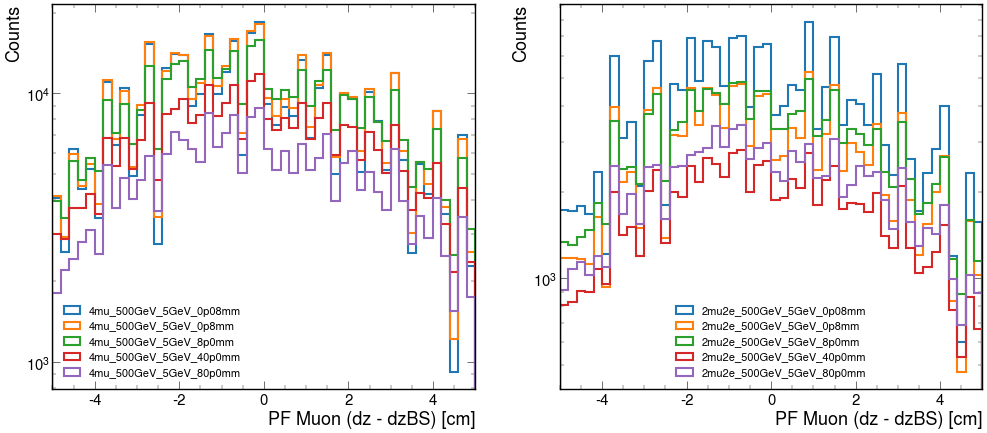

In [11]:
plt.style.use(hep.style.CMS)
fig, ax = plt.subplots(1, 2, figsize=(24,10))
for i_2mu, i_4mu in zip(samples_2mu2e,samples_4mu):
    structure("dz - dzBS", events_4mu[i_4mu].dz - events_4mu[i_4mu].dzBS, events_2mu2e[i_2mu].dz - events_2mu2e[i_2mu].dzBS)
    ax[0].hist(ak.flatten(events_4mu[i_4mu].dz - events_4mu[i_4mu].dzBS), range=(-5,5), alpha=1, bins=50, histtype='step', linewidth=3, label=i_4mu)
    ax[1].hist(ak.flatten(events_2mu2e[i_2mu].dz - events_2mu2e[i_2mu].dzBS), range=(-5,5), alpha=1, bins=50, histtype='step', linewidth=3, label=i_2mu)
    
ax[0].set_xlim(-5,5)
ax[1].set_xlim(-5,5)
ax[0].set_xlabel('PF Muon (dz - dzBS) [cm]')
ax[1].set_xlabel('PF Muon (dz - dzBS) [cm]')
ax[0].set_ylabel('Counts')
ax[1].set_ylabel('Counts')
ax[0].legend(fontsize=16)
ax[1].legend(fontsize=16)
ax[0].set_yscale("log")
ax[1].set_yscale("log")
plt.savefig("../Plots/V2/PF_MUON/Displacement/dz-dzBS_superlow.png", bbox_inches="tight")